In [124]:
print("Salvou")

Salvou


In [125]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from darts import TimeSeries
from darts.metrics import mae, mse, rmse

In [126]:
from src.metrics import compare_series_metrics

In [127]:
from src.custom_plots import (
    aggregate_median_metrics,
    plot_bar_for_medians_by_target,
    plot_boxplots_for_metrics_by_target,
    process_results_parquet,
)

## Estilo dos gráficos

In [128]:
plt.rcParams["figure.figsize"] = [12, 8]

In [129]:
sns.set_palette("Paired")

## Lendo os resultados salvos em parquet

In [130]:
folder_path = os.path.join(os.curdir, "data", "results")

Analisando apenas um resultado:

In [131]:
file_path = os.path.join(folder_path, "no_window", "Naive_driving_down_RSRQ.parquet")
# Read the Parquet file and add it to the DataFrame
test_df = pd.read_parquet(file_path)
test_df = test_df.reset_index(drop=True)

In [132]:
test_df

target      Activity  Model  Elapsed_time  \
0    RSRQ  driving_down  Naive      0.005975   
1    RSRQ  driving_down  Naive      0.005646   
2    RSRQ  driving_down  Naive      0.005488   
3    RSRQ  driving_down  Naive      0.005350   
4    RSRQ  driving_down  Naive      0.005300   
5    RSRQ  driving_down  Naive      0.005482   
6    RSRQ  driving_down  Naive      0.005620   
7    RSRQ  driving_down  Naive      0.005596   
8    RSRQ  driving_down  Naive      0.005828   
9    RSRQ  driving_down  Naive      0.005658   
10   RSRQ  driving_down  Naive      0.005725   
11   RSRQ  driving_down  Naive      0.005684   
12   RSRQ  driving_down  Naive      0.005613   

                                          Train_index  \
0   [2019-12-14T10:16:30.000000000, 2019-12-14T10:...   
1   [2020-02-14T09:38:22.000000000, 2020-02-14T09:...   
2   [2020-02-14T07:29:00.000000000, 2020-02-14T07:...   
3   [2020-01-16T07:26:43.000000000, 2020-01-16T07:...   
4   [2020-01-16T12:10:03.000000000, 2020-01-16T12:...   
5   [2020-01-16T09:56:56.000000000, 2020-01-16T09:...   
6   [2020-02-13T13:03:24.000000000, 2020-02-13T13:...   
7   [2020-02-13T15:02:01.000000000, 2020-02-13T15:...   
8   [2019-12-16T11:49:59.000000000, 2019-12-16T11:...   
9   [2019-12-17T07:32:39.000000000, 2019-12-17T07:...   
10  [2019-12-16T12:27:05.000000000, 2019-12-16T12:...   
11  [2019-12-16T07:22:43.000000000, 2019-12-16T07:...   
12  [2019-12-16T14:23:32.000000000, 2019-12-16T14:...   

                                         Train_values  \
0   [-15.0, -15.0, -13.999999999999998, -13.999999...   
1   [-12.0, -11.333333333333334, -10.6666666666666...   
2   [-8.0, -8.0, -8.0, -8.0, -13.0, -13.0, -8.0, -...   
3   [-11.0, -11.0, -11.0, -12.0, -12.0, -13.0, -13...   
4   [-18.0, -18.0, -18.0, -17.0, -17.0, -17.0, -17...   
5   [-10.0, -10.0, -9.0, -9.0, -9.0, -9.5, -10.0, ...   
6   [-13.0, -13.0, -10.0, -10.0, -11.0, -11.0, -11...   
7   [-15.0, -17.0, -17.0, -17.5, -18.0, -18.0, -18...   
8   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
9   [-11.0, -10.0, -11.0, -11.0, -13.0, -13.0, -12...   
10  [-11.000000000000002, -11.000000000000002, -11...   
11  [-10.0, -9.0, -9.5, -10.0, -10.0, -10.0, -10.0...   
12  [-19.0, -19.0, -17.0, -17.0, -17.0, -17.0, -20...   

                                        Actuals_index  \
0   [2019-12-14T10:35:43.000000000, 2019-12-14T10:...   
1   [2020-02-14T10:06:51.000000000, 2020-02-14T10:...   
2   [2020-02-14T08:06:41.000000000, 2020-02-14T08:...   
3   [2020-01-16T08:01:23.000000000, 2020-01-16T08:...   
4   [2020-01-16T12:16:20.000000000, 2020-01-16T12:...   
5   [2020-01-16T10:27:11.000000000, 2020-01-16T10:...   
6   [2020-02-13T13:47:42.000000000, 2020-02-13T13:...   
7   [2020-02-13T16:04:48.000000000, 2020-02-13T16:...   
8   [2019-12-16T11:56:23.000000000, 2019-12-16T11:...   
9   [2019-12-17T08:16:14.000000000, 2019-12-17T08:...   
10  [2019-12-16T12:49:27.000000000, 2019-12-16T12:...   
11  [2019-12-16T08:05:50.000000000, 2019-12-16T08:...   
12  [2019-12-16T15:12:32.000000000, 2019-12-16T15:...   

                                       Actuals_values  \
0   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
1   [-9.0, -9.0, -9.0, -11.0, -11.0, -10.0, -10.0,...   
2   [-12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12...   
3   [-14.0, -13.0, -13.5, -14.0, -14.0, -13.0, -13...   
4   [-14.0, -14.0, -14.0, -14.0, -12.0, -12.0, -12...   
5   [-11.0, -11.0, -10.0, -10.0, -8.0, -8.0, -14.0...   
6   [-14.0, -14.0, -14.0, -14.0, -14.0, -14.0, -14...   
7   [-14.0, -14.0, -14.0, -12.0, -12.0, -12.0, -12...   
8   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
9   [-8.0, -10.0, -10.0, -7.0, -7.0, -7.0, -7.0, -...   
10  [-16.0, -16.0, -15.0, -15.0, -17.0, -17.0, -17...   
11  [-13.0, -13.0, -17.0, -17.0, -17.0, -17.0, -17...   
12  [-10.5, -12.0, -12.0, -11.0, -11.0, -10.0, -10...   

                                          Preds_index  \
0   [2019-12-14T10:35:43.000000000, 2019-12-14T10:...   
1   [2020-02-14T10:0

In [109]:
test_df["Actuals_index"][0]

array(['2020-02-14T13:22:16.000000000', '2020-02-14T13:22:17.000000000',
       '2020-02-14T13:22:18.000000000', '2020-02-14T13:22:19.000000000',
       '2020-02-14T13:22:20.000000000', '2020-02-14T13:22:21.000000000',
       '2020-02-14T13:22:22.000000000', '2020-02-14T13:22:23.000000000',
       '2020-02-14T13:22:24.000000000', '2020-02-14T13:22:25.000000000'],
      dtype='datetime64[ns]')

In [110]:
# Supondo que test_df["Actuals_index"][0] seja o array de datas e test_df["Actuals_values"][0] os valores:

sample_idx = 10000

dates_0 = pd.DatetimeIndex(test_df["Train_index"][sample_idx])
values_0 = test_df["Train_values"][sample_idx]
train_ts = TimeSeries.from_times_and_values(dates_0, values_0)


dates_1 = pd.DatetimeIndex(test_df["Actuals_index"][sample_idx])
values_1 = test_df["Actuals_values"][sample_idx]
actual_ts = TimeSeries.from_times_and_values(dates_1, values_1)


dates_2 = pd.DatetimeIndex(test_df["Preds_index"][sample_idx])
values_2 = test_df["Preds_values"][sample_idx]
preds_ts = TimeSeries.from_times_and_values(dates_2, values_2)

<Axes: xlabel='time'>

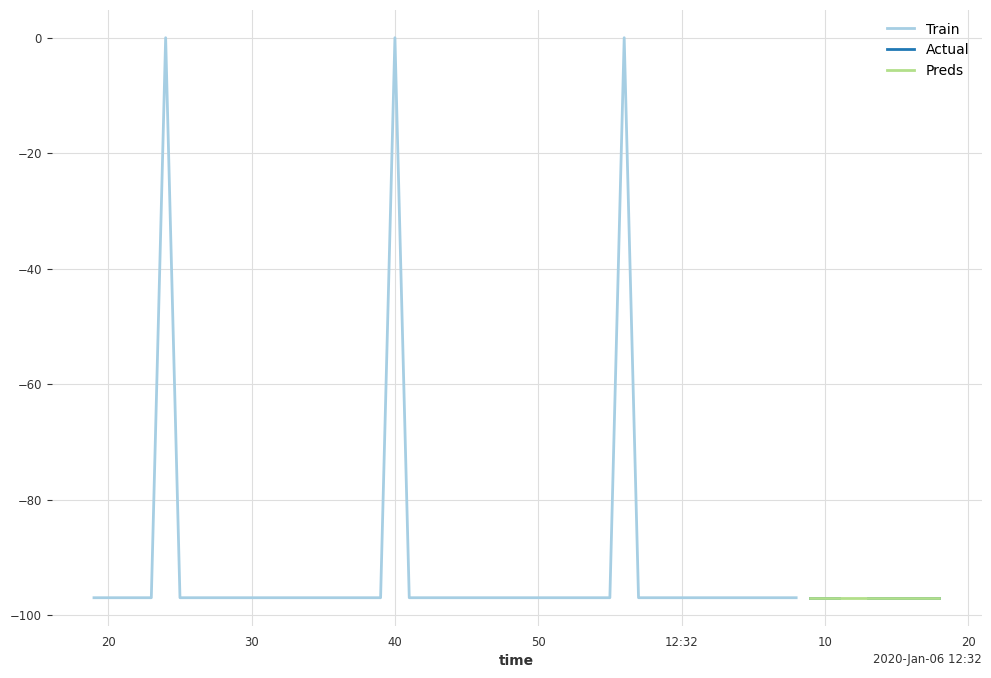

In [111]:
train_ts.plot(label="Train")
actual_ts.plot(label="Actual")
preds_ts.plot(label="Preds")

Calculando todas as métricas do estudo para um resultado salvo:

In [133]:
compare_series_metrics(test_df)

target      Activity  Model  Elapsed_time  \
0    RSRQ  driving_down  Naive      0.005975   
1    RSRQ  driving_down  Naive      0.005646   
2    RSRQ  driving_down  Naive      0.005488   
3    RSRQ  driving_down  Naive      0.005350   
4    RSRQ  driving_down  Naive      0.005300   
5    RSRQ  driving_down  Naive      0.005482   
6    RSRQ  driving_down  Naive      0.005620   
7    RSRQ  driving_down  Naive      0.005596   
8    RSRQ  driving_down  Naive      0.005828   
9    RSRQ  driving_down  Naive      0.005658   
10   RSRQ  driving_down  Naive      0.005725   
11   RSRQ  driving_down  Naive      0.005684   
12   RSRQ  driving_down  Naive      0.005613   

                                          Train_index  \
0   [2019-12-14T10:16:30.000000000, 2019-12-14T10:...   
1   [2020-02-14T09:38:22.000000000, 2020-02-14T09:...   
2   [2020-02-14T07:29:00.000000000, 2020-02-14T07:...   
3   [2020-01-16T07:26:43.000000000, 2020-01-16T07:...   
4   [2020-01-16T12:10:03.000000000, 2020-01-16T12:...   
5   [2020-01-16T09:56:56.000000000, 2020-01-16T09:...   
6   [2020-02-13T13:03:24.000000000, 2020-02-13T13:...   
7   [2020-02-13T15:02:01.000000000, 2020-02-13T15:...   
8   [2019-12-16T11:49:59.000000000, 2019-12-16T11:...   
9   [2019-12-17T07:32:39.000000000, 2019-12-17T07:...   
10  [2019-12-16T12:27:05.000000000, 2019-12-16T12:...   
11  [2019-12-16T07:22:43.000000000, 2019-12-16T07:...   
12  [2019-12-16T14:23:32.000000000, 2019-12-16T14:...   

                                         Train_values  \
0   [-15.0, -15.0, -13.999999999999998, -13.999999...   
1   [-12.0, -11.333333333333334, -10.6666666666666...   
2   [-8.0, -8.0, -8.0, -8.0, -13.0, -13.0, -8.0, -...   
3   [-11.0, -11.0, -11.0, -12.0, -12.0, -13.0, -13...   
4   [-18.0, -18.0, -18.0, -17.0, -17.0, -17.0, -17...   
5   [-10.0, -10.0, -9.0, -9.0, -9.0, -9.5, -10.0, ...   
6   [-13.0, -13.0, -10.0, -10.0, -11.0, -11.0, -11...   
7   [-15.0, -17.0, -17.0, -17.5, -18.0, -18.0, -18...   
8   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
9   [-11.0, -10.0, -11.0, -11.0, -13.0, -13.0, -12...   
10  [-11.000000000000002, -11.000000000000002, -11...   
11  [-10.0, -9.0, -9.5, -10.0, -10.0, -10.0, -10.0...   
12  [-19.0, -19.0, -17.0, -17.0, -17.0, -17.0, -20...   

                                        Actuals_index  \
0   [2019-12-14T10:35:43.000000000, 2019-12-14T10:...   
1   [2020-02-14T10:06:51.000000000, 2020-02-14T10:...   
2   [2020-02-14T08:06:41.000000000, 2020-02-14T08:...   
3   [2020-01-16T08:01:23.000000000, 2020-01-16T08:...   
4   [2020-01-16T12:16:20.000000000, 2020-01-16T12:...   
5   [2020-01-16T10:27:11.000000000, 2020-01-16T10:...   
6   [2020-02-13T13:47:42.000000000, 2020-02-13T13:...   
7   [2020-02-13T16:04:48.000000000, 2020-02-13T16:...   
8   [2019-12-16T11:56:23.000000000, 2019-12-16T11:...   
9   [2019-12-17T08:16:14.000000000, 2019-12-17T08:...   
10  [2019-12-16T12:49:27.000000000, 2019-12-16T12:...   
11  [2019-12-16T08:05:50.000000000, 2019-12-16T08:...   
12  [2019-12-16T15:12:32.000000000, 2019-12-16T15:...   

                                       Actuals_values  \
0   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
1   [-9.0, -9.0, -9.0, -11.0, -11.0, -10.0, -10.0,...   
2   [-12.0, -12.0, -12.0, -12.0, -12.0, -12.0, -12...   
3   [-14.0, -13.0, -13.5, -14.0, -14.0, -13.0, -13...   
4   [-14.0, -14.0, -14.0, -14.0, -12.0, -12.0, -12...   
5   [-11.0, -11.0, -10.0, -10.0, -8.0, -8.0, -14.0...   
6   [-14.0, -14.0, -14.0, -14.0, -14.0, -14.0, -14...   
7   [-14.0, -14.0, -14.0, -12.0, -12.0, -12.0, -12...   
8   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
9   [-8.0, -10.0, -10.0, -7.0, -7.0, -7.0, -7.0, -...   
10  [-16.0, -16.0, -15.0, -15.0, -17.0, -17.0, -17...   
11  [-13.0, -13.0, -17.0, -17.0, -17.0, -17.0, -17...   
12  [-10.5, -12.0, -12.0, -11.0, -11.0, -10.0, -10...   

                                          Preds_index  \
0   [2019-12-14T10:35:43.000000000, 2019-12-14T10:...   
1   [2020-02-14T10:0

Lendo todos os resultados baselines:

In [134]:
dfs = []
folder = os.path.join(folder_path, "no_window")
for file in os.listdir(folder):
    if file.endswith(".parquet"):
        # Create the full path of the file
        file_path = os.path.join(folder, file)
        # Read the Parquet file and add it to the DataFrame
        mult_df = pd.read_parquet(file_path)
        dfs.append(mult_df)

all_baselines_results = pd.concat(dfs)

# Liberar memoria
del dfs

In [135]:
all_baselines_results

target     Activity       Model  Elapsed_time  \
0    RSRQ  static_strm  NaiveDrift      0.006390   
0    RSRQ  static_strm  NaiveDrift      0.005418   
0    RSRQ  static_strm  NaiveDrift      0.005567   
0    RSRQ  static_strm  NaiveDrift      0.005416   
0    RSRQ  static_strm  NaiveDrift      0.005358   
..    ...          ...         ...           ...   
0    RSRQ  static_down       Naive      0.005886   
0    RSRQ  static_down       Naive      0.005562   
0    RSRQ  static_down       Naive      0.005387   
0    RSRQ  static_down       Naive      0.005406   
0    RSRQ  static_down       Naive      0.005343   

                                          Train_index  \
0   [2020-01-03T08:59:40.000000000, 2020-01-03T08:...   
0   [2019-11-23T14:30:10.000000000, 2019-11-23T14:...   
0   [2019-12-03T08:02:06.000000000, 2019-12-03T08:...   
0   [2019-12-04T12:46:14.000000000, 2019-12-04T12:...   
0   [2020-01-06T11:08:12.000000000, 2020-01-06T11:...   
..                                                ...   
0   [2020-01-16T10:43:34.000000000, 2020-01-16T10:...   
0   [2020-02-27T18:39:27.000000000, 2020-02-27T18:...   
0   [2019-12-16T13:40:04.000000000, 2019-12-16T13:...   
0   [2020-02-13T13:57:29.000000000, 2020-02-13T13:...   
0   [2020-02-14T13:21:26.000000000, 2020-02-14T13:...   

                                         Train_values  \
0   [-9.0, -9.0, -10.0, -10.0, -9.0, -9.0, -9.0, -...   
0   [-12.0, -13.000000000000002, -13.0000000000000...   
0   [-9.0, -9.5, -10.000000000000002, -10.00000000...   
0   [-13.0, -13.0, -12.0, -12.0, -11.0, -11.0, -11...   
0   [-13.999999999999998, -13.999999999999998, -10...   
..                                                ...   
0   [-10.0, -10.0, -10.0, -9.0, -9.0, -9.0, -9.0, ...   
0   [-10.0, -10.0, -10.0, -10.0, -11.0, -12.0, -12...   
0   [-15.0, -16.0, -16.0, -14.0, -14.0, -14.0, -14...   
0   [-15.0, -12.000000000000002, -11.0, -11.0, -11...   
0   [-15.0, -15.0, -15.0, -16.0, -16.0, -16.0, -16...   

                                        Actuals_index  \
0   [2020-01-03T10:51:08.000000000, 2020-01-03T10:...   
0   [2019-11-23T14:48:53.000000000, 2019-11-23T14:...   
0   [2019-12-03T10:11:09.000000000, 2019-12-03T10:...   
0   [2019-12-04T13:46:04.000000000, 2019-12-04T13:...   
0   [2020-01-06T11:36:51.000000000, 2020-01-06T11:...   
..                                                ...   
0   [2020-01-16T11:44:44.000000000, 2020-01-16T11:...   
0   [2020-02-27T20:30:11.000000000, 2020-02-27T20:...   
0   [2019-12-16T14:17:56.000000000, 2019-12-16T14:...   
0   [2020-02-13T14:55:37.000000000, 2020-02-13T14:...   
0   [2020-02-14T13:39:39.000000000, 2020-02-14T13:...   

                                       Actuals_values  \
0   [-12.0, -12.0, -12.0, -12.0, -13.0, -13.0, -11...   
0   [-13.0, -13.0, -12.0, -12.0, -12.0, -12.0, -16...   
0   [-11.0, -11.0, -11.0, -12.0, -12.0, -10.0, -10...   
0   [-13.0, -17.0, -17.0, -11.0, -11.0, -12.0, -12...   
0   [-10.0, -10.0, -11.0, -11.0, -10.0, -9.0, -9.0...   
..                                                ...   
0   [-13.0, -10.0, -10.0, -10.5, -11.0, -10.0, -9....   
0   [-17.0, -15.0, -15.0, -15.0, -15.0, -17.0, -17...   
0   [-13.0, -12.0, -12.0, -11.0, -11.0, -13.0, -13...   
0   [-15.0, -15.0, -12.0, -12.0, -12.5, -13.0, -13...   
0   [-16.0, -16.0, -17.0, -17.0, -18.0, -18.0, -18...   

                                          Preds_index  \
0   [2020-01-03T10:51:08.000000000, 2020-01-03T10:...   
0   [2019-11-23T14:48:53.000000000, 2019-11-23T14:...   
0   [2019-12-03T10:11:09.000000000, 2019-12-03T10:...   
0   [2019-12-04T13:46:04.000000000, 2019-12-04T13:...   
0   [2020-01-06T11:36:51.000000000, 2020-01-06T11:...   
..                                                ...   
0   [2020-01-16T11:44:44.000000000, 2020-01-16T11:...   
0   [2020-02-27T20:30:11.000000000, 2020-02-27T20:...   
0   [2019-12-16T14:17:56.000000000, 2019-12-16T14:...   
0   [2020-02-13T14:55:37.000000000, 2020-02-13T14:...   
0   [2020-0

### Processando métricas

In [115]:
# df = process_results_parquet(folder_path)

In [136]:
df_metrics = compare_series_metrics(all_baselines_results)

In [137]:
df_metrics

target     Activity       Model  Elapsed_time  \
0     RSRQ  static_strm  NaiveDrift      0.006390   
1     RSRQ  static_strm  NaiveDrift      0.005418   
2     RSRQ  static_strm  NaiveDrift      0.005567   
3     RSRQ  static_strm  NaiveDrift      0.005416   
4     RSRQ  static_strm  NaiveDrift      0.005358   
..     ...          ...         ...           ...   
315   RSRQ  static_down       Naive      0.005886   
316   RSRQ  static_down       Naive      0.005562   
317   RSRQ  static_down       Naive      0.005387   
318   RSRQ  static_down       Naive      0.005406   
319   RSRQ  static_down       Naive      0.005343   

                                           Train_index  \
0    [2020-01-03T08:59:40.000000000, 2020-01-03T08:...   
1    [2019-11-23T14:30:10.000000000, 2019-11-23T14:...   
2    [2019-12-03T08:02:06.000000000, 2019-12-03T08:...   
3    [2019-12-04T12:46:14.000000000, 2019-12-04T12:...   
4    [2020-01-06T11:08:12.000000000, 2020-01-06T11:...   
..                                                 ...   
315  [2020-01-16T10:43:34.000000000, 2020-01-16T10:...   
316  [2020-02-27T18:39:27.000000000, 2020-02-27T18:...   
317  [2019-12-16T13:40:04.000000000, 2019-12-16T13:...   
318  [2020-02-13T13:57:29.000000000, 2020-02-13T13:...   
319  [2020-02-14T13:21:26.000000000, 2020-02-14T13:...   

                                          Train_values  \
0    [-9.0, -9.0, -10.0, -10.0, -9.0, -9.0, -9.0, -...   
1    [-12.0, -13.000000000000002, -13.0000000000000...   
2    [-9.0, -9.5, -10.000000000000002, -10.00000000...   
3    [-13.0, -13.0, -12.0, -12.0, -11.0, -11.0, -11...   
4    [-13.999999999999998, -13.999999999999998, -10...   
..                                                 ...   
315  [-10.0, -10.0, -10.0, -9.0, -9.0, -9.0, -9.0, ...   
316  [-10.0, -10.0, -10.0, -10.0, -11.0, -12.0, -12...   
317  [-15.0, -16.0, -16.0, -14.0, -14.0, -14.0, -14...   
318  [-15.0, -12.000000000000002, -11.0, -11.0, -11...   
319  [-15.0, -15.0, -15.0, -16.0, -16.0, -16.0, -16...   

                                         Actuals_index  \
0    [2020-01-03T10:51:08.000000000, 2020-01-03T10:...   
1    [2019-11-23T14:48:53.000000000, 2019-11-23T14:...   
2    [2019-12-03T10:11:09.000000000, 2019-12-03T10:...   
3    [2019-12-04T13:46:04.000000000, 2019-12-04T13:...   
4    [2020-01-06T11:36:51.000000000, 2020-01-06T11:...   
..                                                 ...   
315  [2020-01-16T11:44:44.000000000, 2020-01-16T11:...   
316  [2020-02-27T20:30:11.000000000, 2020-02-27T20:...   
317  [2019-12-16T14:17:56.000000000, 2019-12-16T14:...   
318  [2020-02-13T14:55:37.000000000, 2020-02-13T14:...   
319  [2020-02-14T13:39:39.000000000, 2020-02-14T13:...   

                                        Actuals_values  \
0    [-12.0, -12.0, -12.0, -12.0, -13.0, -13.0, -11...   
1    [-13.0, -13.0, -12.0, -12.0, -12.0, -12.0, -16...   
2    [-11.0, -11.0, -11.0, -12.0, -12.0, -10.0, -10...   
3    [-13.0, -17.0, -17.0, -11.0, -11.0, -12.0, -12...   
4    [-10.0, -10.0, -11.0, -11.0, -10.0, -9.0, -9.0...   
..                                                 ...   
315  [-13.0, -10.0, -10.0, -10.5, -11.0, -10.0, -9....   
316  [-17.0, -15.0, -15.0, -15.0, -15.0, -17.0, -17...   
317  [-13.0, -12.0, -12.0, -11.0, -11.0, -13.0, -13...   
318  [-15.0, -15.0, -12.0, -12.0, -12.5, -13.0, -13...   
319  [-16.0, -16.0, -17.0, -17.0, -18.0, -18.0, -18...   

                                           Preds_index  \
0    [2020-01-03T10:51:08.000000000, 2020-01-03T10:...   
1    [2019-11-23T14:48:53.000000000, 2019-11-23T14:...   
2    [2019-12-03T10:11:09.000000000, 2019-12-03T10:...   
3    [2019-12-04T13:46:04.000000000, 2019-12-04T13:...   
4    [2020-01-06T11:36:51.000000000, 2020-01-06T11:...   
..                                                 ...   
315  [2020-01-16T11:44:44.000000000, 2020-01-16T11:...   
316  [2020-02-27T20:30:11.000000000, 2020-02-27T20:...   
317  [2019-12-16T14:17:56.000000000, 2019-12-16T14:...   

In [118]:
# TODO: Verificar por que não está salvando dentro da pasta .;data
try:
    metrics_path = os.path.join(os.curdir, "data", "last_metrics_univariate.parquet")

    # Cria o diretório se não existir
    os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
    # Concatena todos os DataFrames e realiza o processamento
    df_metrics.to_parquet(metrics_path, compression="gzip")
except Exception as e:
    print(f"Não foi possivel salvar: {e}")

Não foi possivel salvar: [Errno 13] Permission denied: './data/last_metrics_univariate.parquet'


In [119]:
df_metrics.columns

Index(['target', 'Activity', 'Model', 'Train_index', 'Train_values',
       'Actuals_index', 'Actuals_values', 'Preds_index', 'Preds_values', 'MAE',
       'RMSE', 'MSE', 'NRMSE', 'NMSE'],
      dtype='object')

In [120]:
df_metrics[["Model", "target", "Activity", "MAE", "RMSE", "MSE"]]

Model target      Activity        MAE       RMSE  \
0       LinearRegression   RSRP   static_down  16.974976  16.977818   
1       LinearRegression   RSRQ   static_down   2.541674   2.667943   
2       LinearRegression    SNR   static_down   2.463562   2.711070   
3       LinearRegression    CQI   static_down   1.831796   2.128959   
4       LinearRegression   RSSI   static_down  18.794851  18.807987   
...                  ...    ...           ...        ...        ...   
163739        NaiveDrift   RSRP  driving_strm   3.395918   4.537694   
163740        NaiveDrift   RSRQ  driving_strm   1.700000   1.908016   
163741        NaiveDrift    SNR  driving_strm   6.630612   7.675925   
163742        NaiveDrift    CQI  driving_strm   1.753061   2.222270   
163743        NaiveDrift   RSSI  driving_strm   2.014286   2.277984   

               MSE  
0       288.246289  
1         7.117917  
2         7.349901  
3         4.532468  
4       353.740383  
...            ...  
163739   20.590671  
163740    3.640525  
163741   58.919825  
163742    4.938484  
163743    5.189213  

[163744 rows x 6 columns]

In [121]:
agg_data = aggregate_median_metrics(df_metrics)
agg_data

Model target      Activity  MAE_Median  RMSE_Median  \
0    ExponentialSmoothing    CQI  driving_down    2.301977     2.734294   
1    ExponentialSmoothing    CQI  driving_strm    2.155101     2.467506   
2    ExponentialSmoothing    CQI   static_down    2.065312     2.445748   
3    ExponentialSmoothing    CQI   static_strm    1.465225     1.587679   
4    ExponentialSmoothing   RSRP  driving_down   11.161831    11.584743   
..                    ...    ...           ...         ...          ...   
165                 Theta   RSSI  driving_strm   20.728189    20.793175   
166                 Theta   RSSI   static_strm   22.586348    22.604936   
167                 Theta    SNR  driving_down    5.579478     6.070993   
168                 Theta    SNR  driving_strm    4.782627     5.537765   
169                 Theta    SNR   static_strm    2.023287     2.367125   

     MSE_Median  NRMSE_Median  NMSE_Median  
0      7.476365      0.521898     2.242261  
1      6.088585      0.578302     2.641686  
2      5.982561      0.580090     2.148963  
3      2.520724      0.623362     2.796509  
4    134.208001      1.767158    23.995184  
..          ...           ...          ...  
165  434.572956      6.368585   284.848556  
166  510.983285     11.295872   607.603458  
167   37.069371      0.687558     3.595315  
168   30.676801      0.532156     2.347001  
169    5.603281      0.453382     1.263441  

[170 rows x 8 columns]

## Bar plots das médias.

Paleta de cores:

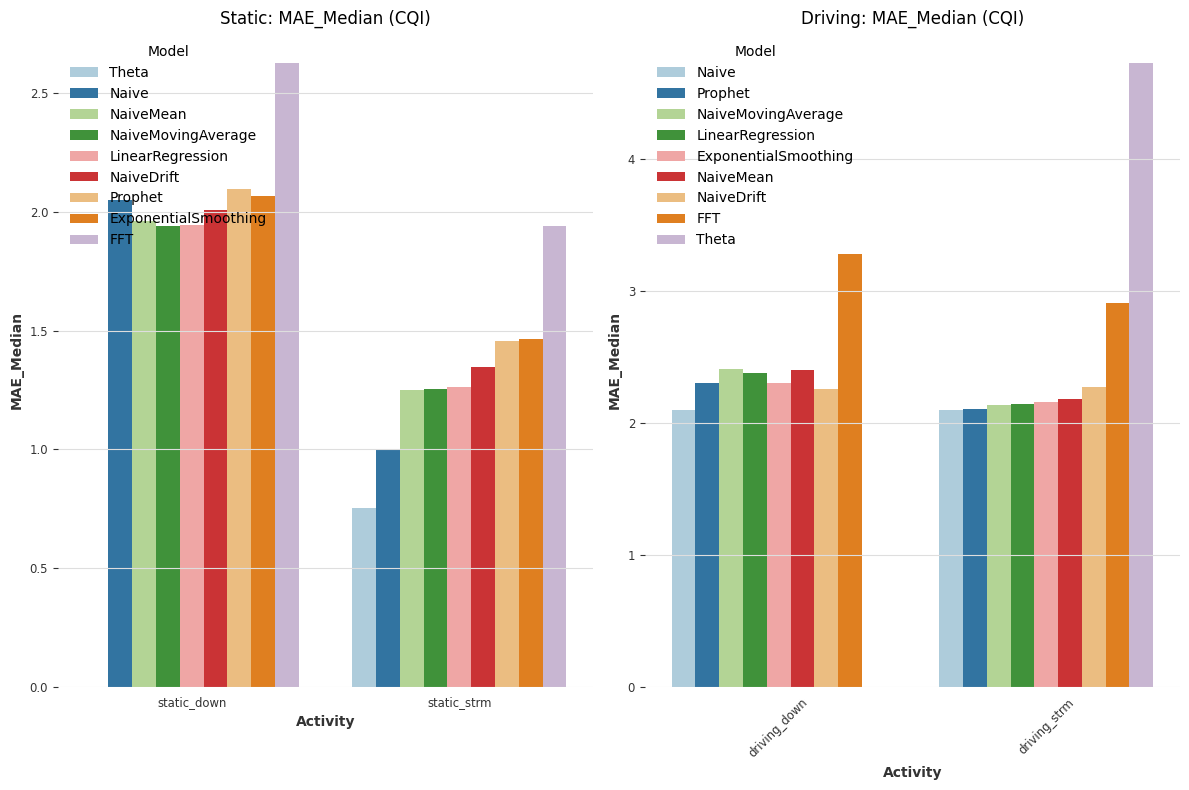

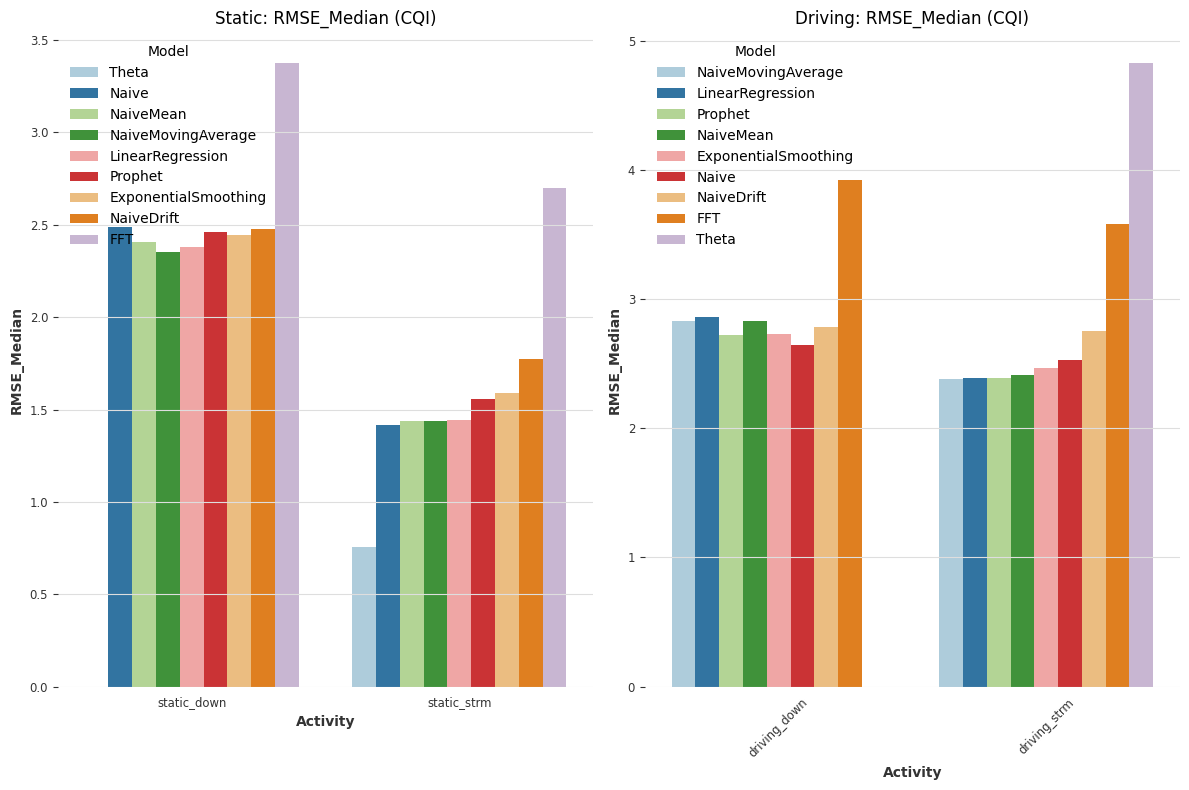

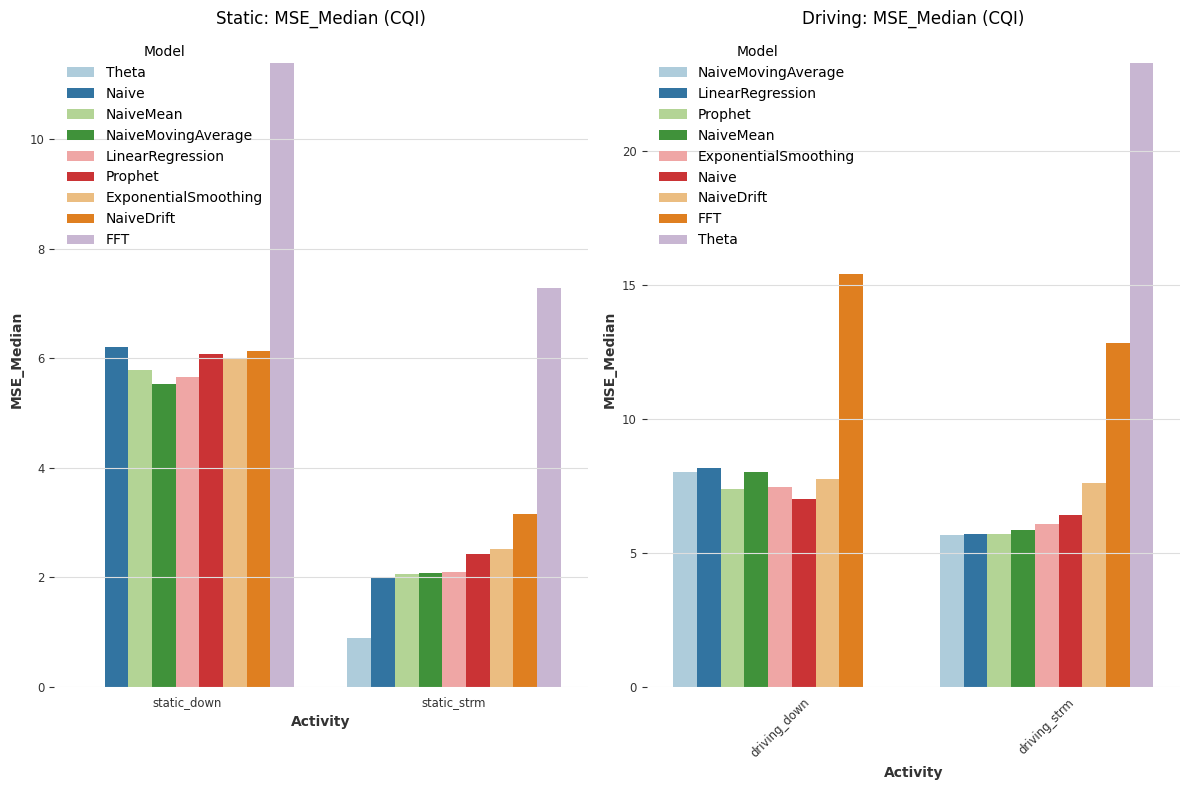

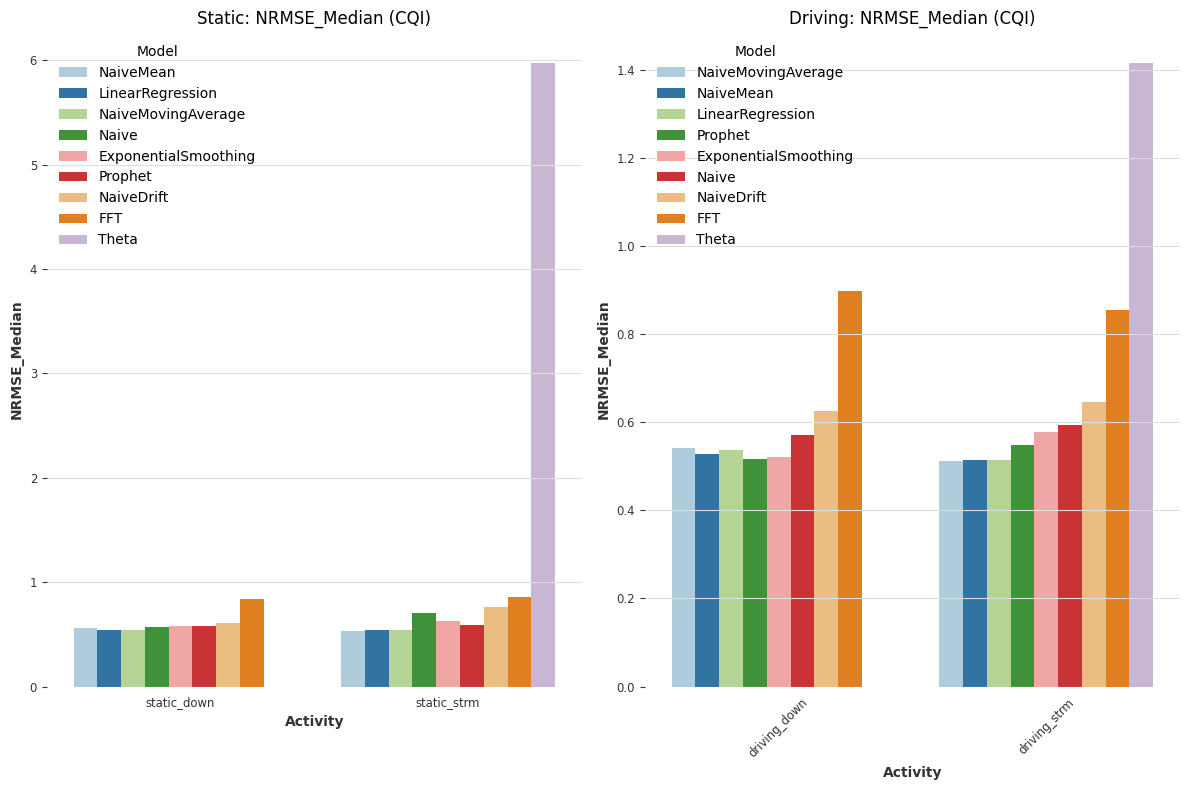

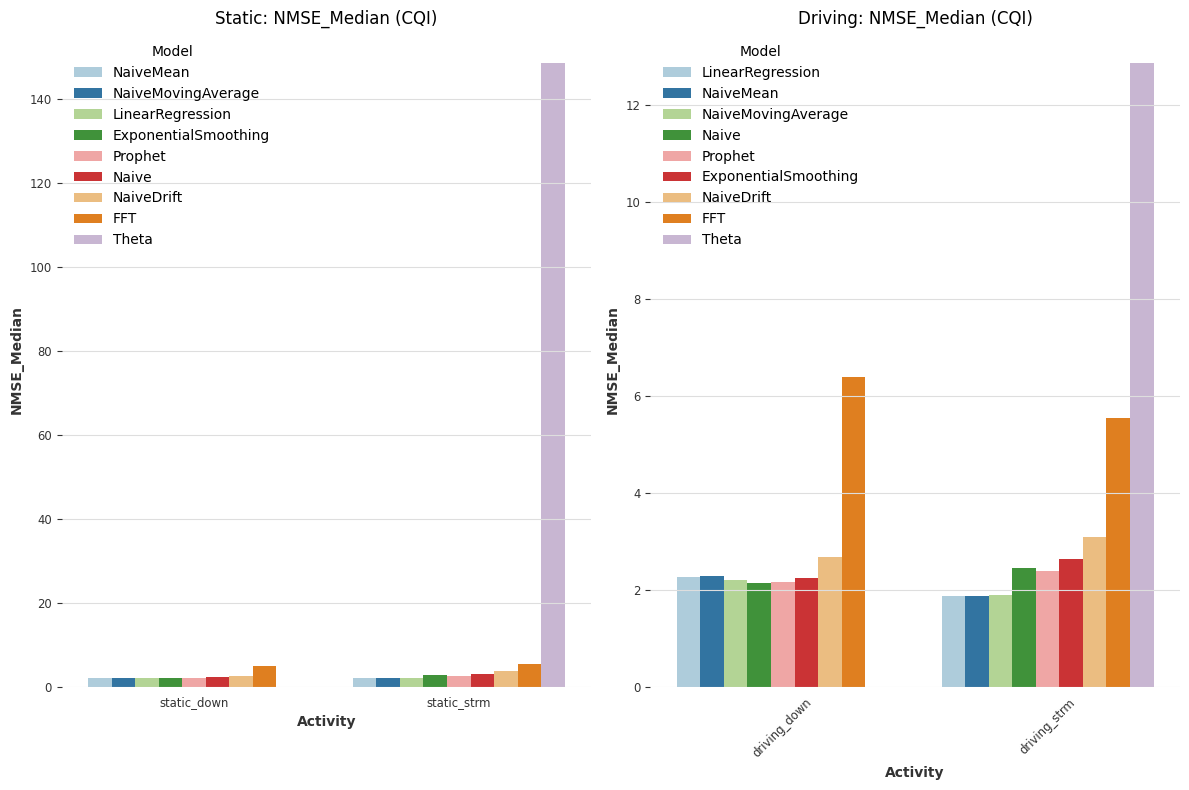

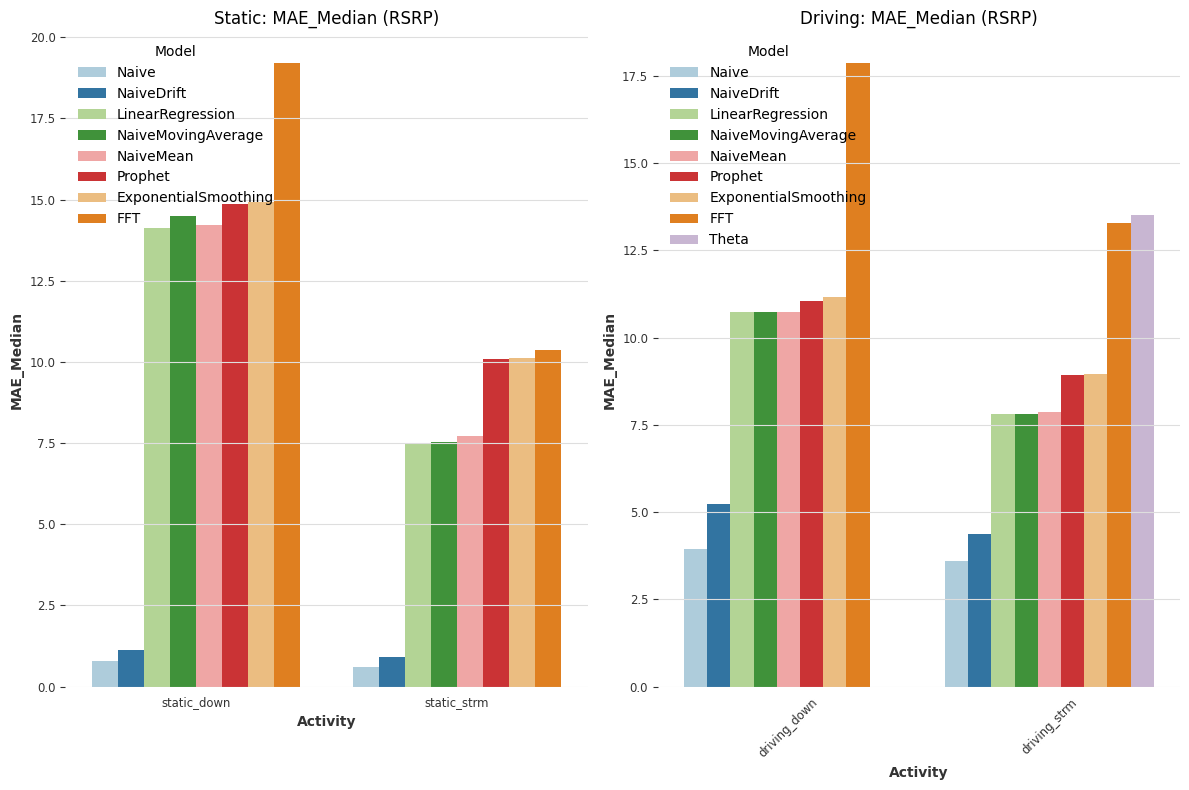

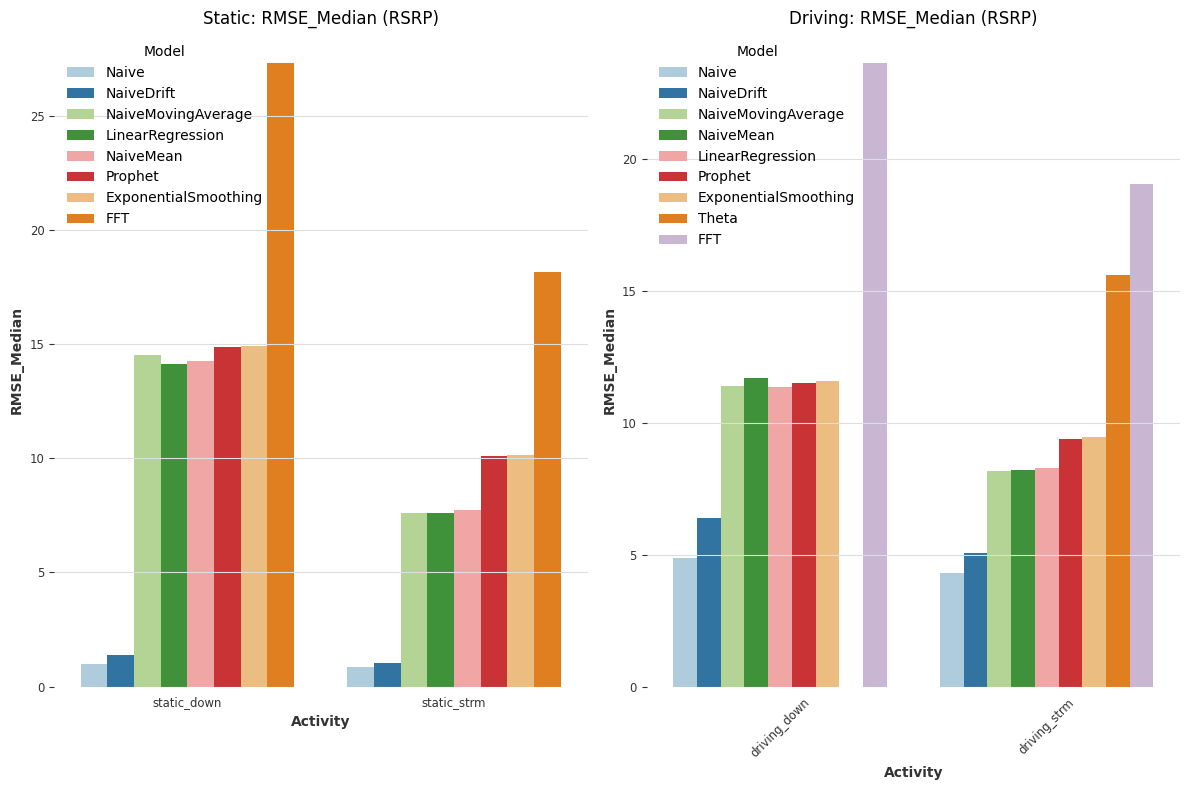

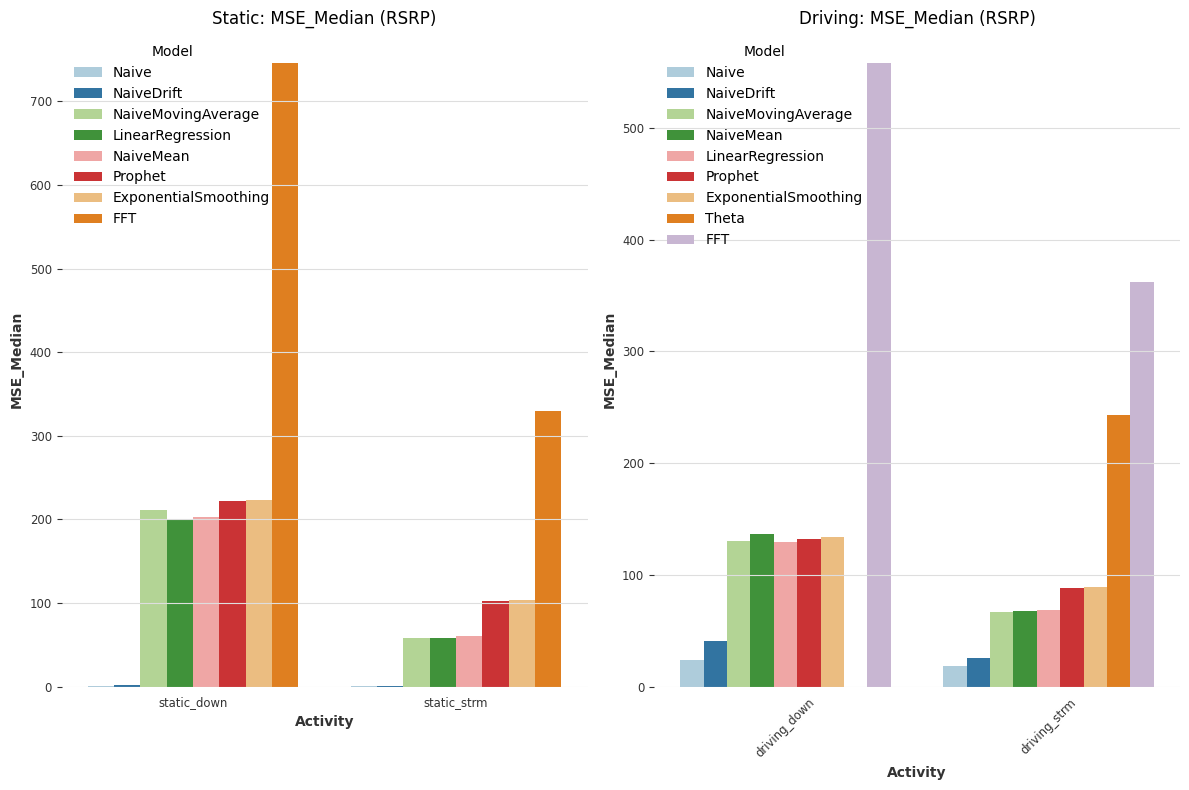

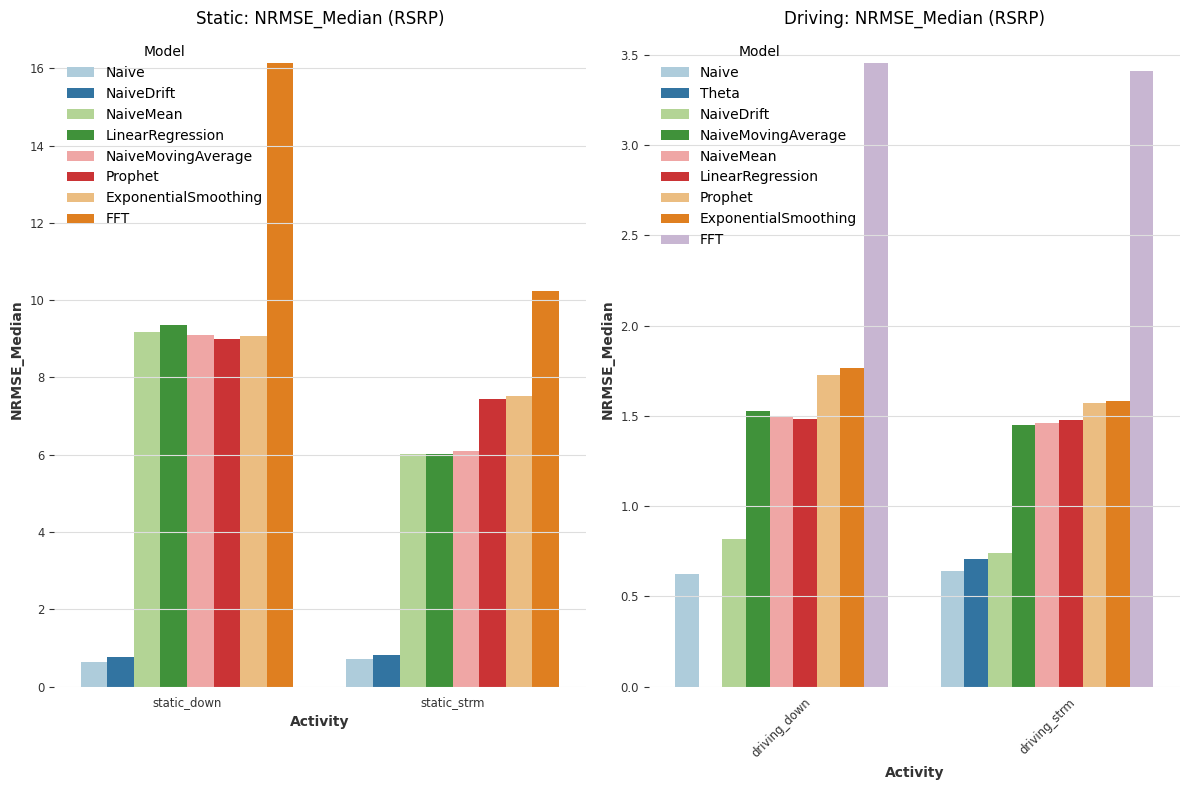

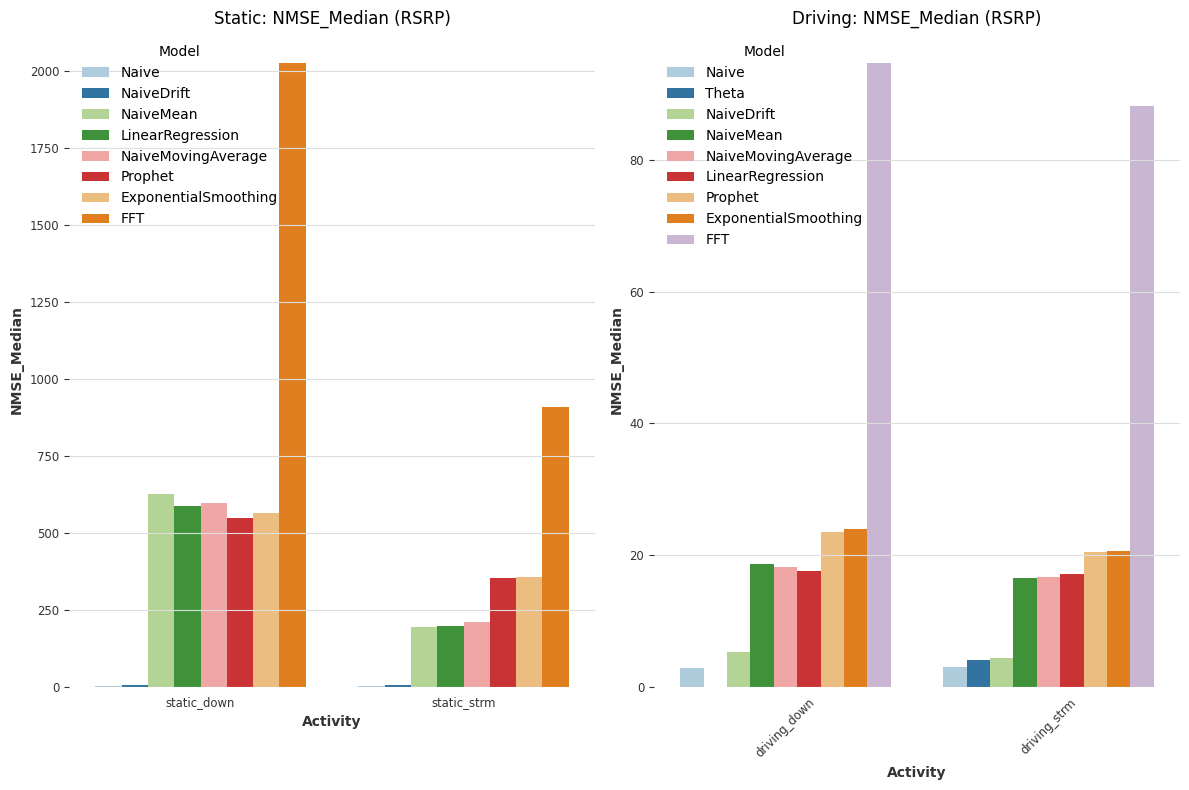

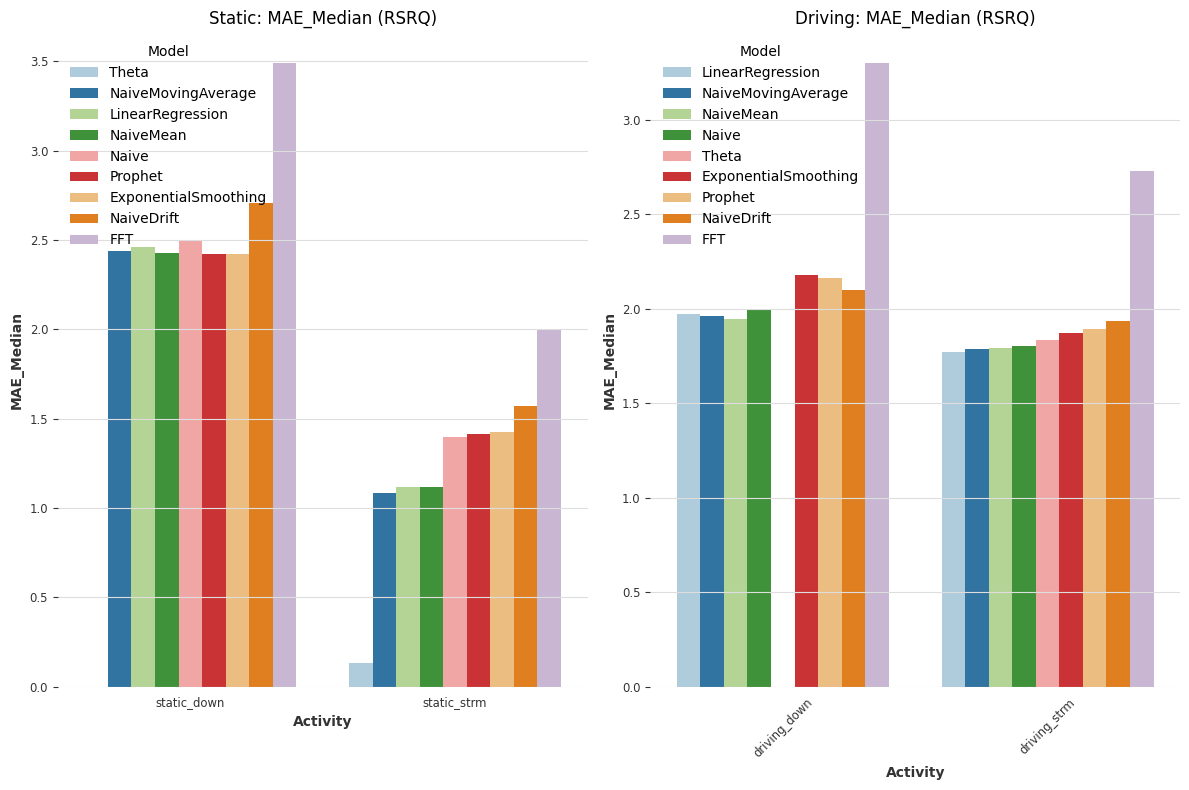

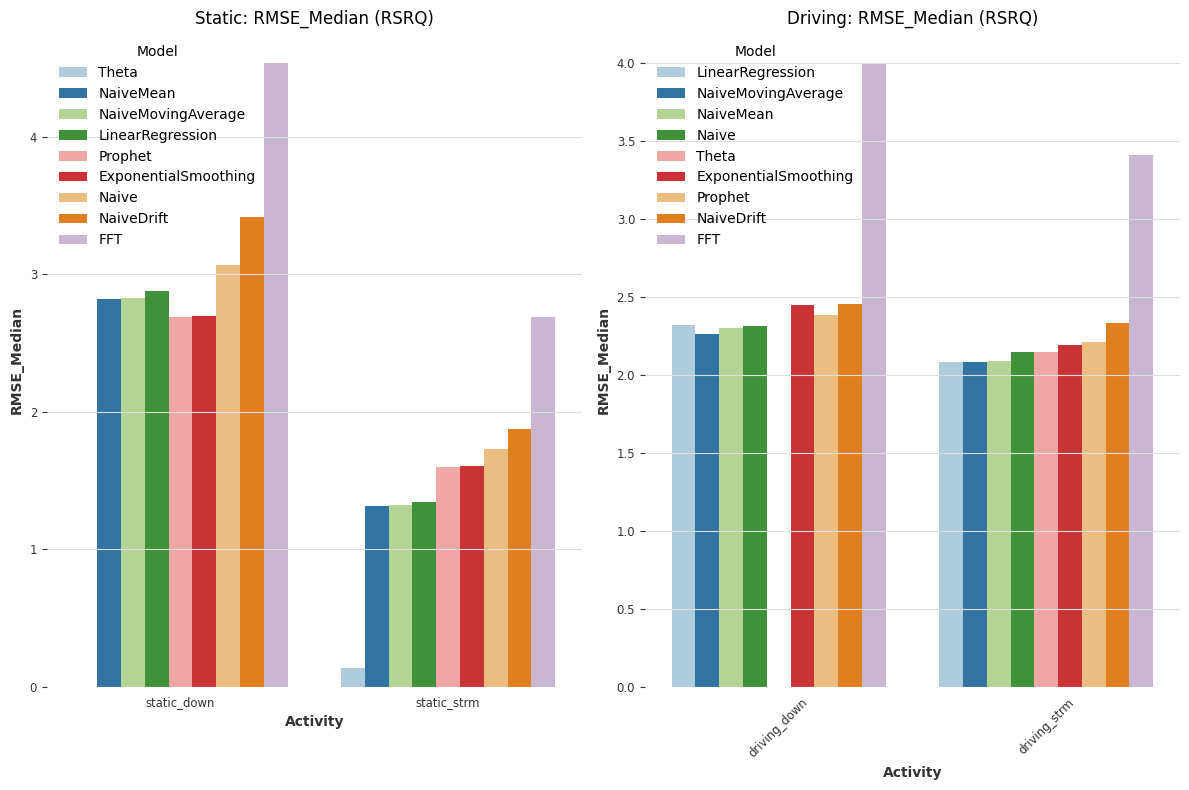

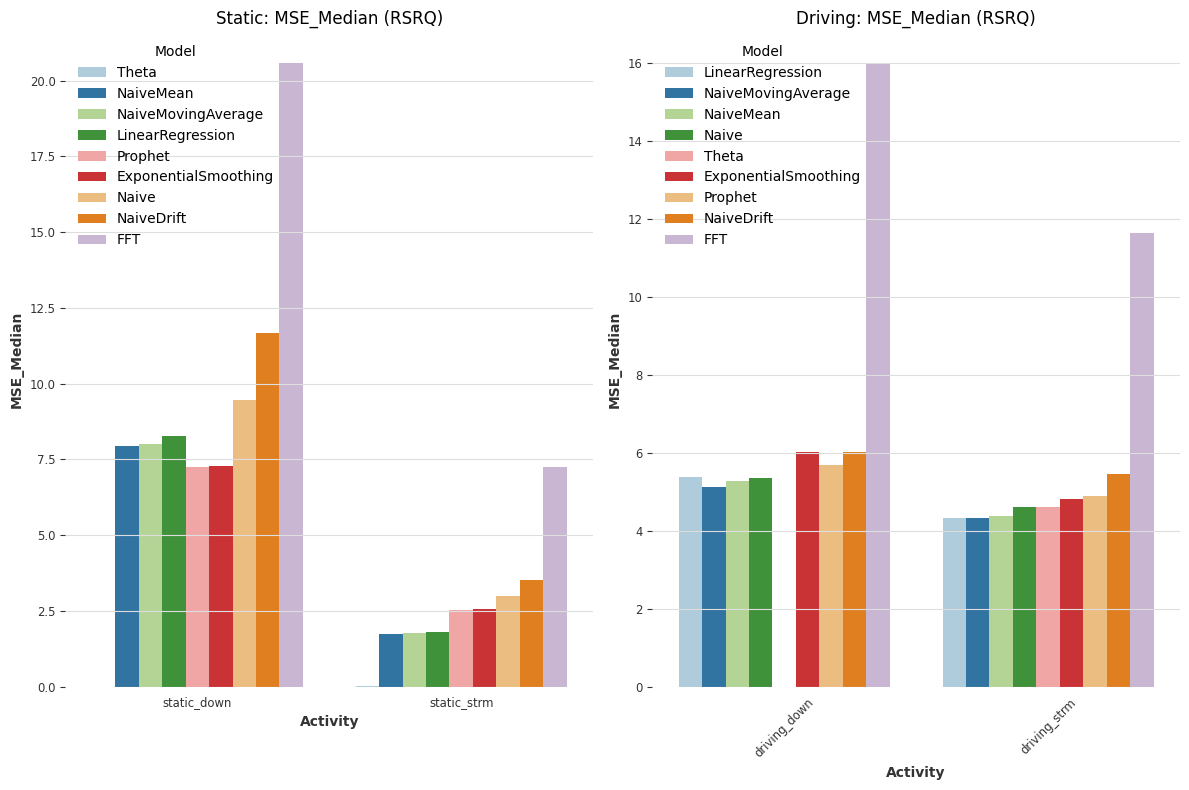

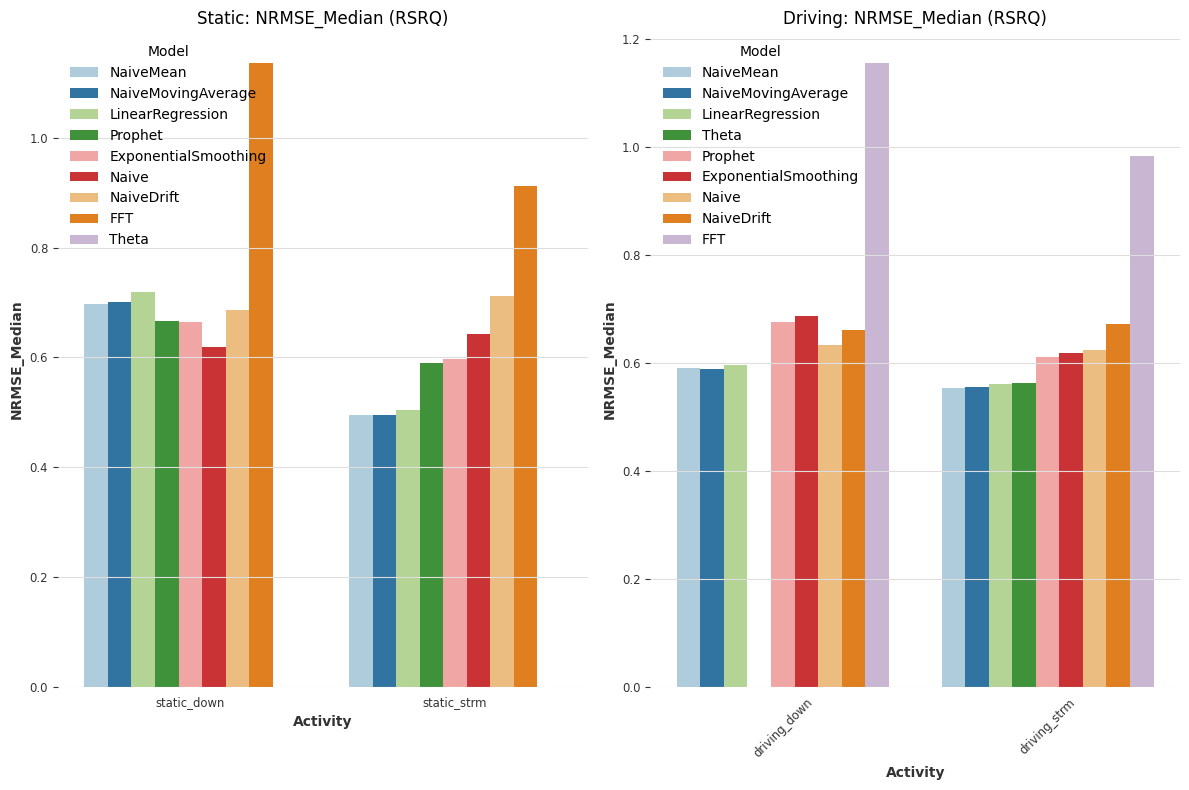

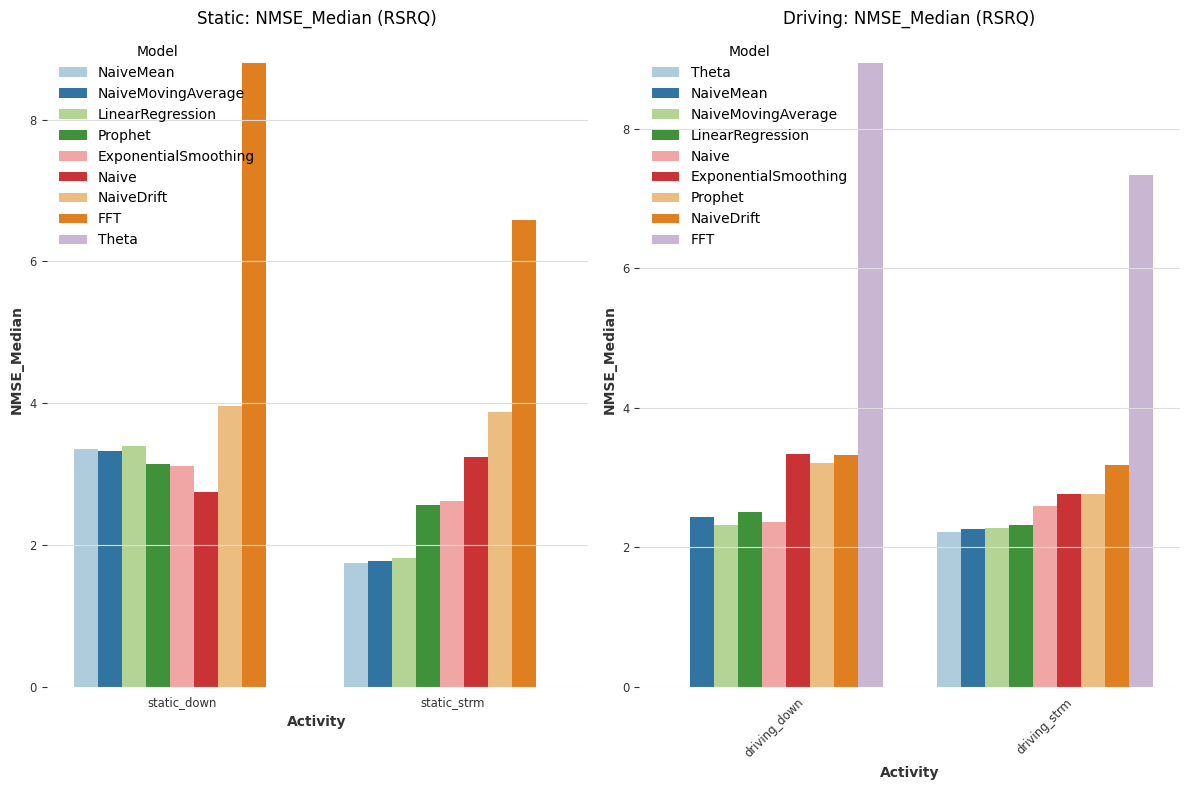

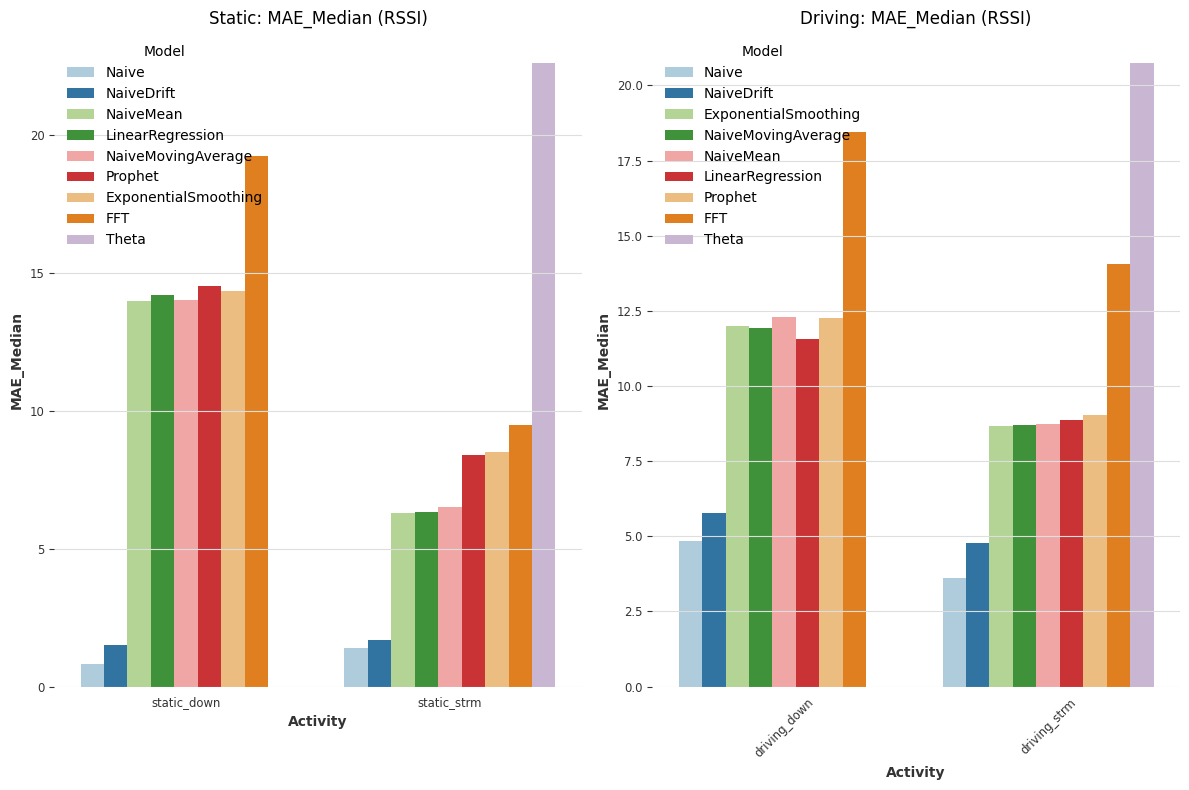

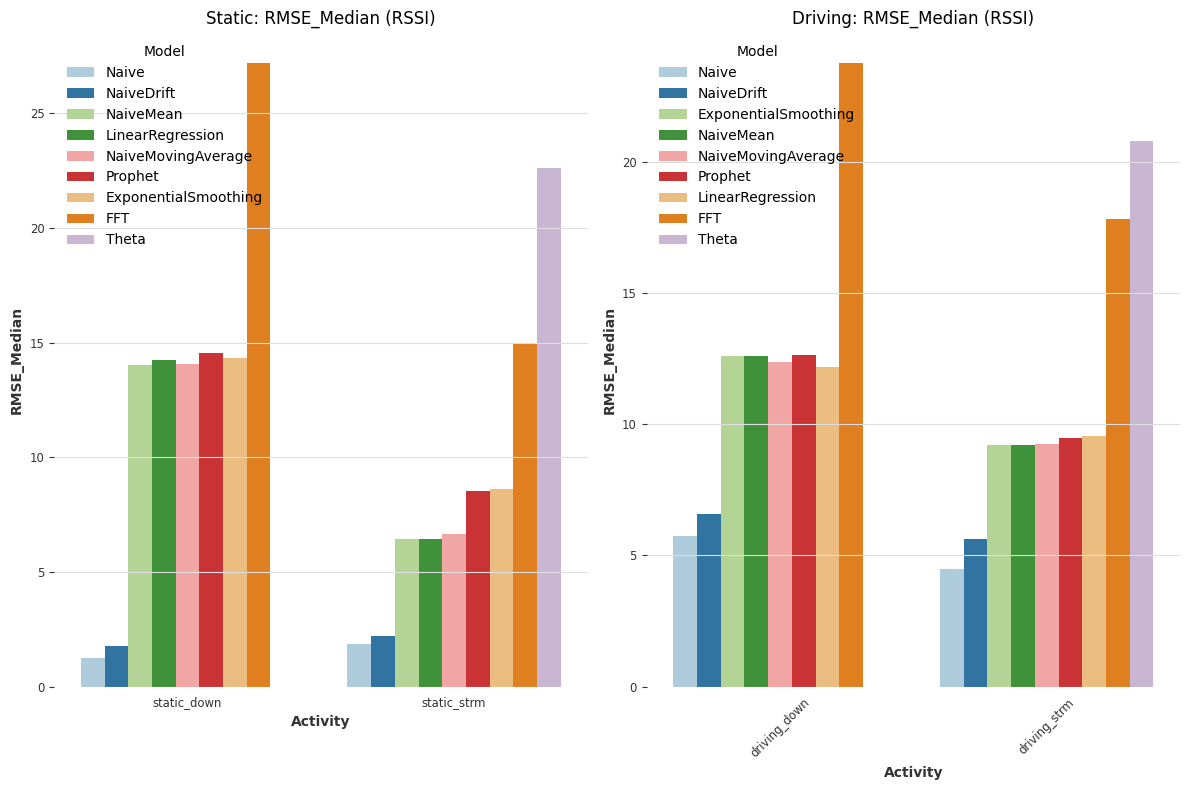

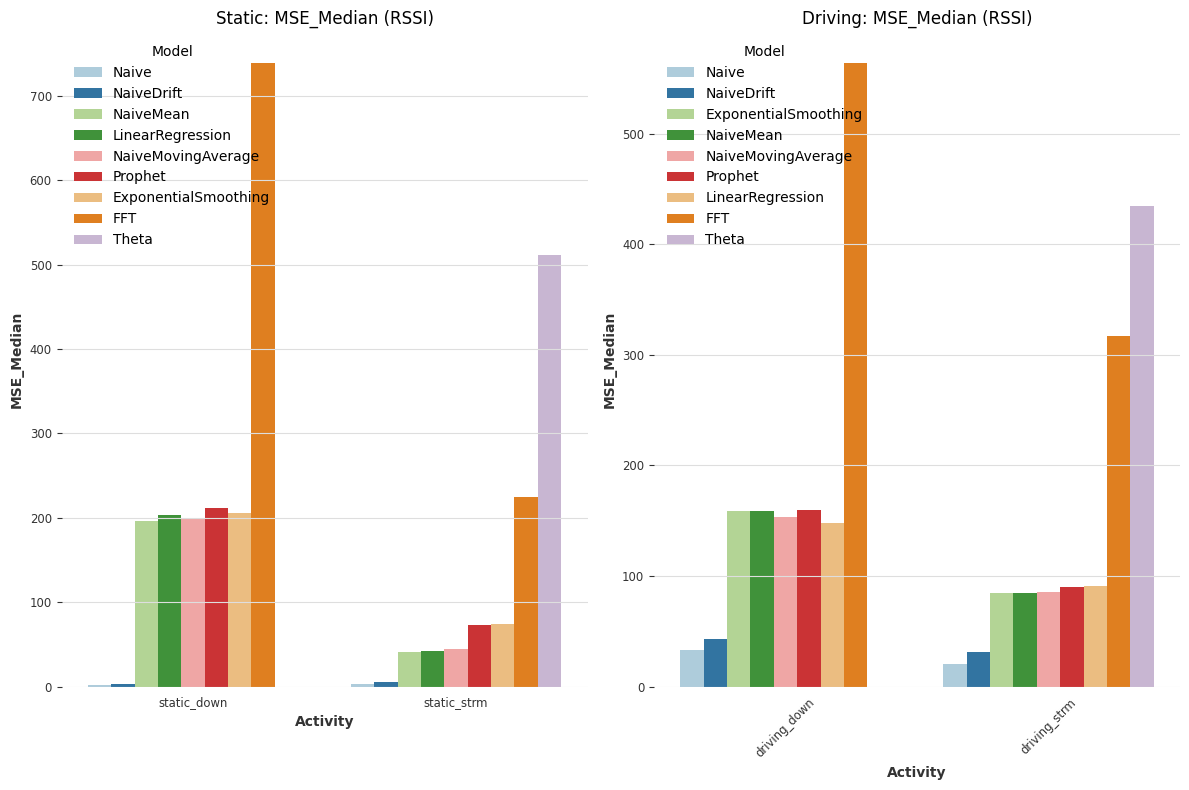

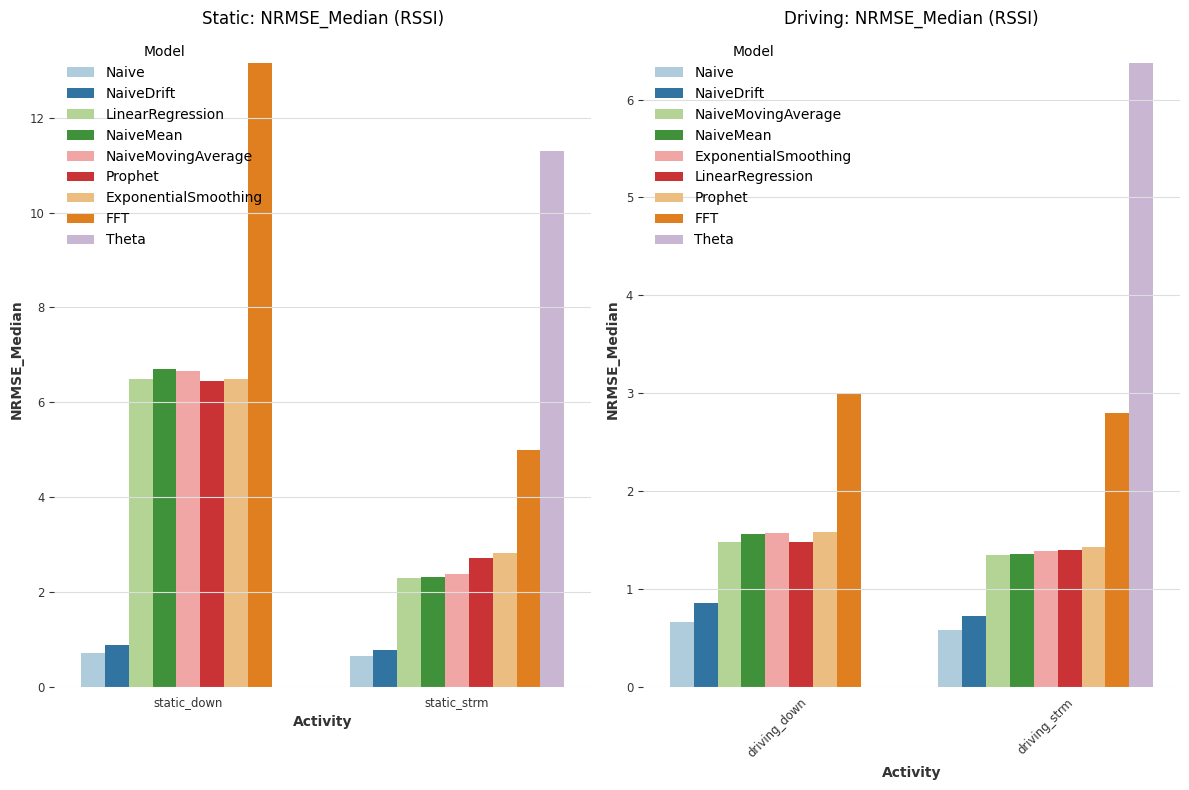

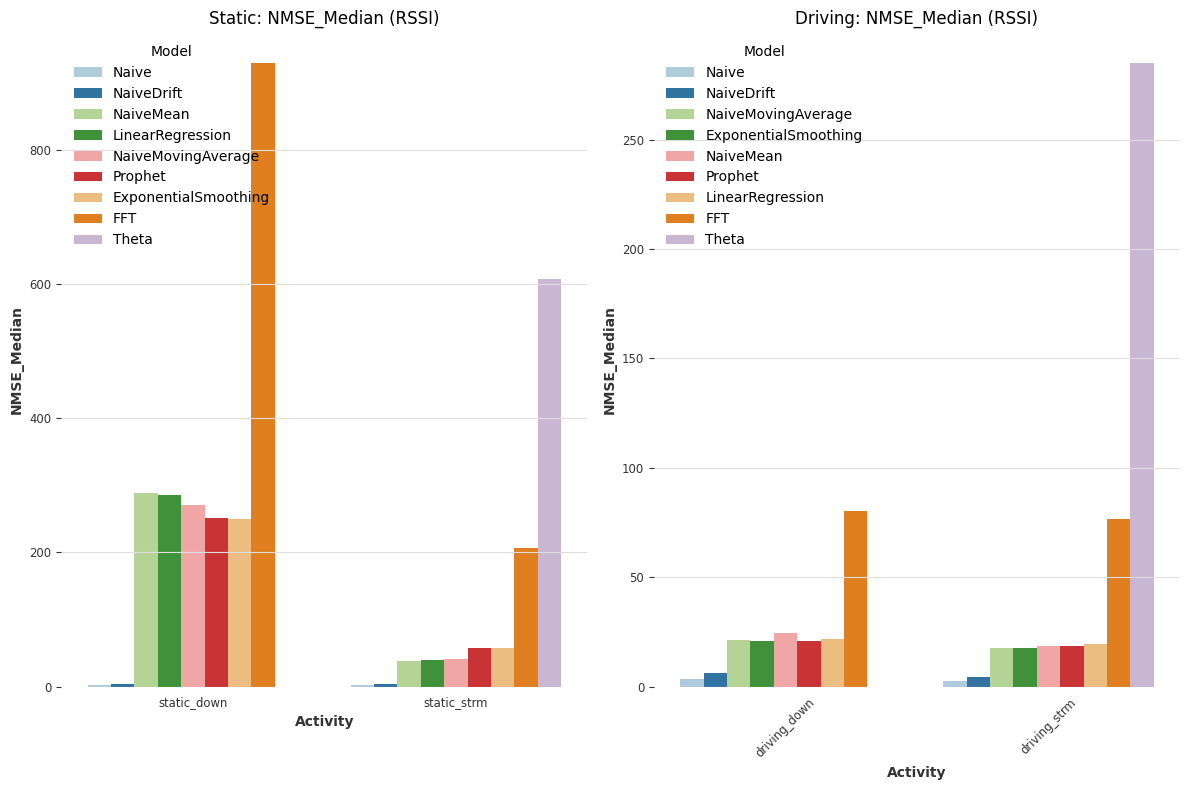

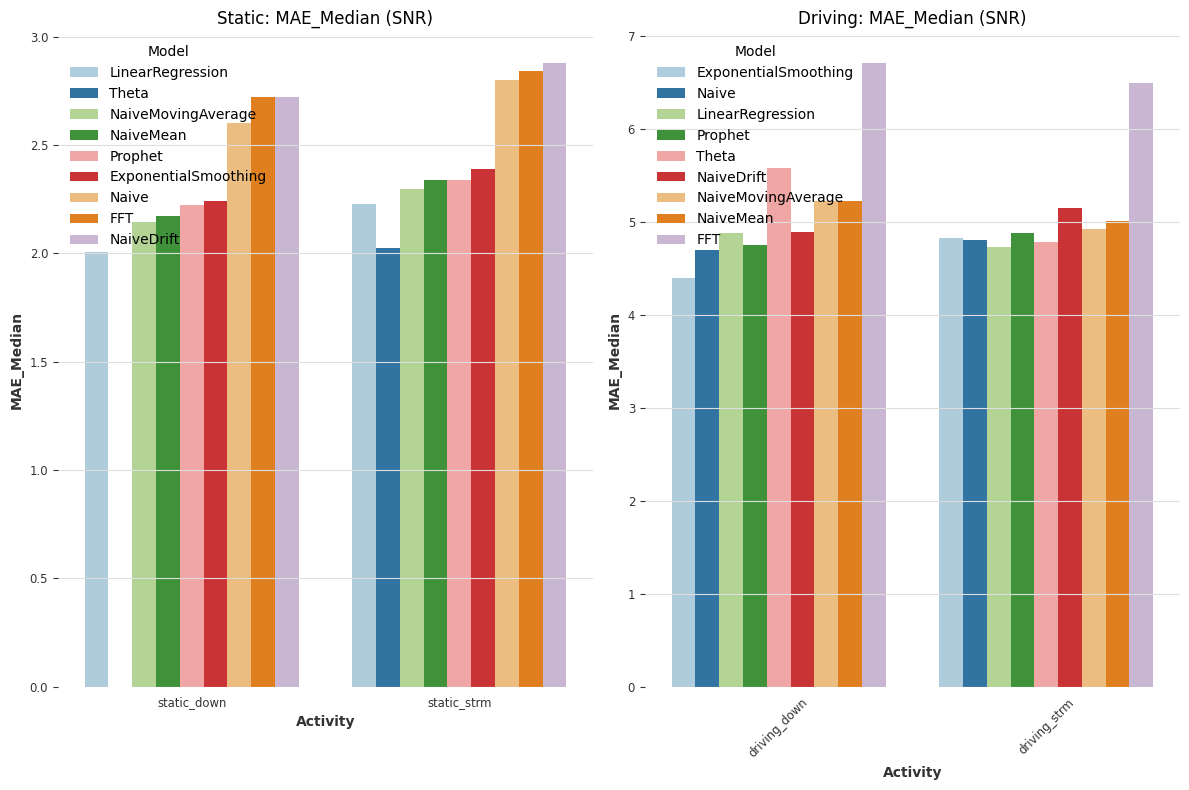

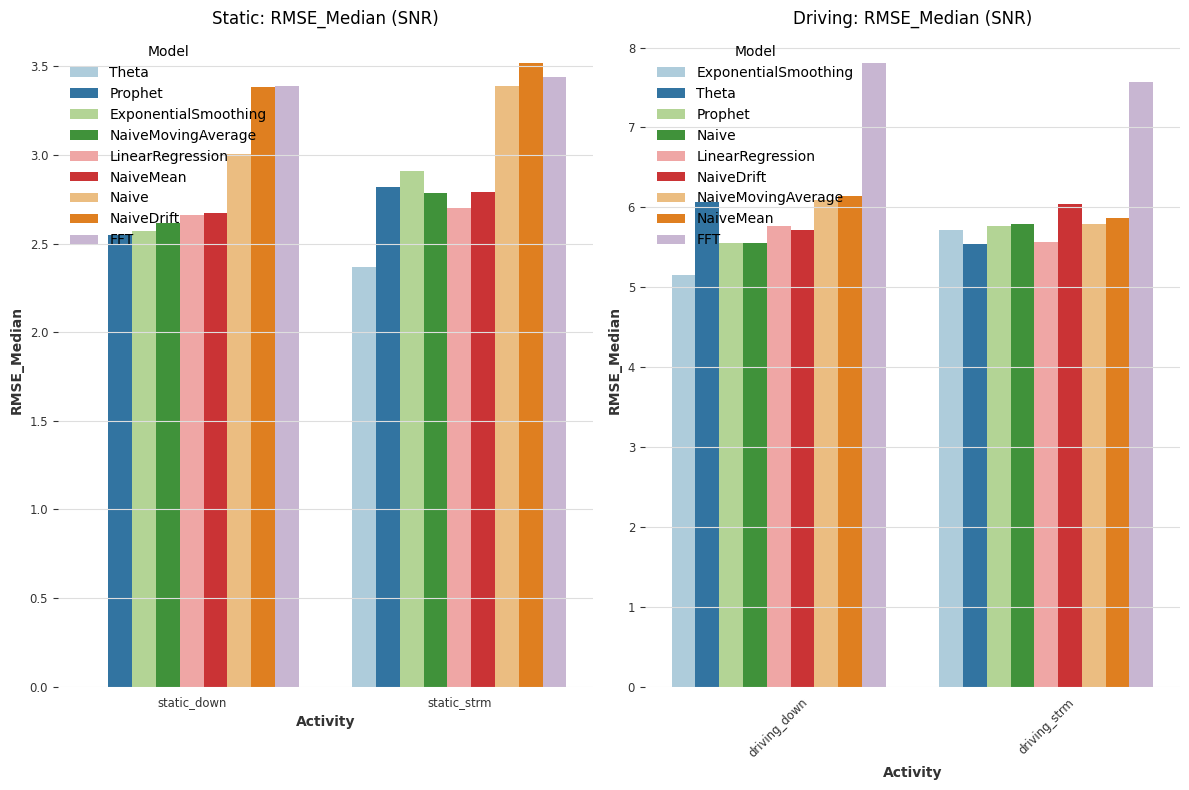

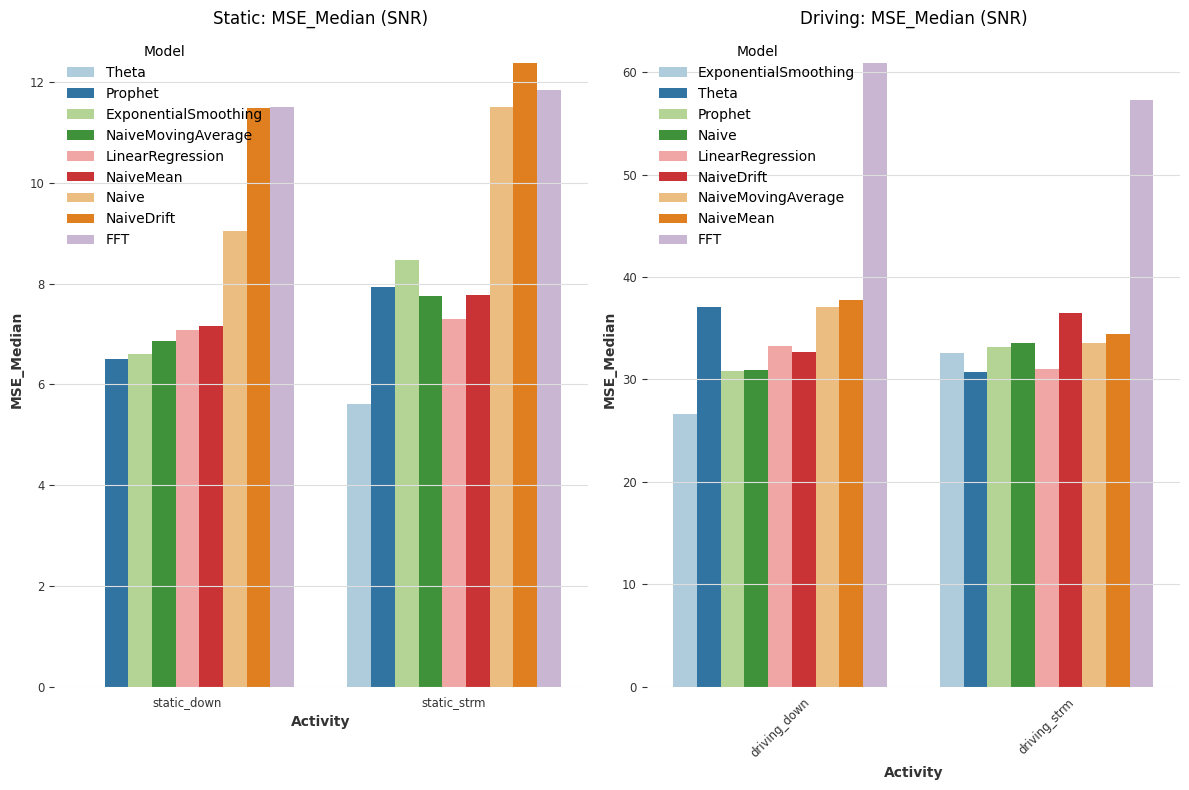

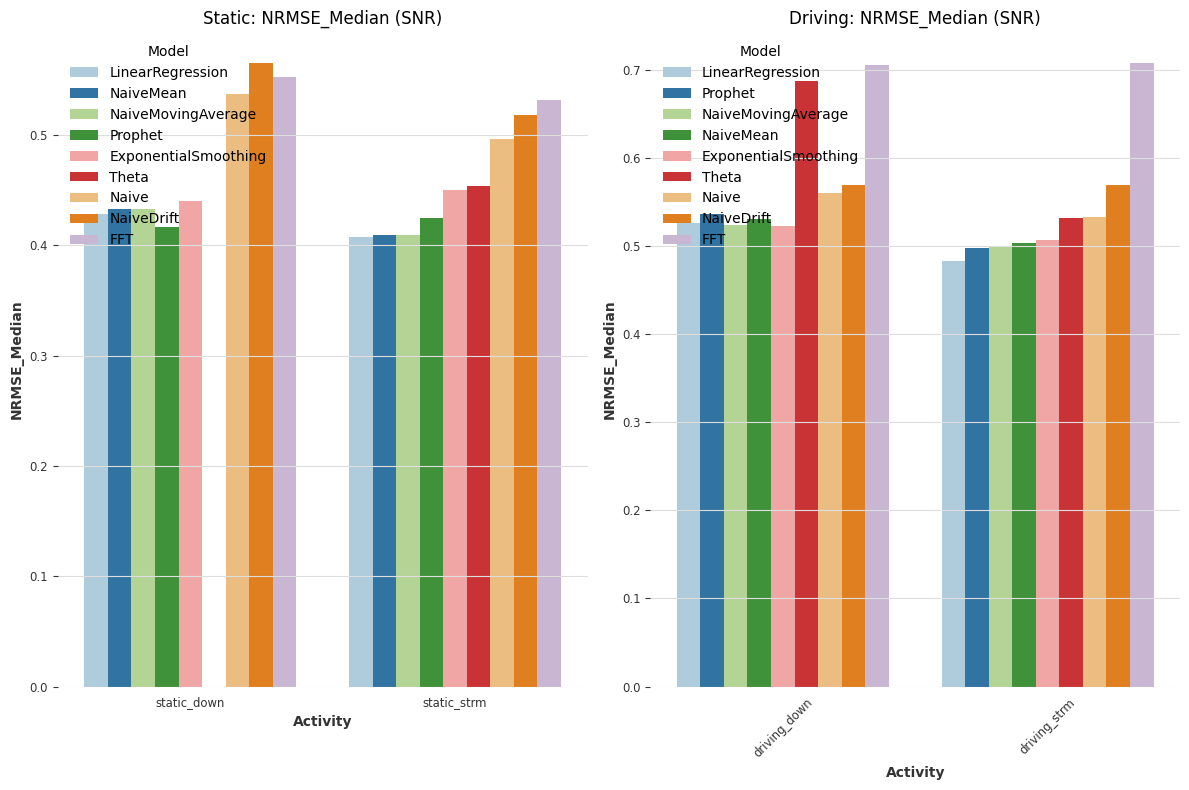

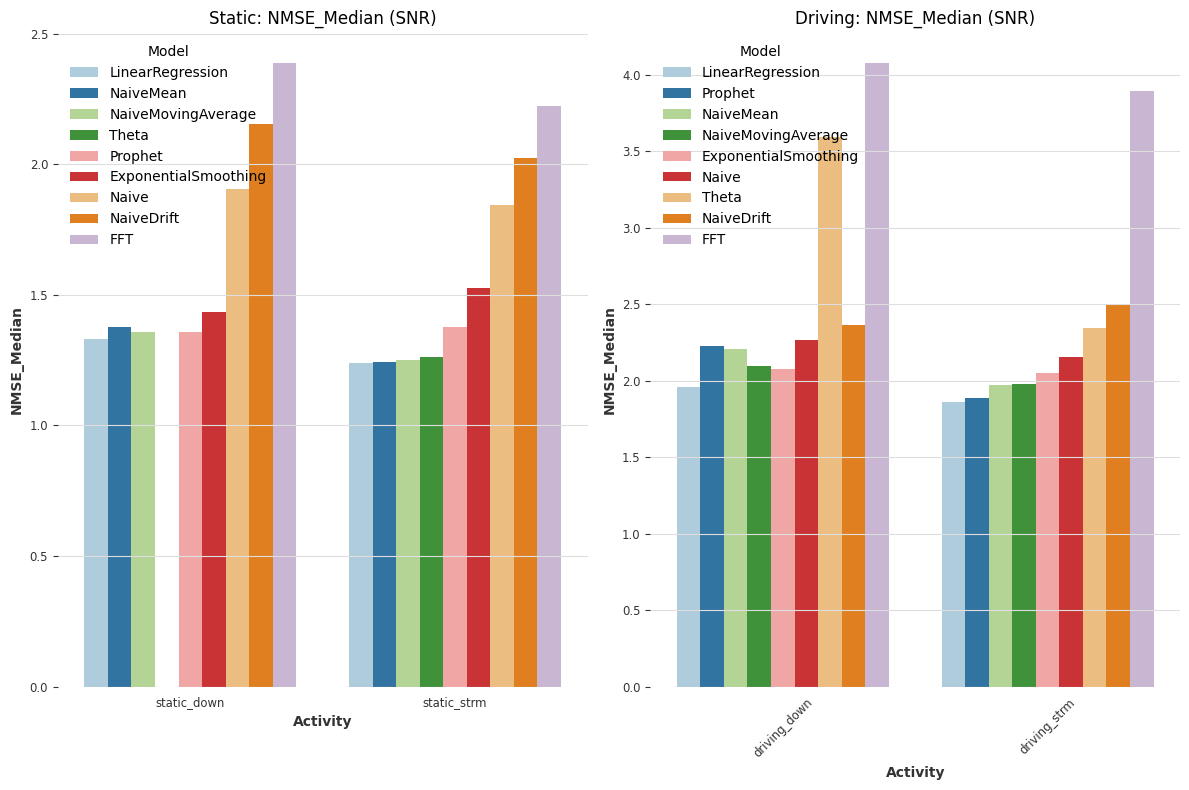

In [122]:
plot_bar_for_medians_by_target(agg_data)

## Boxplot das métricas

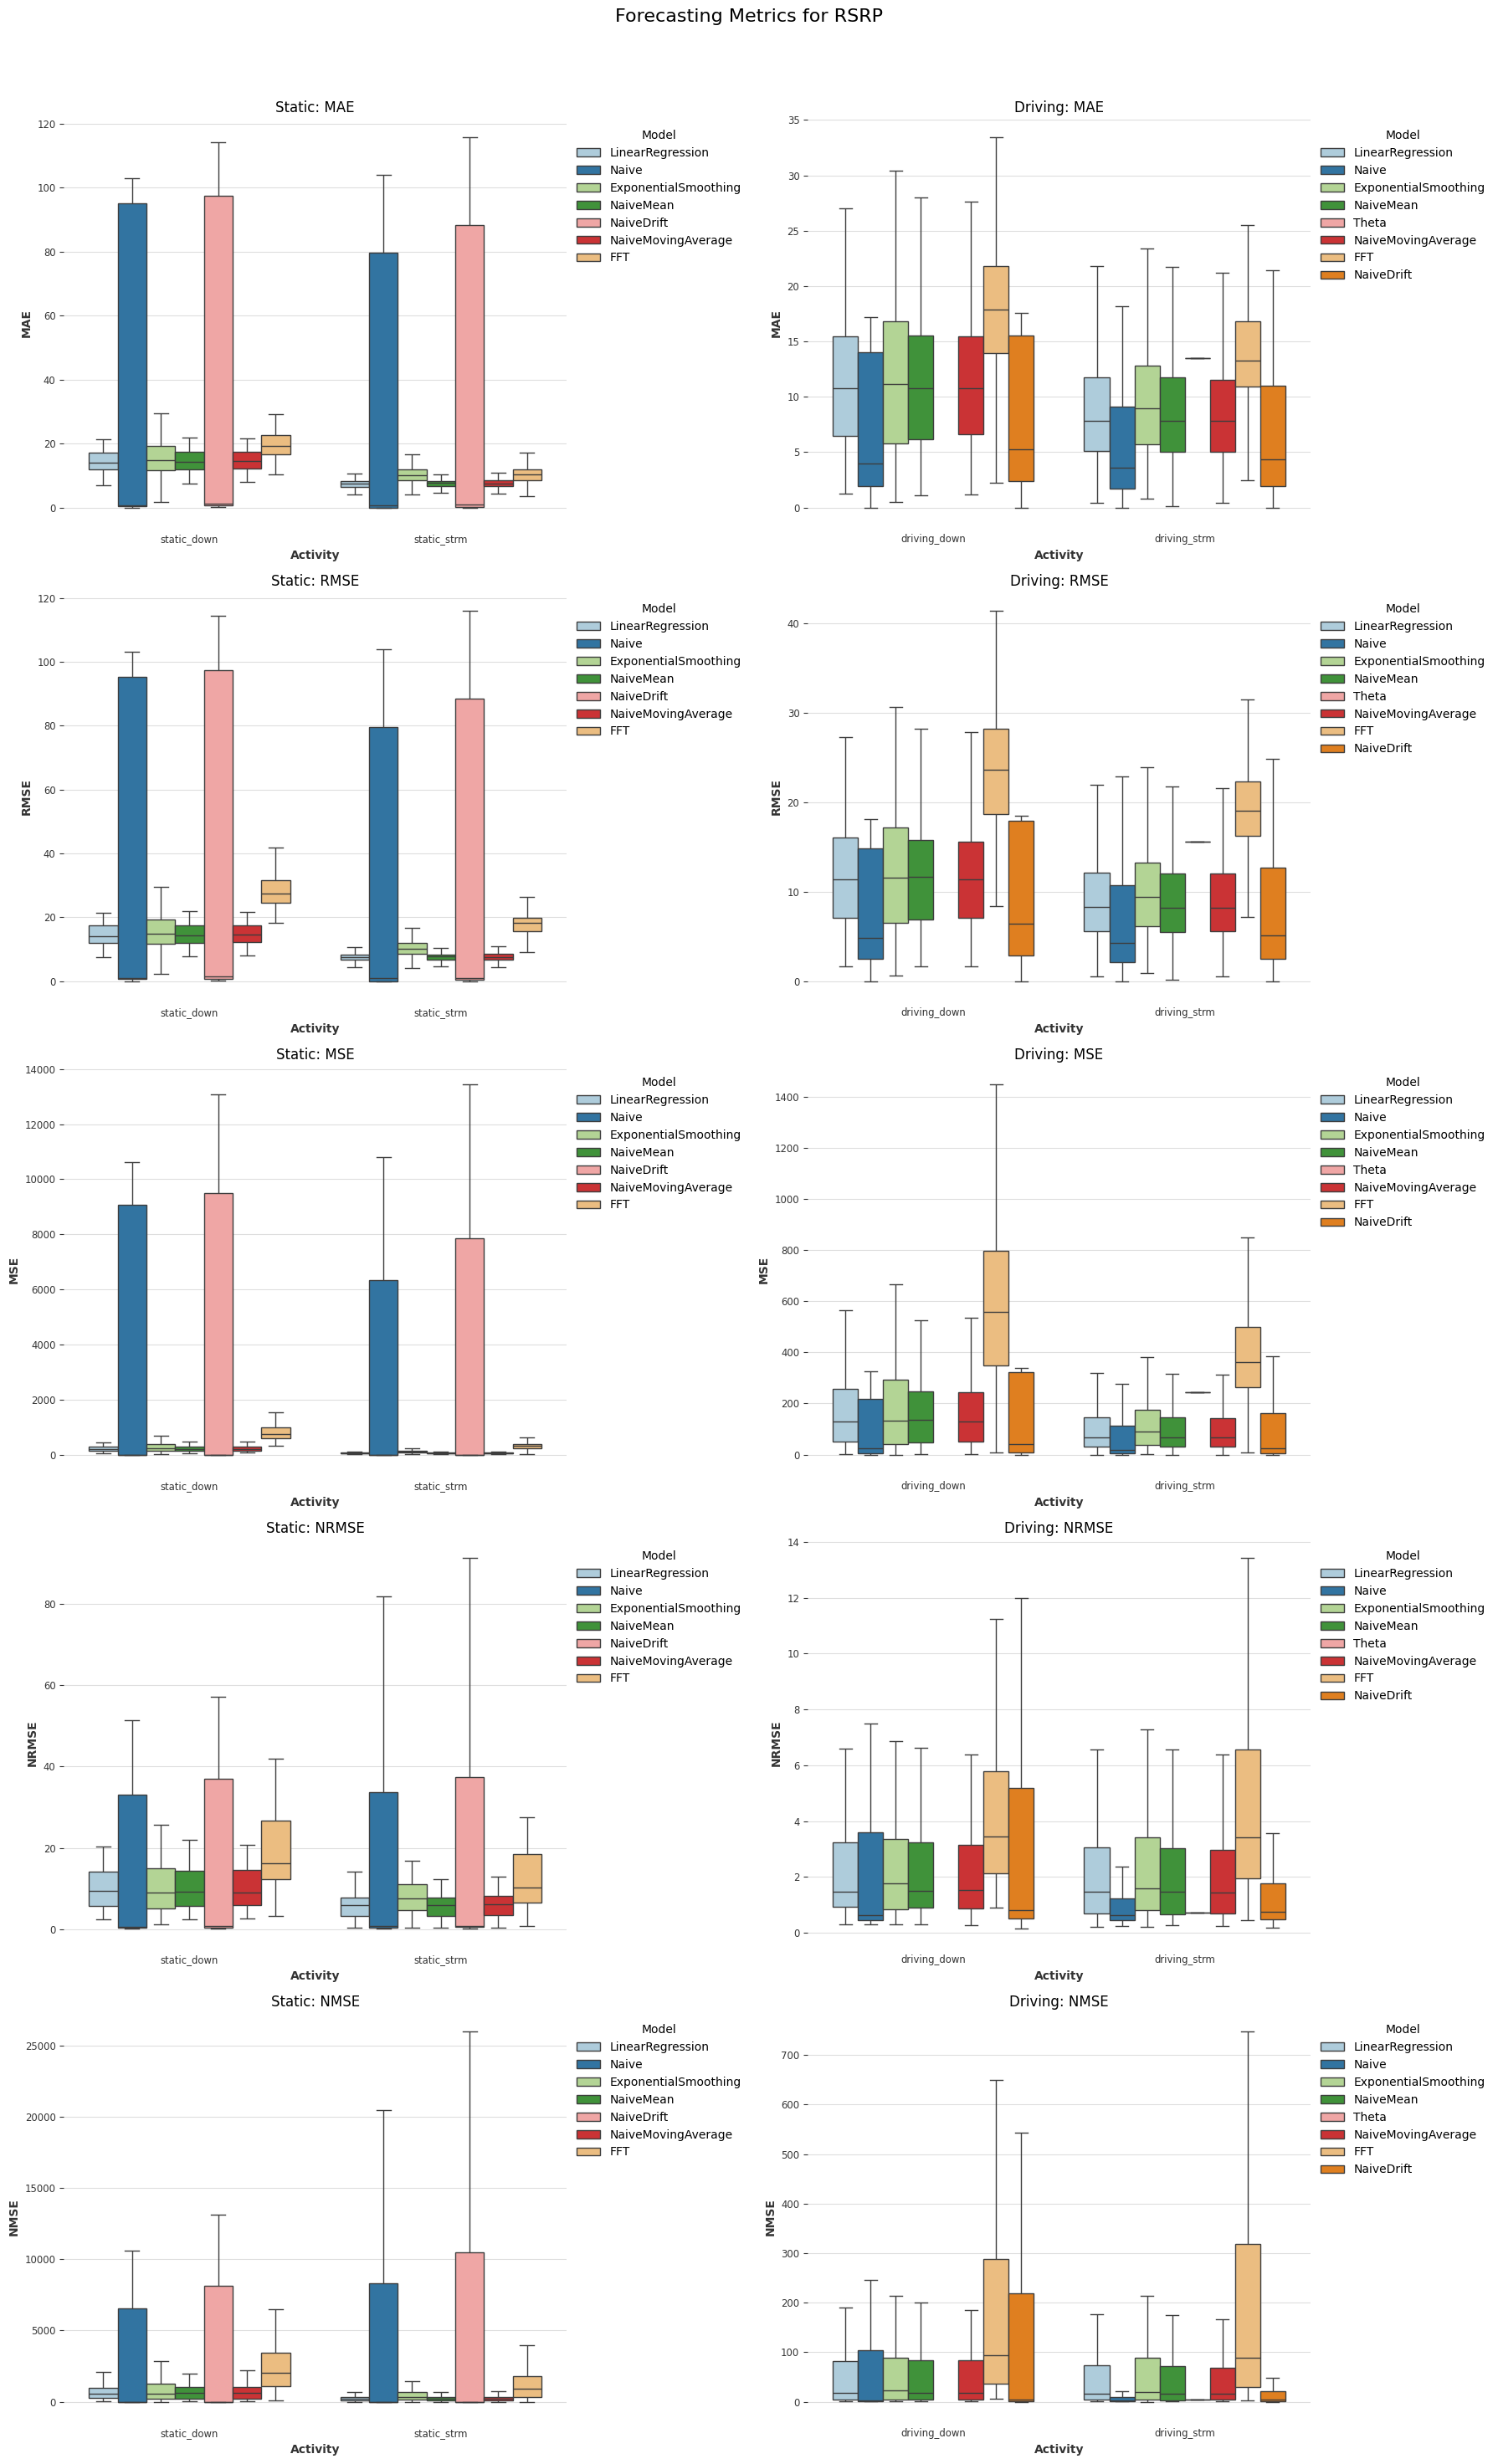

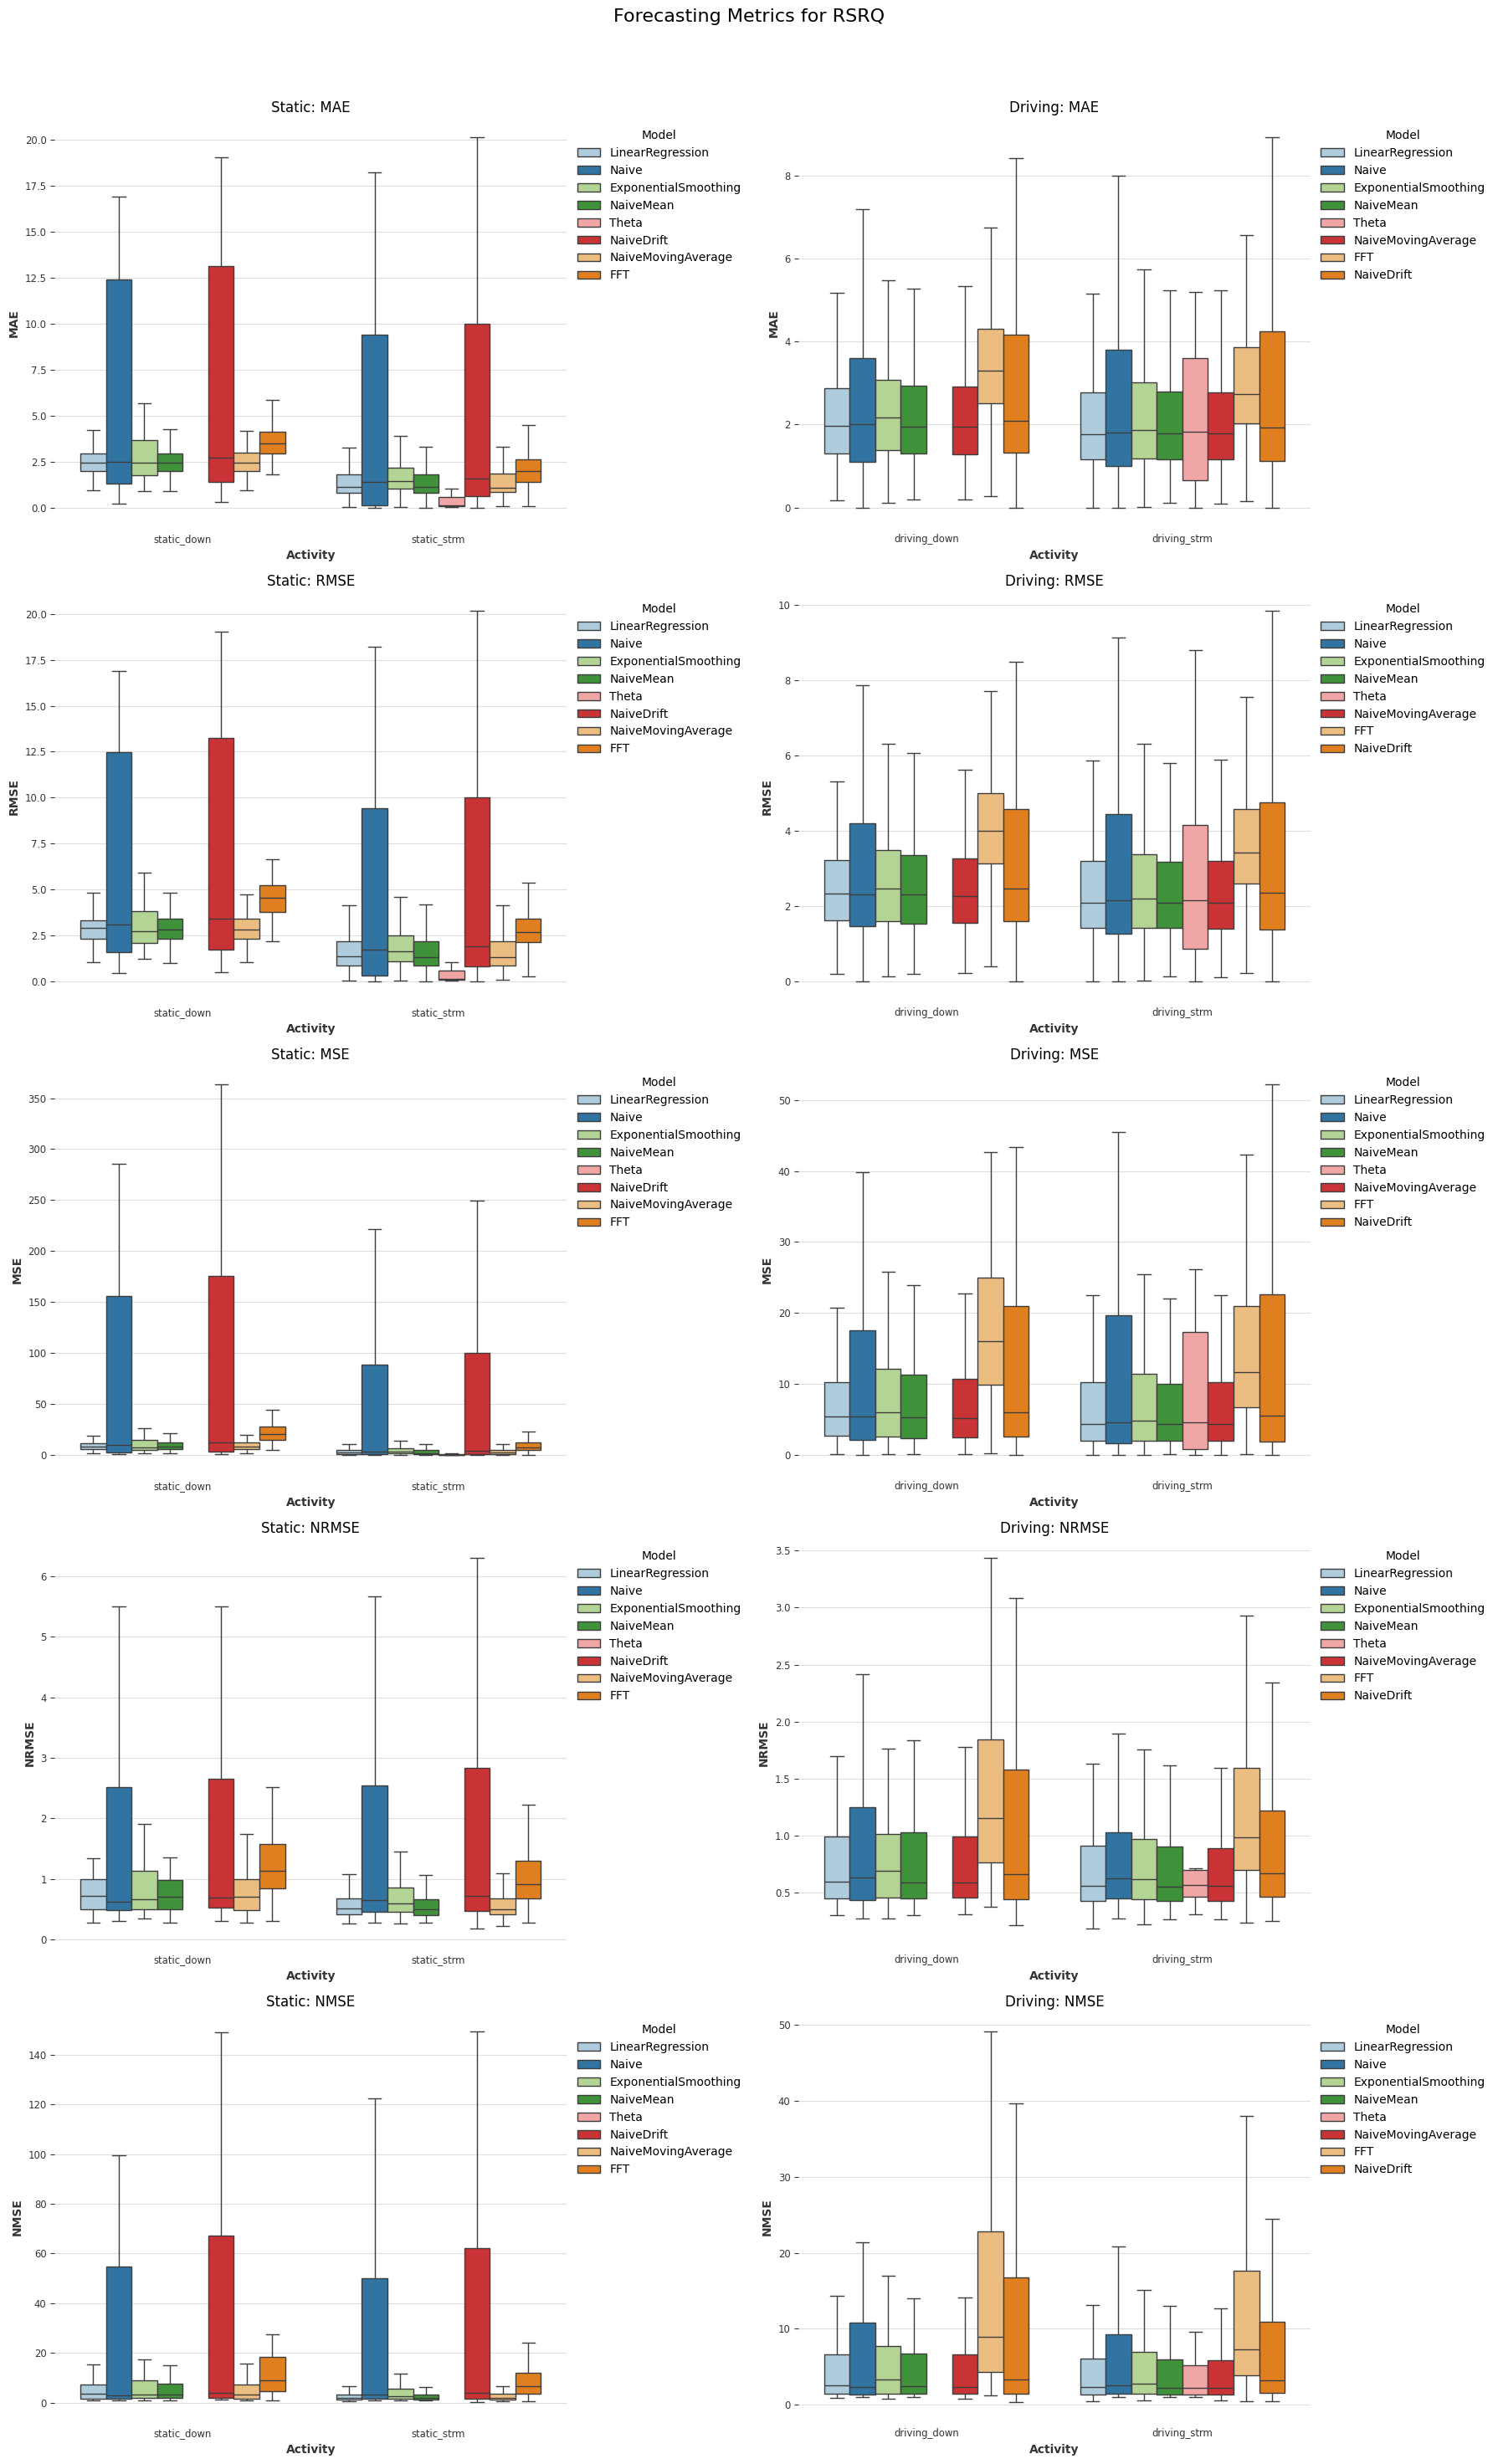

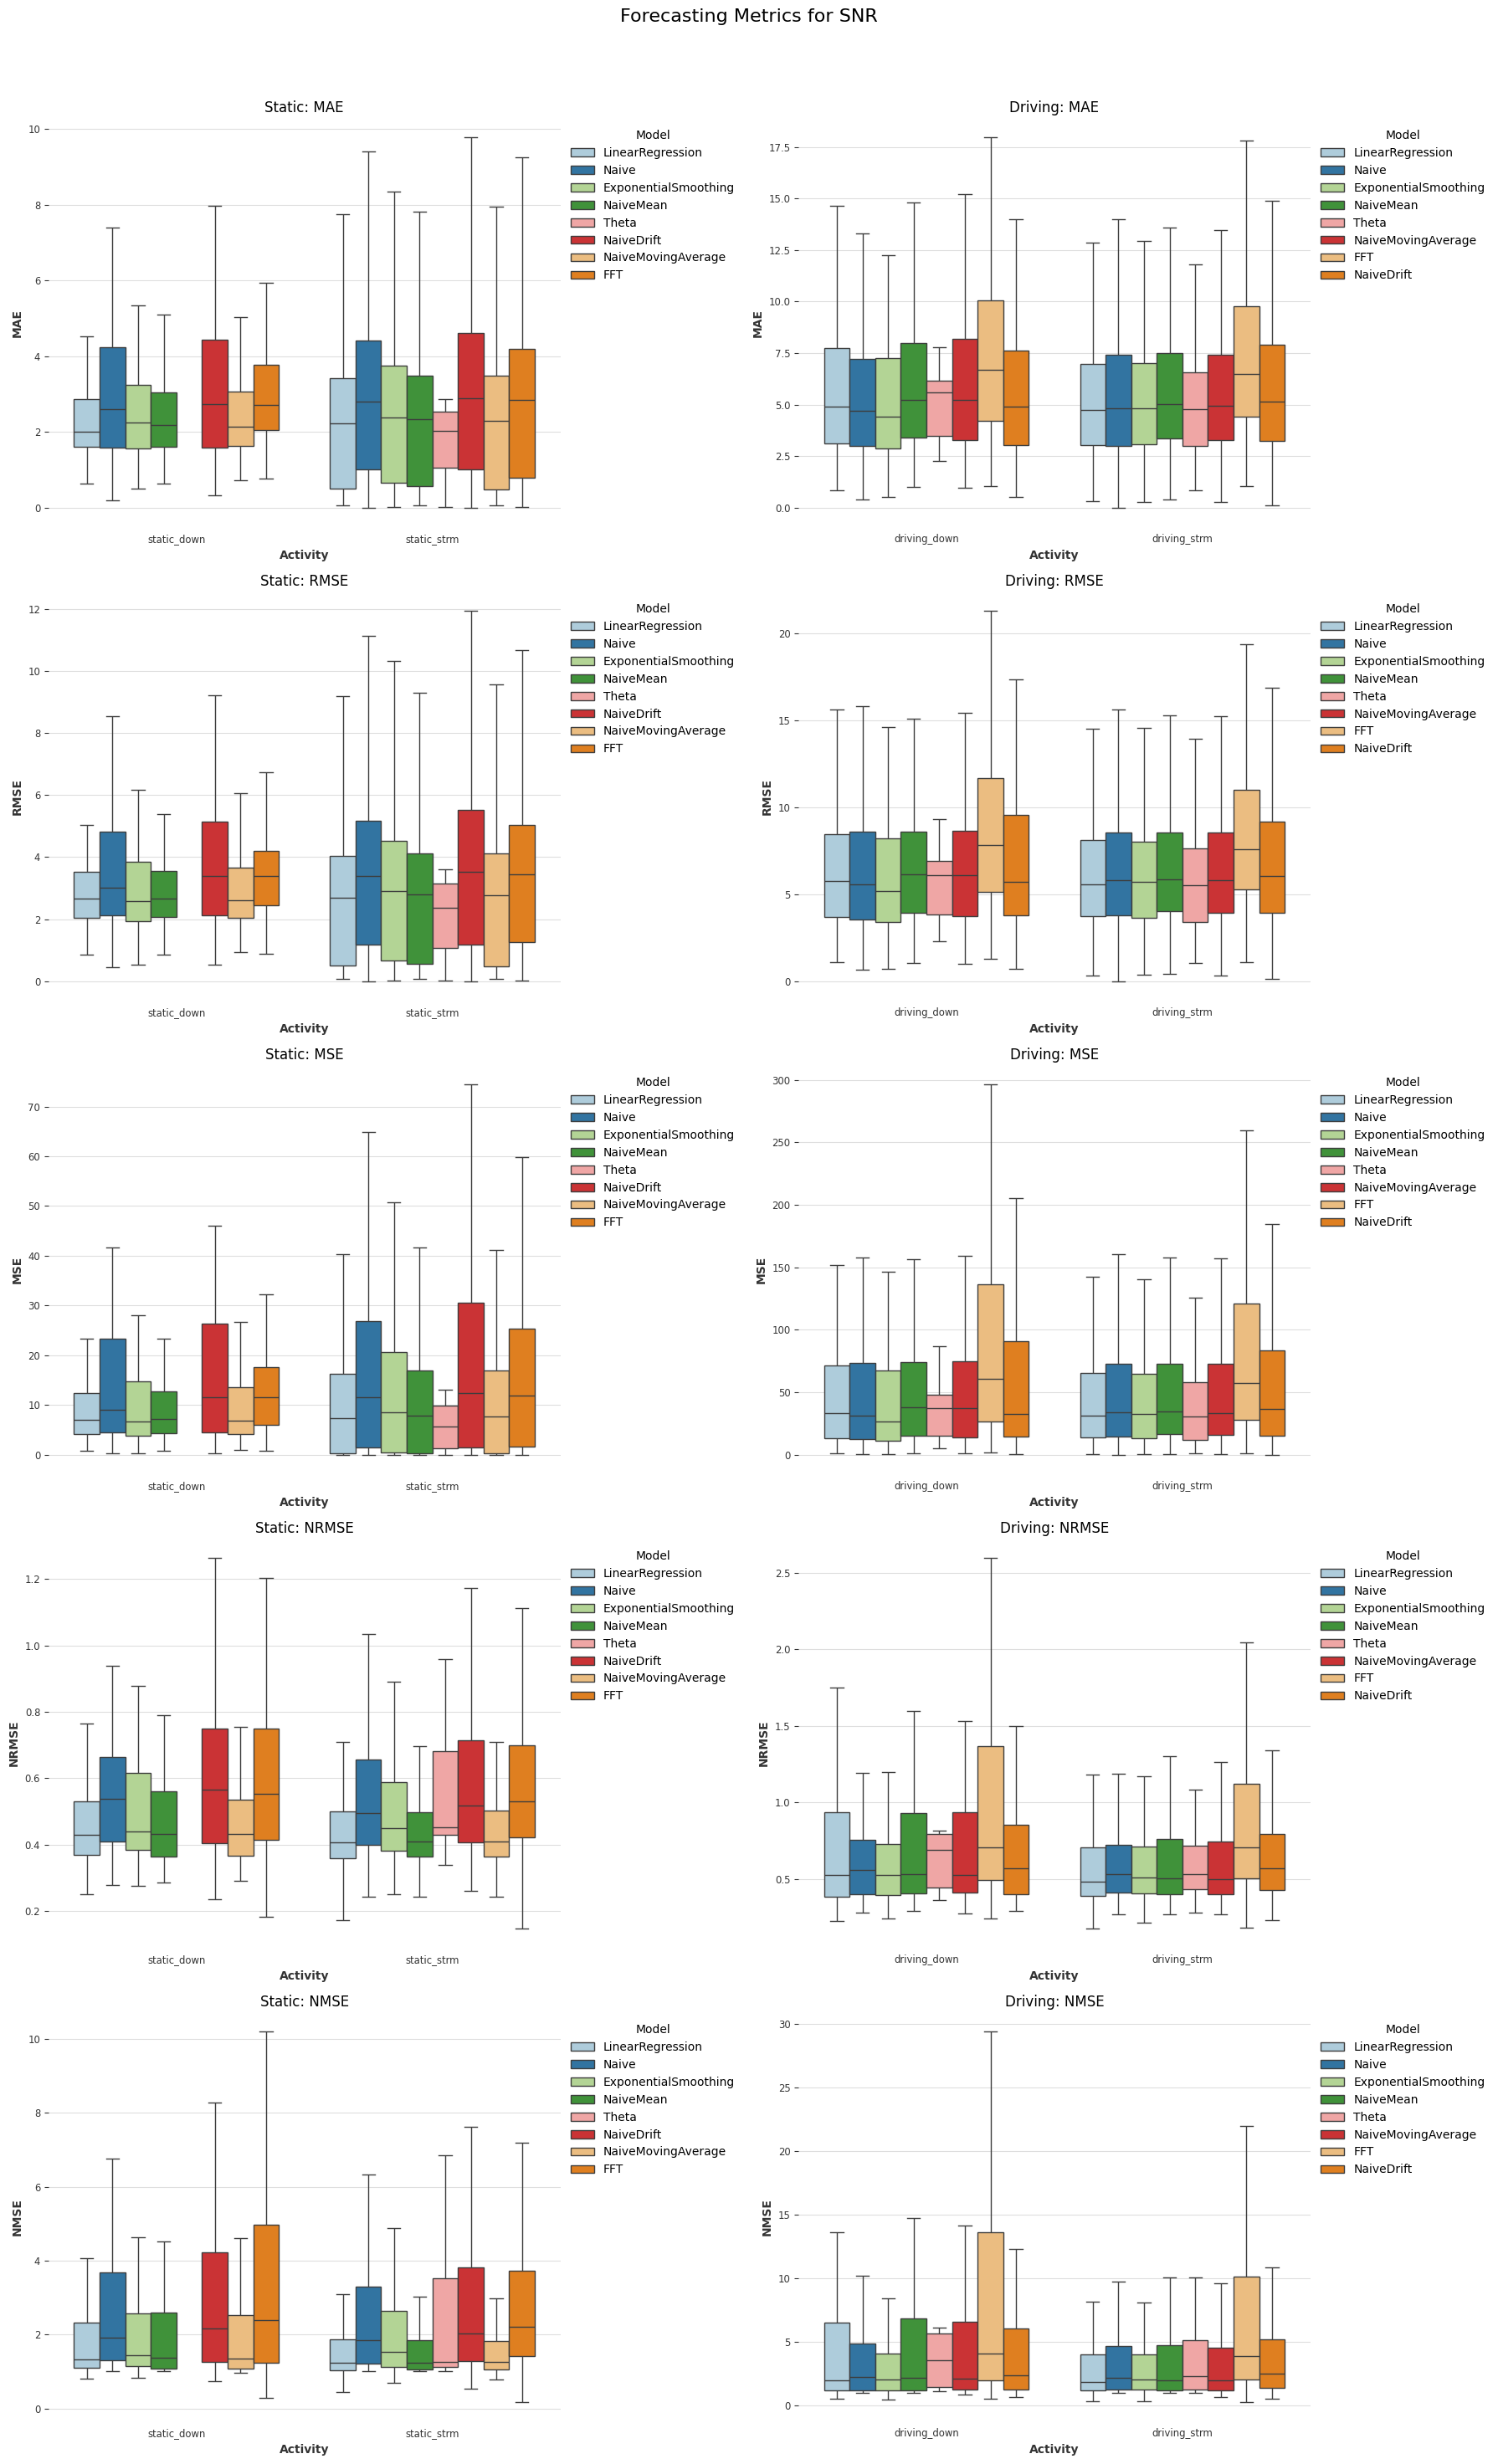

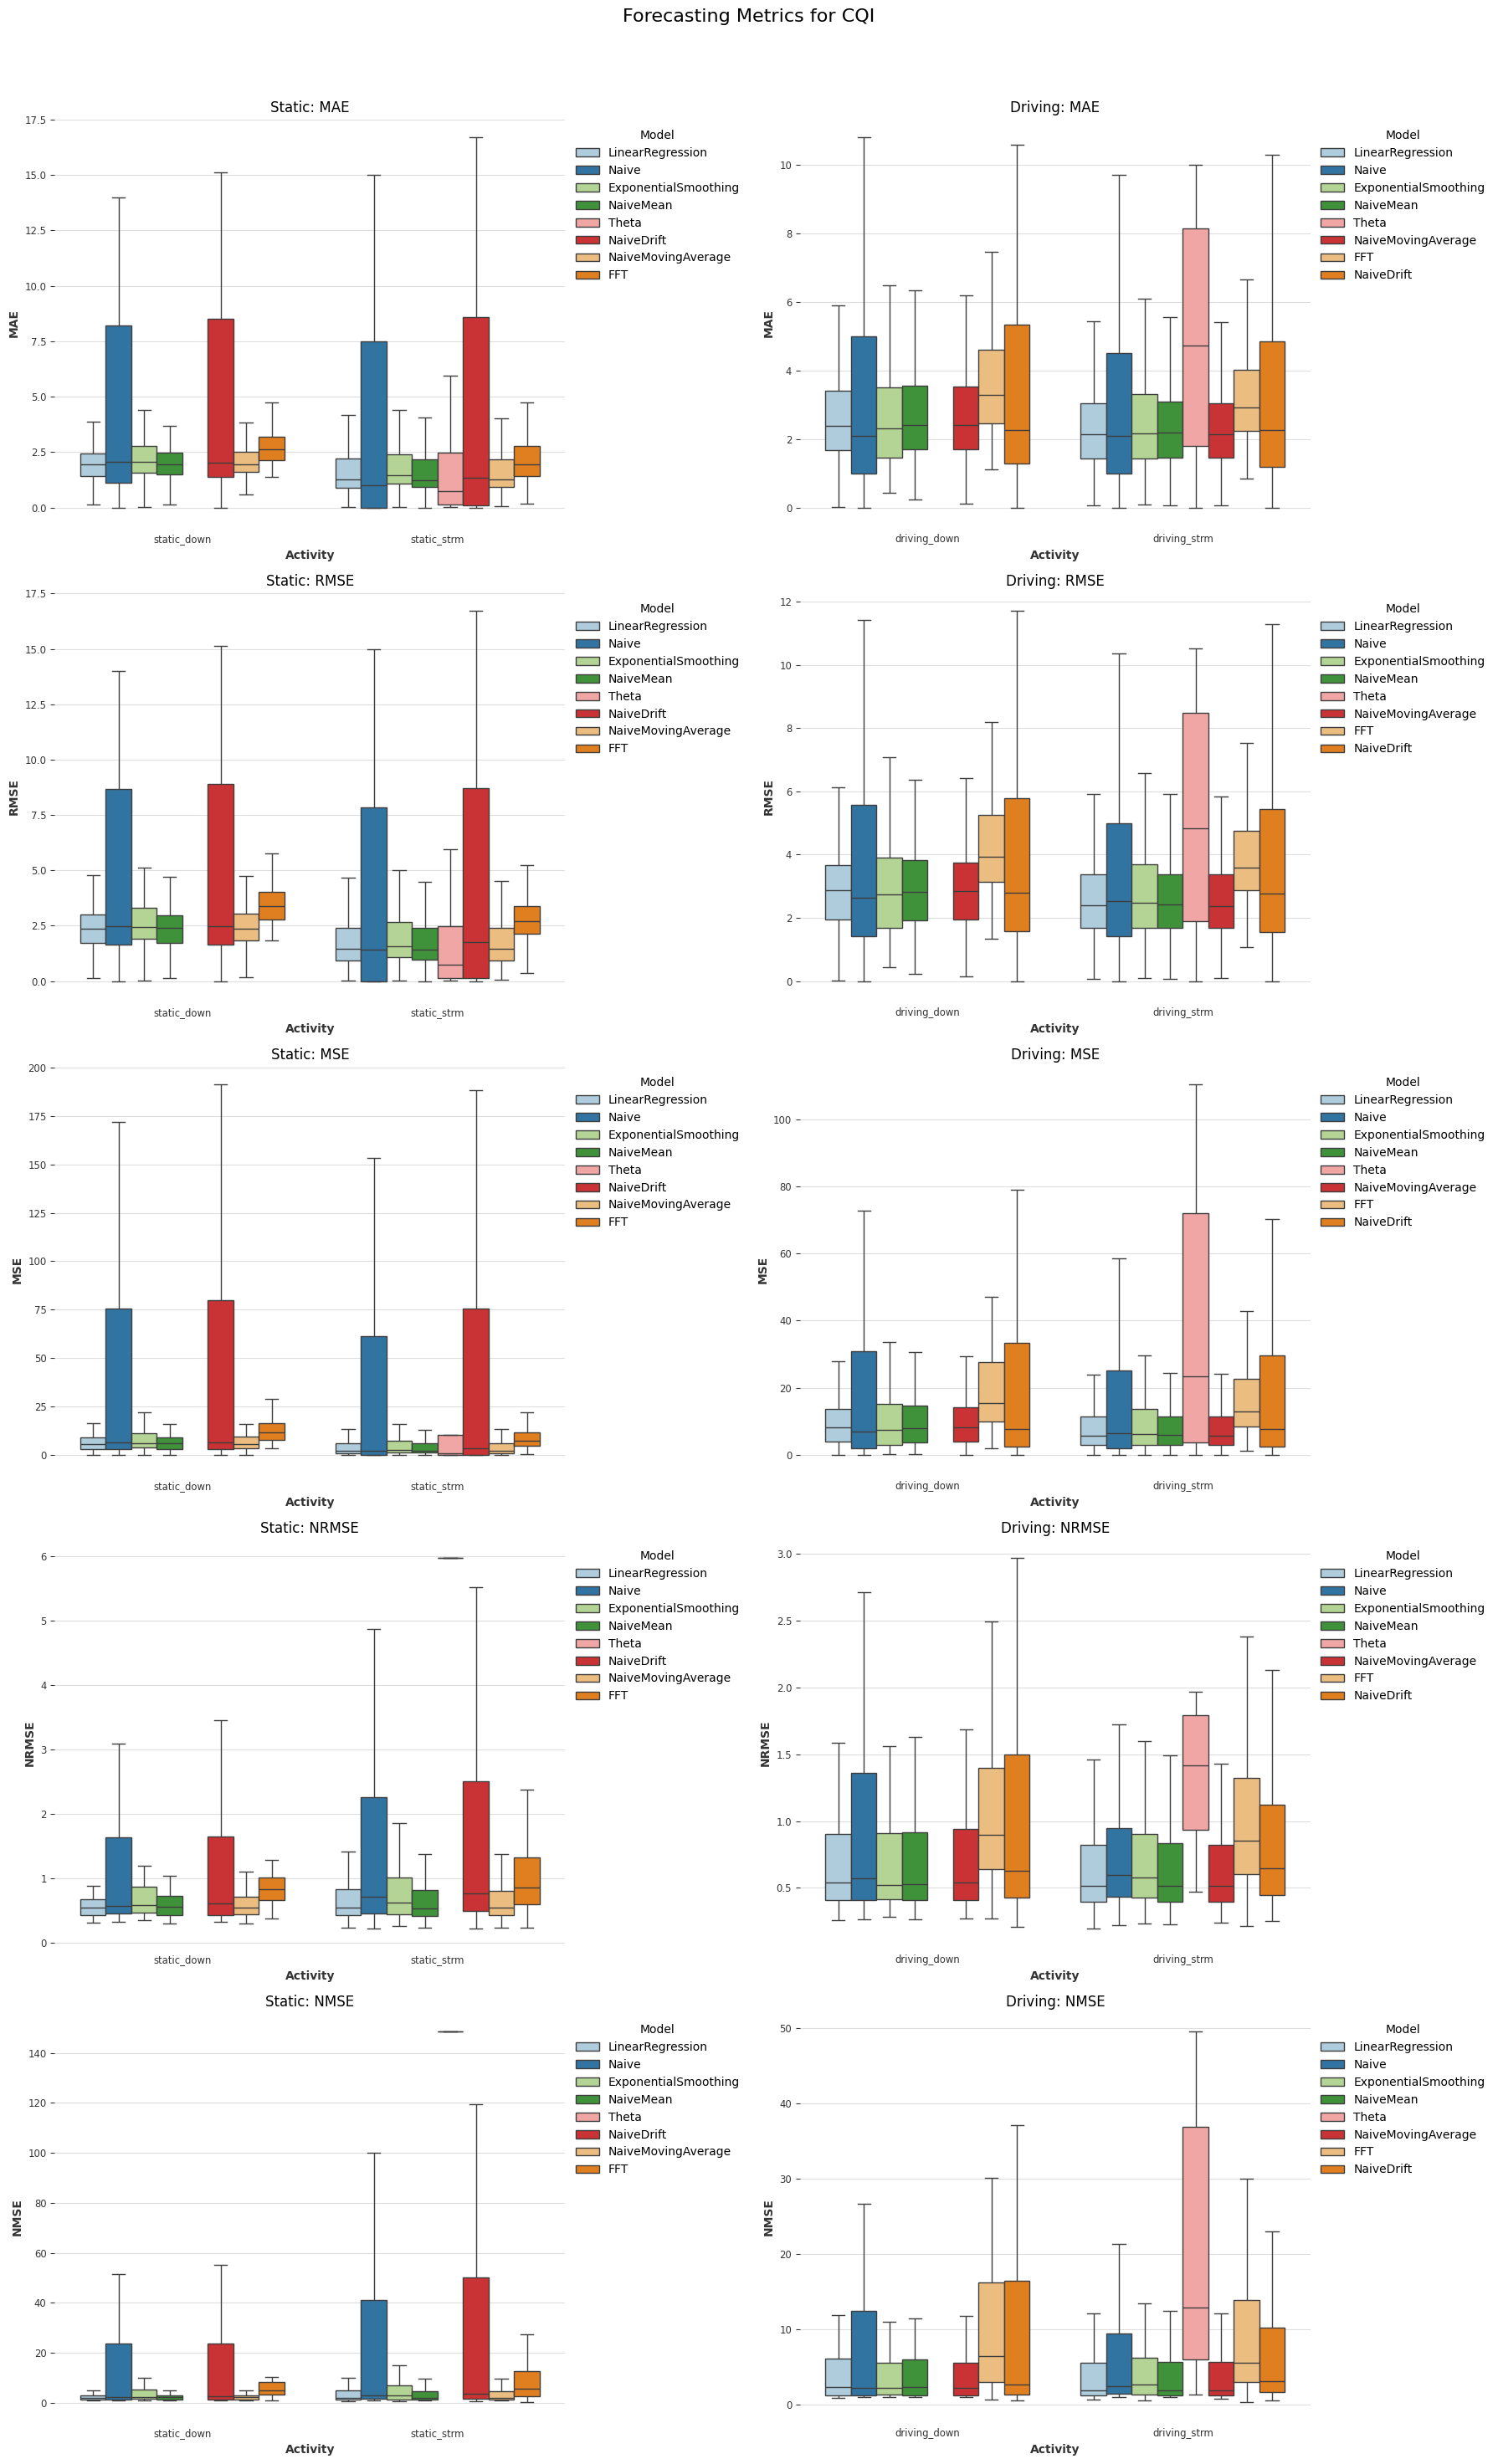

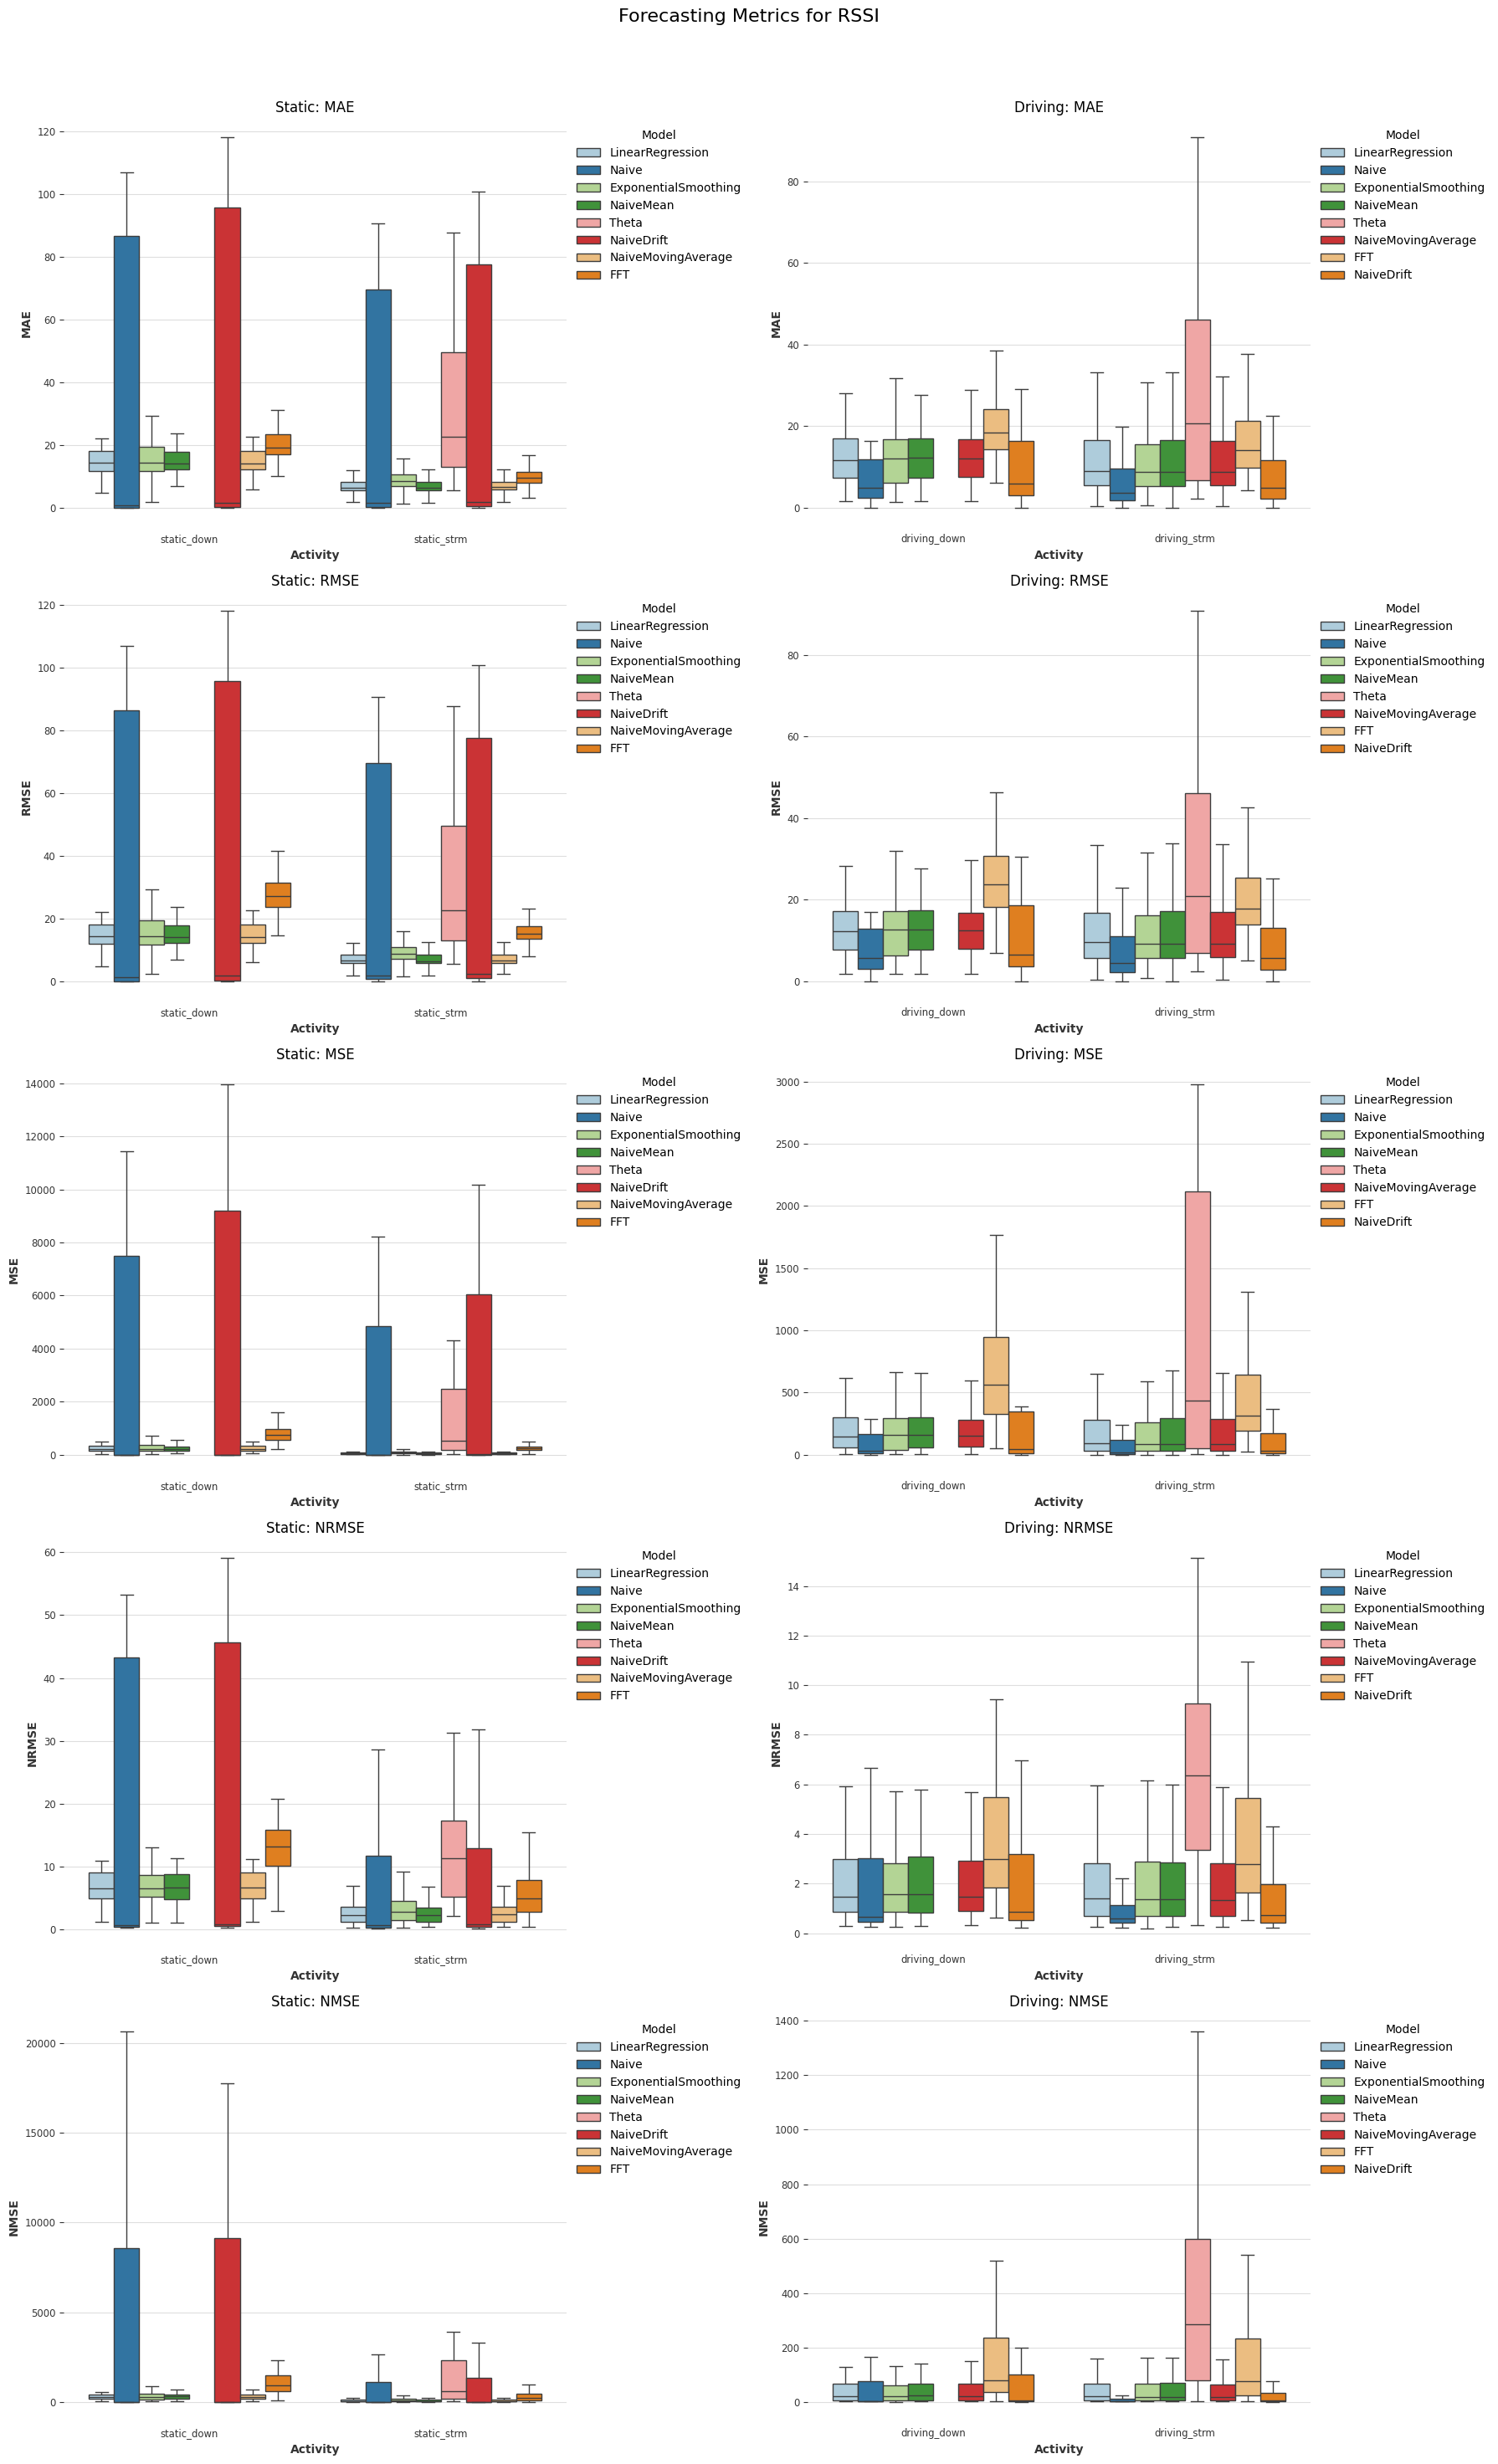

In [69]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

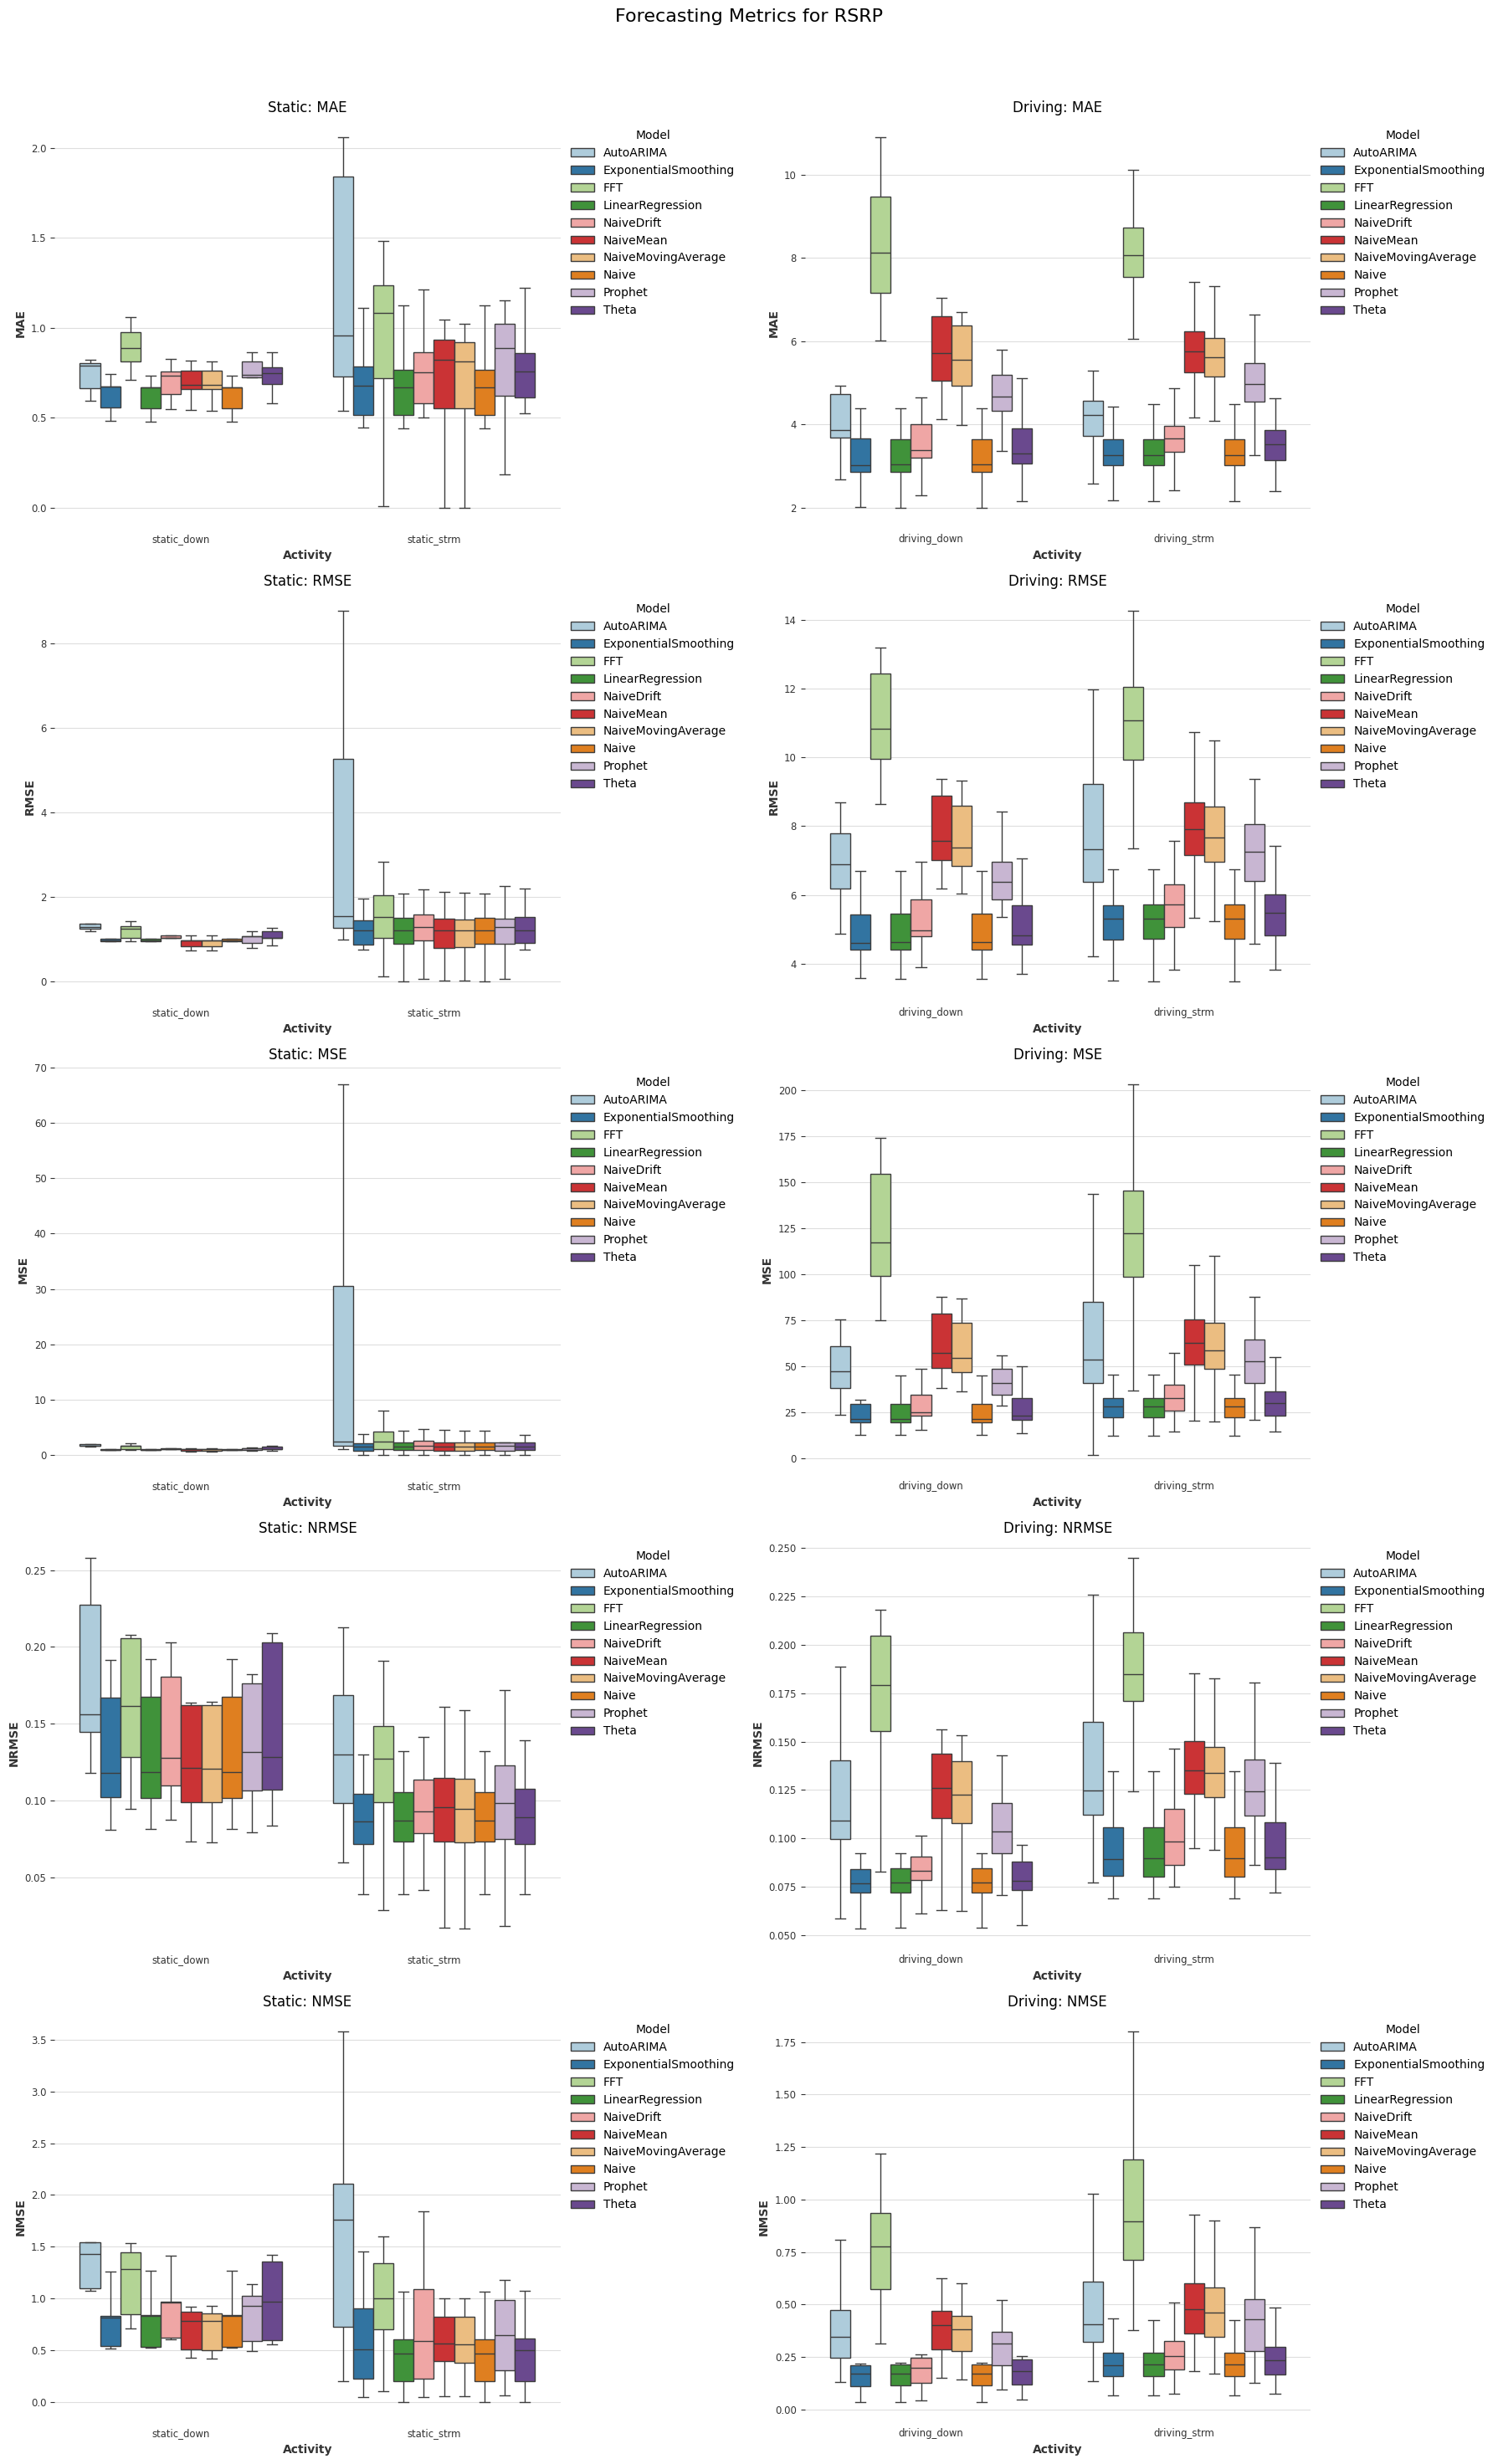

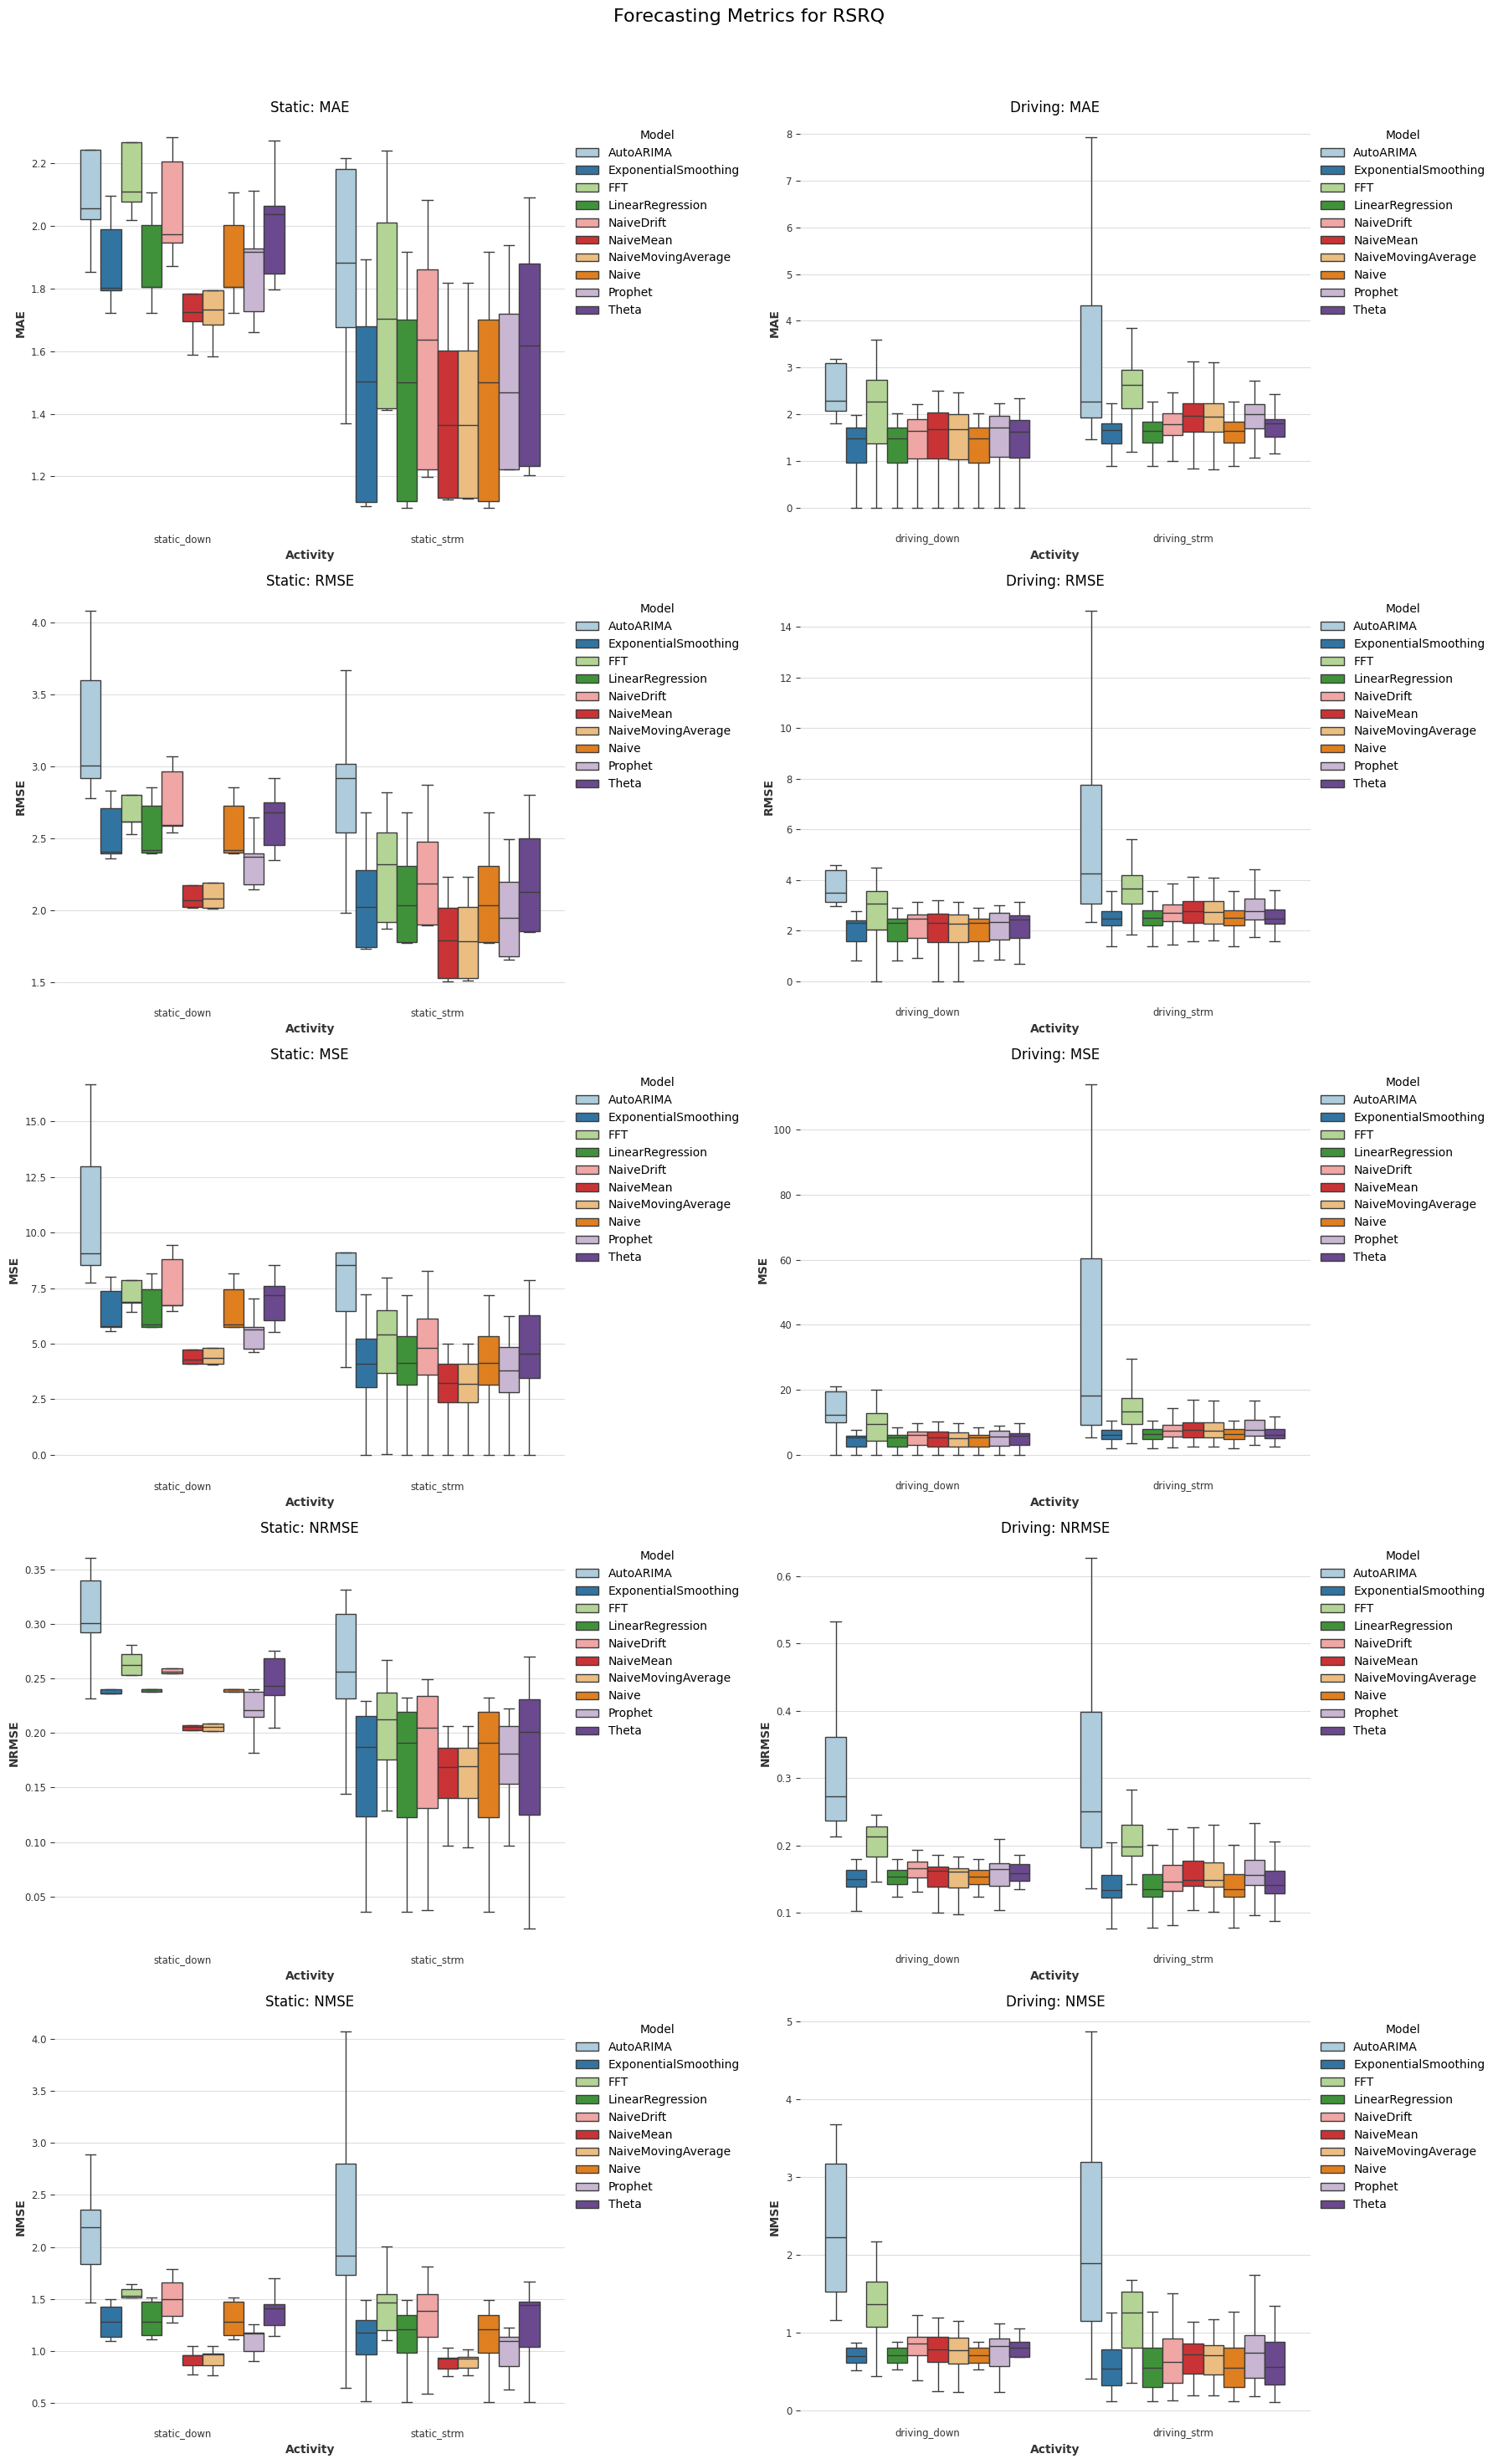

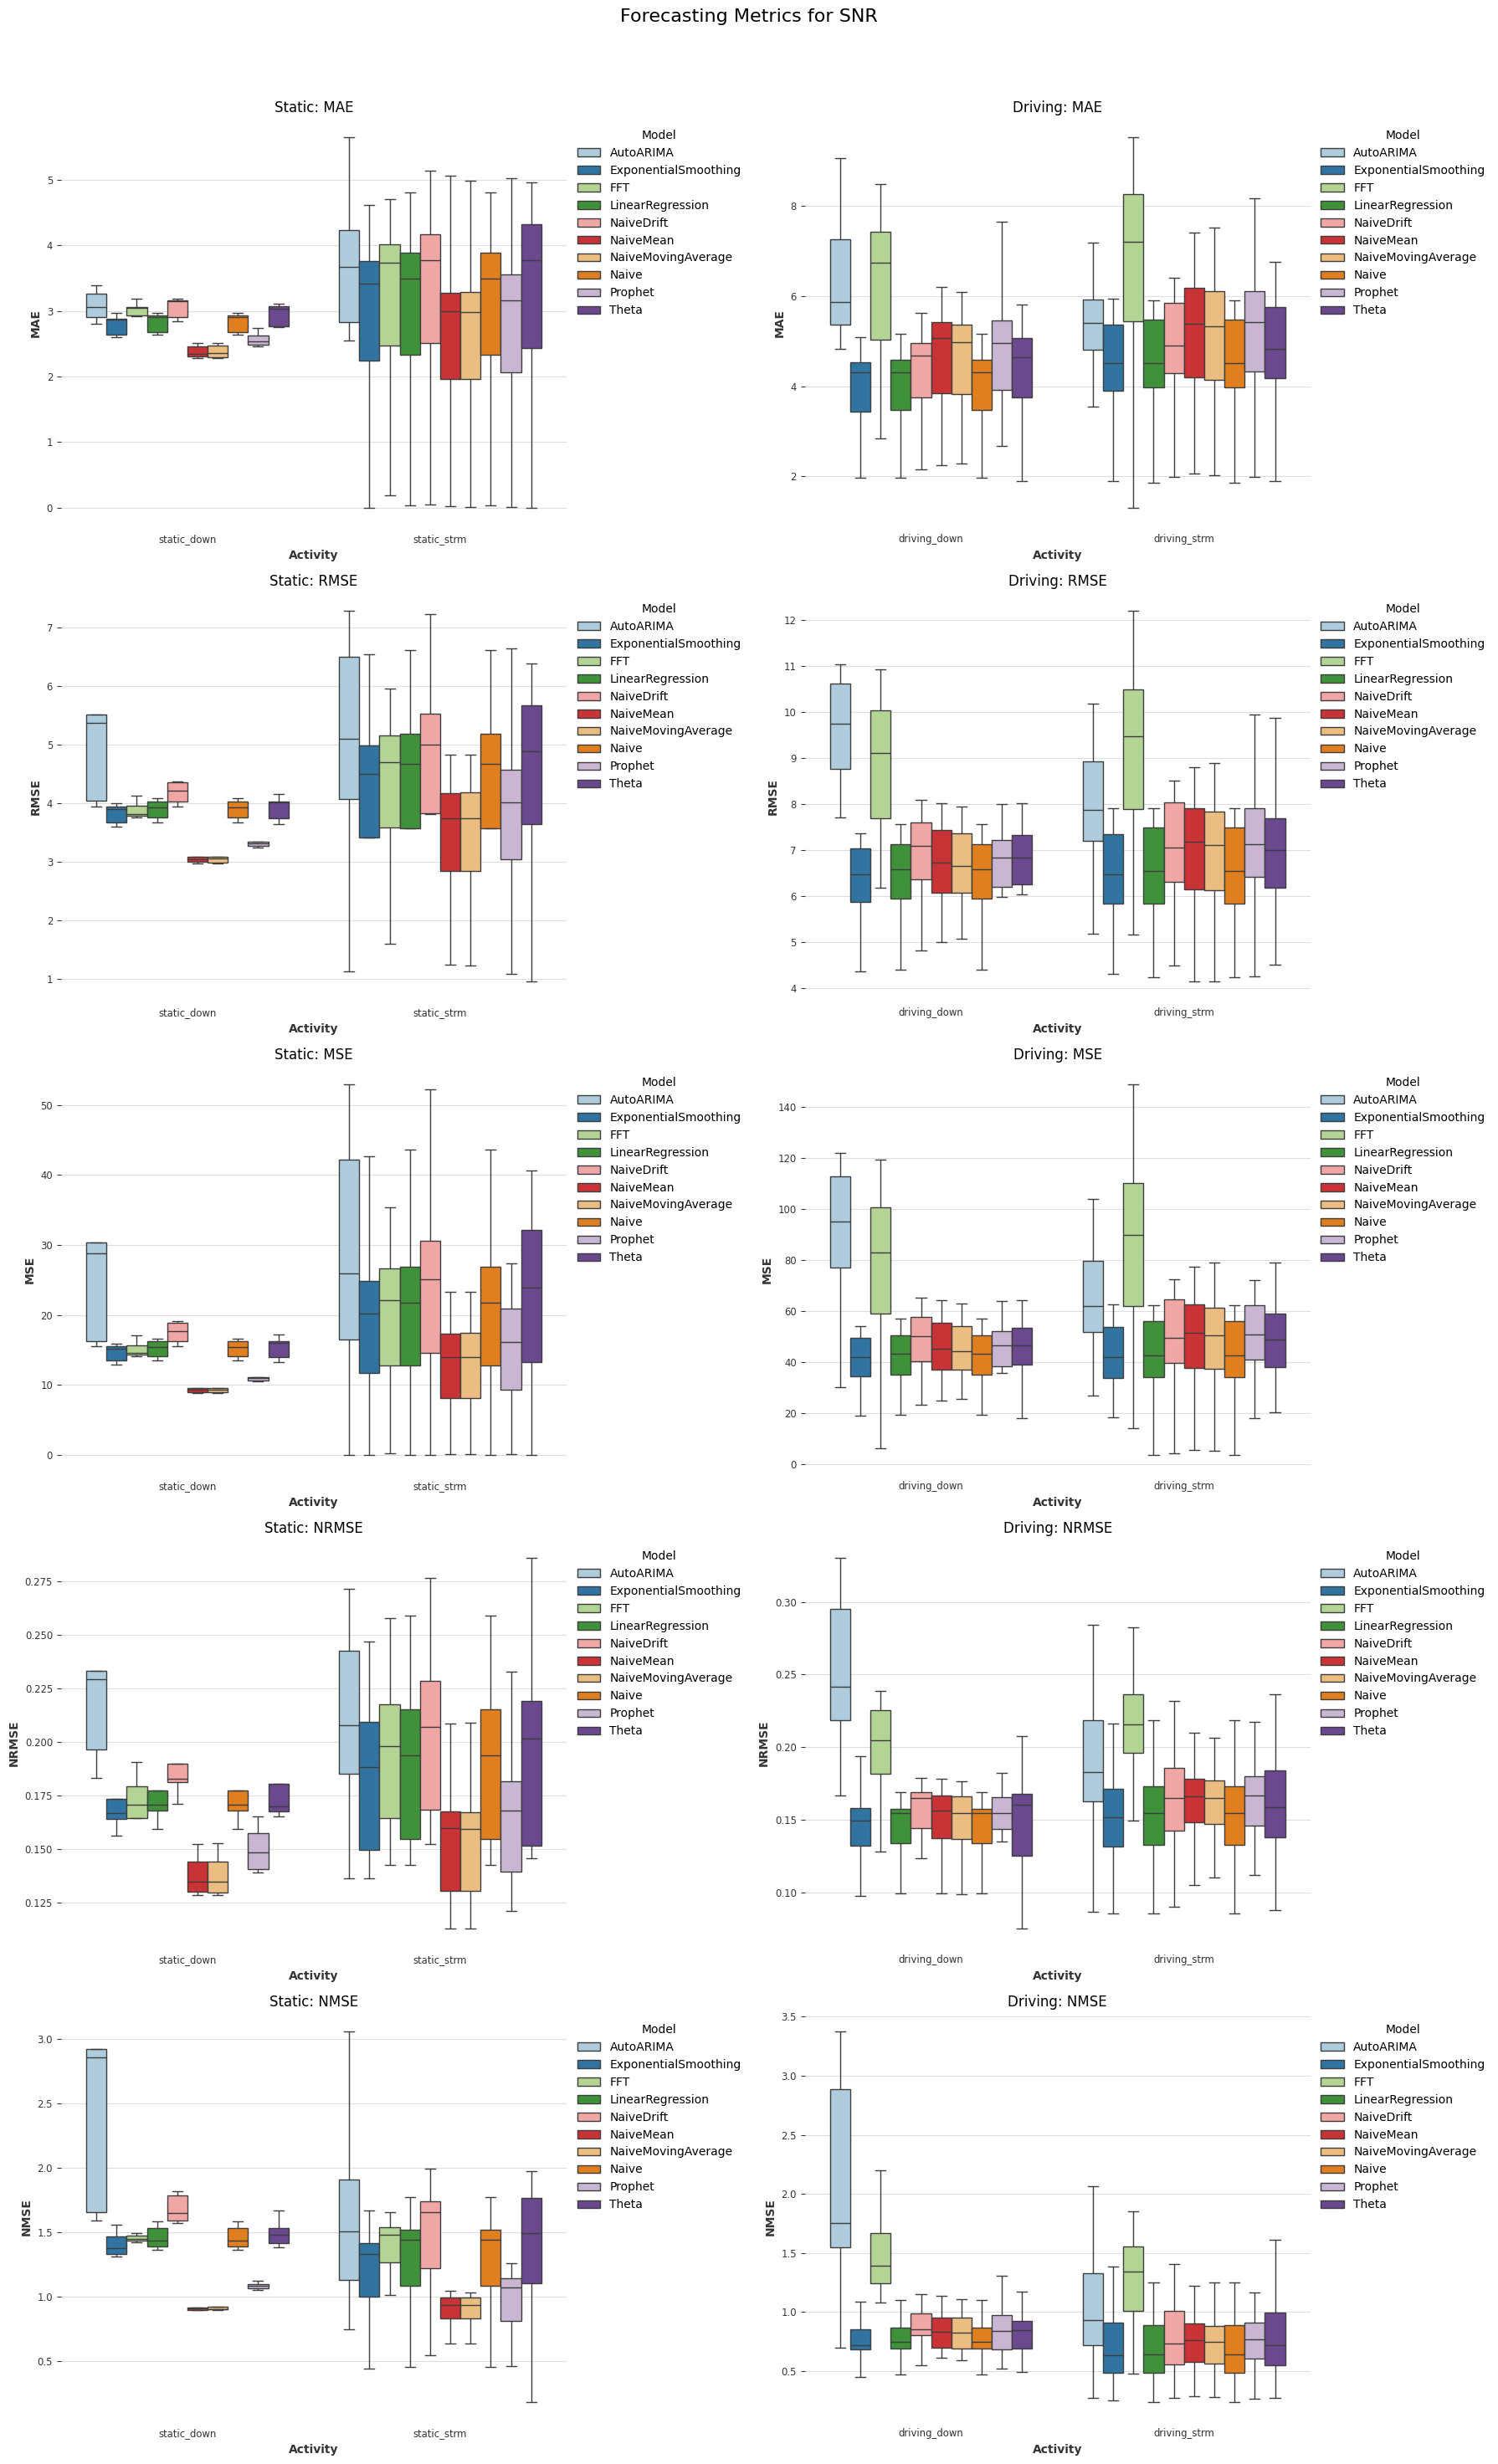

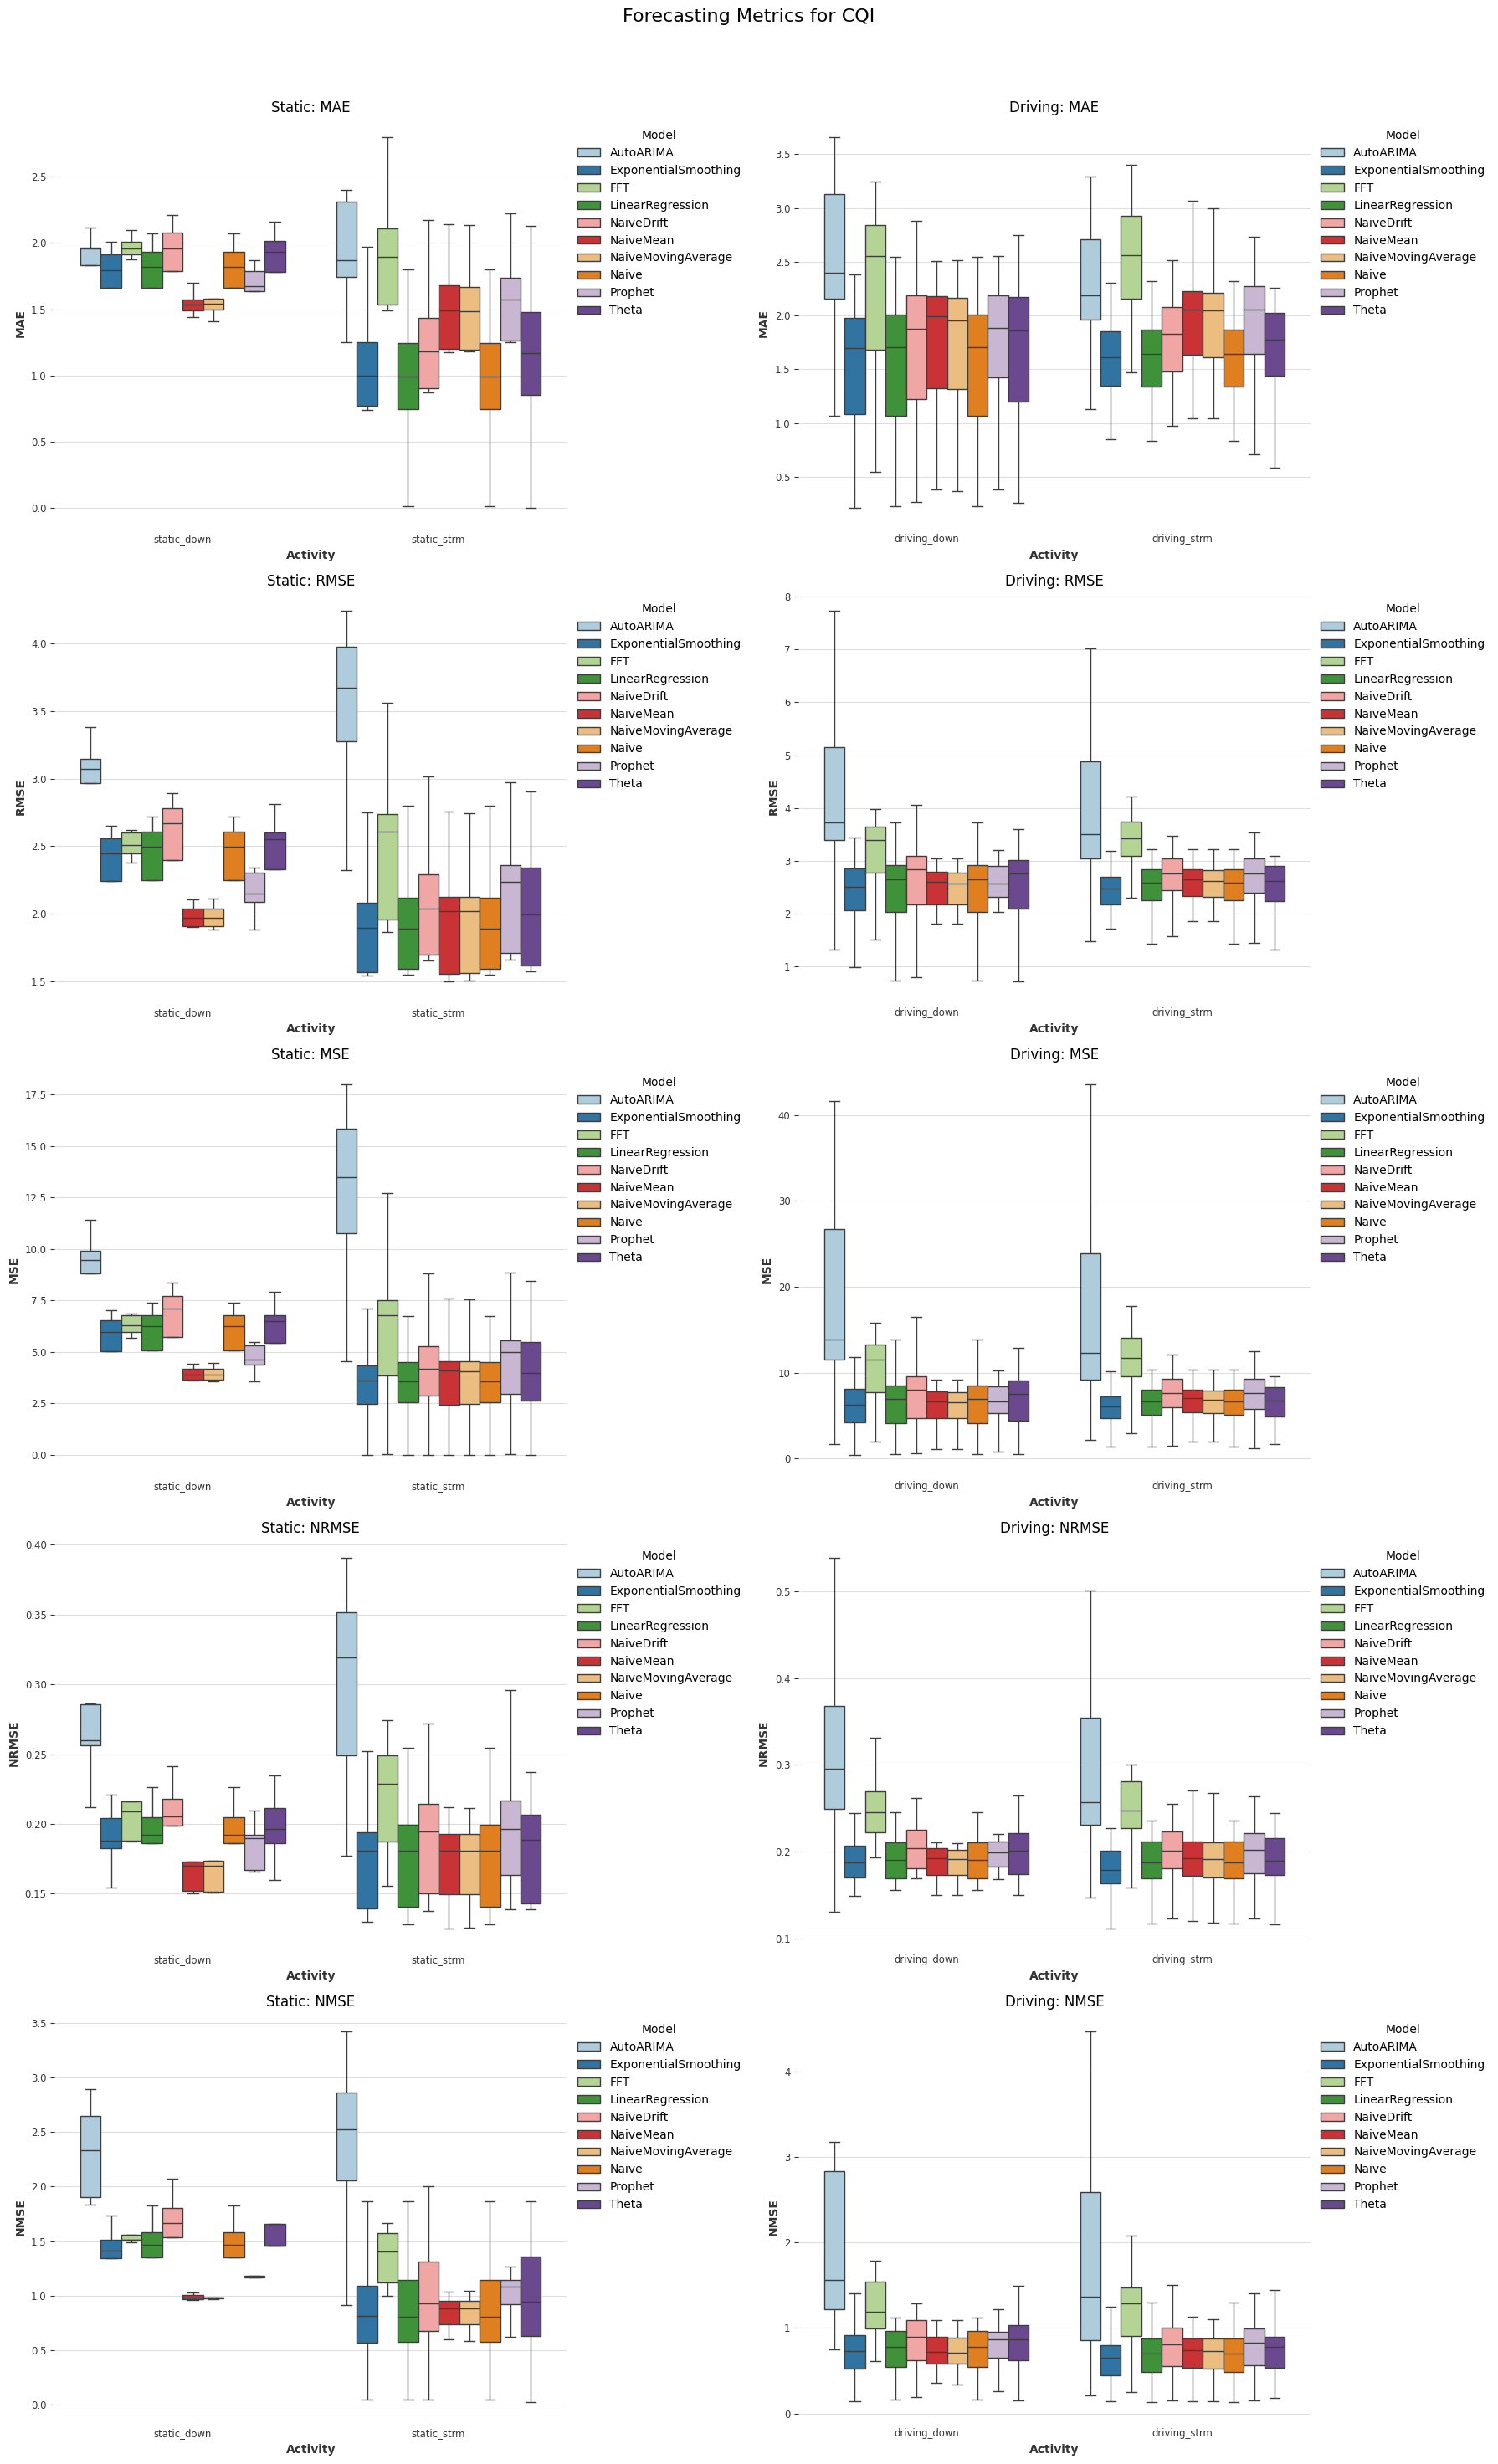

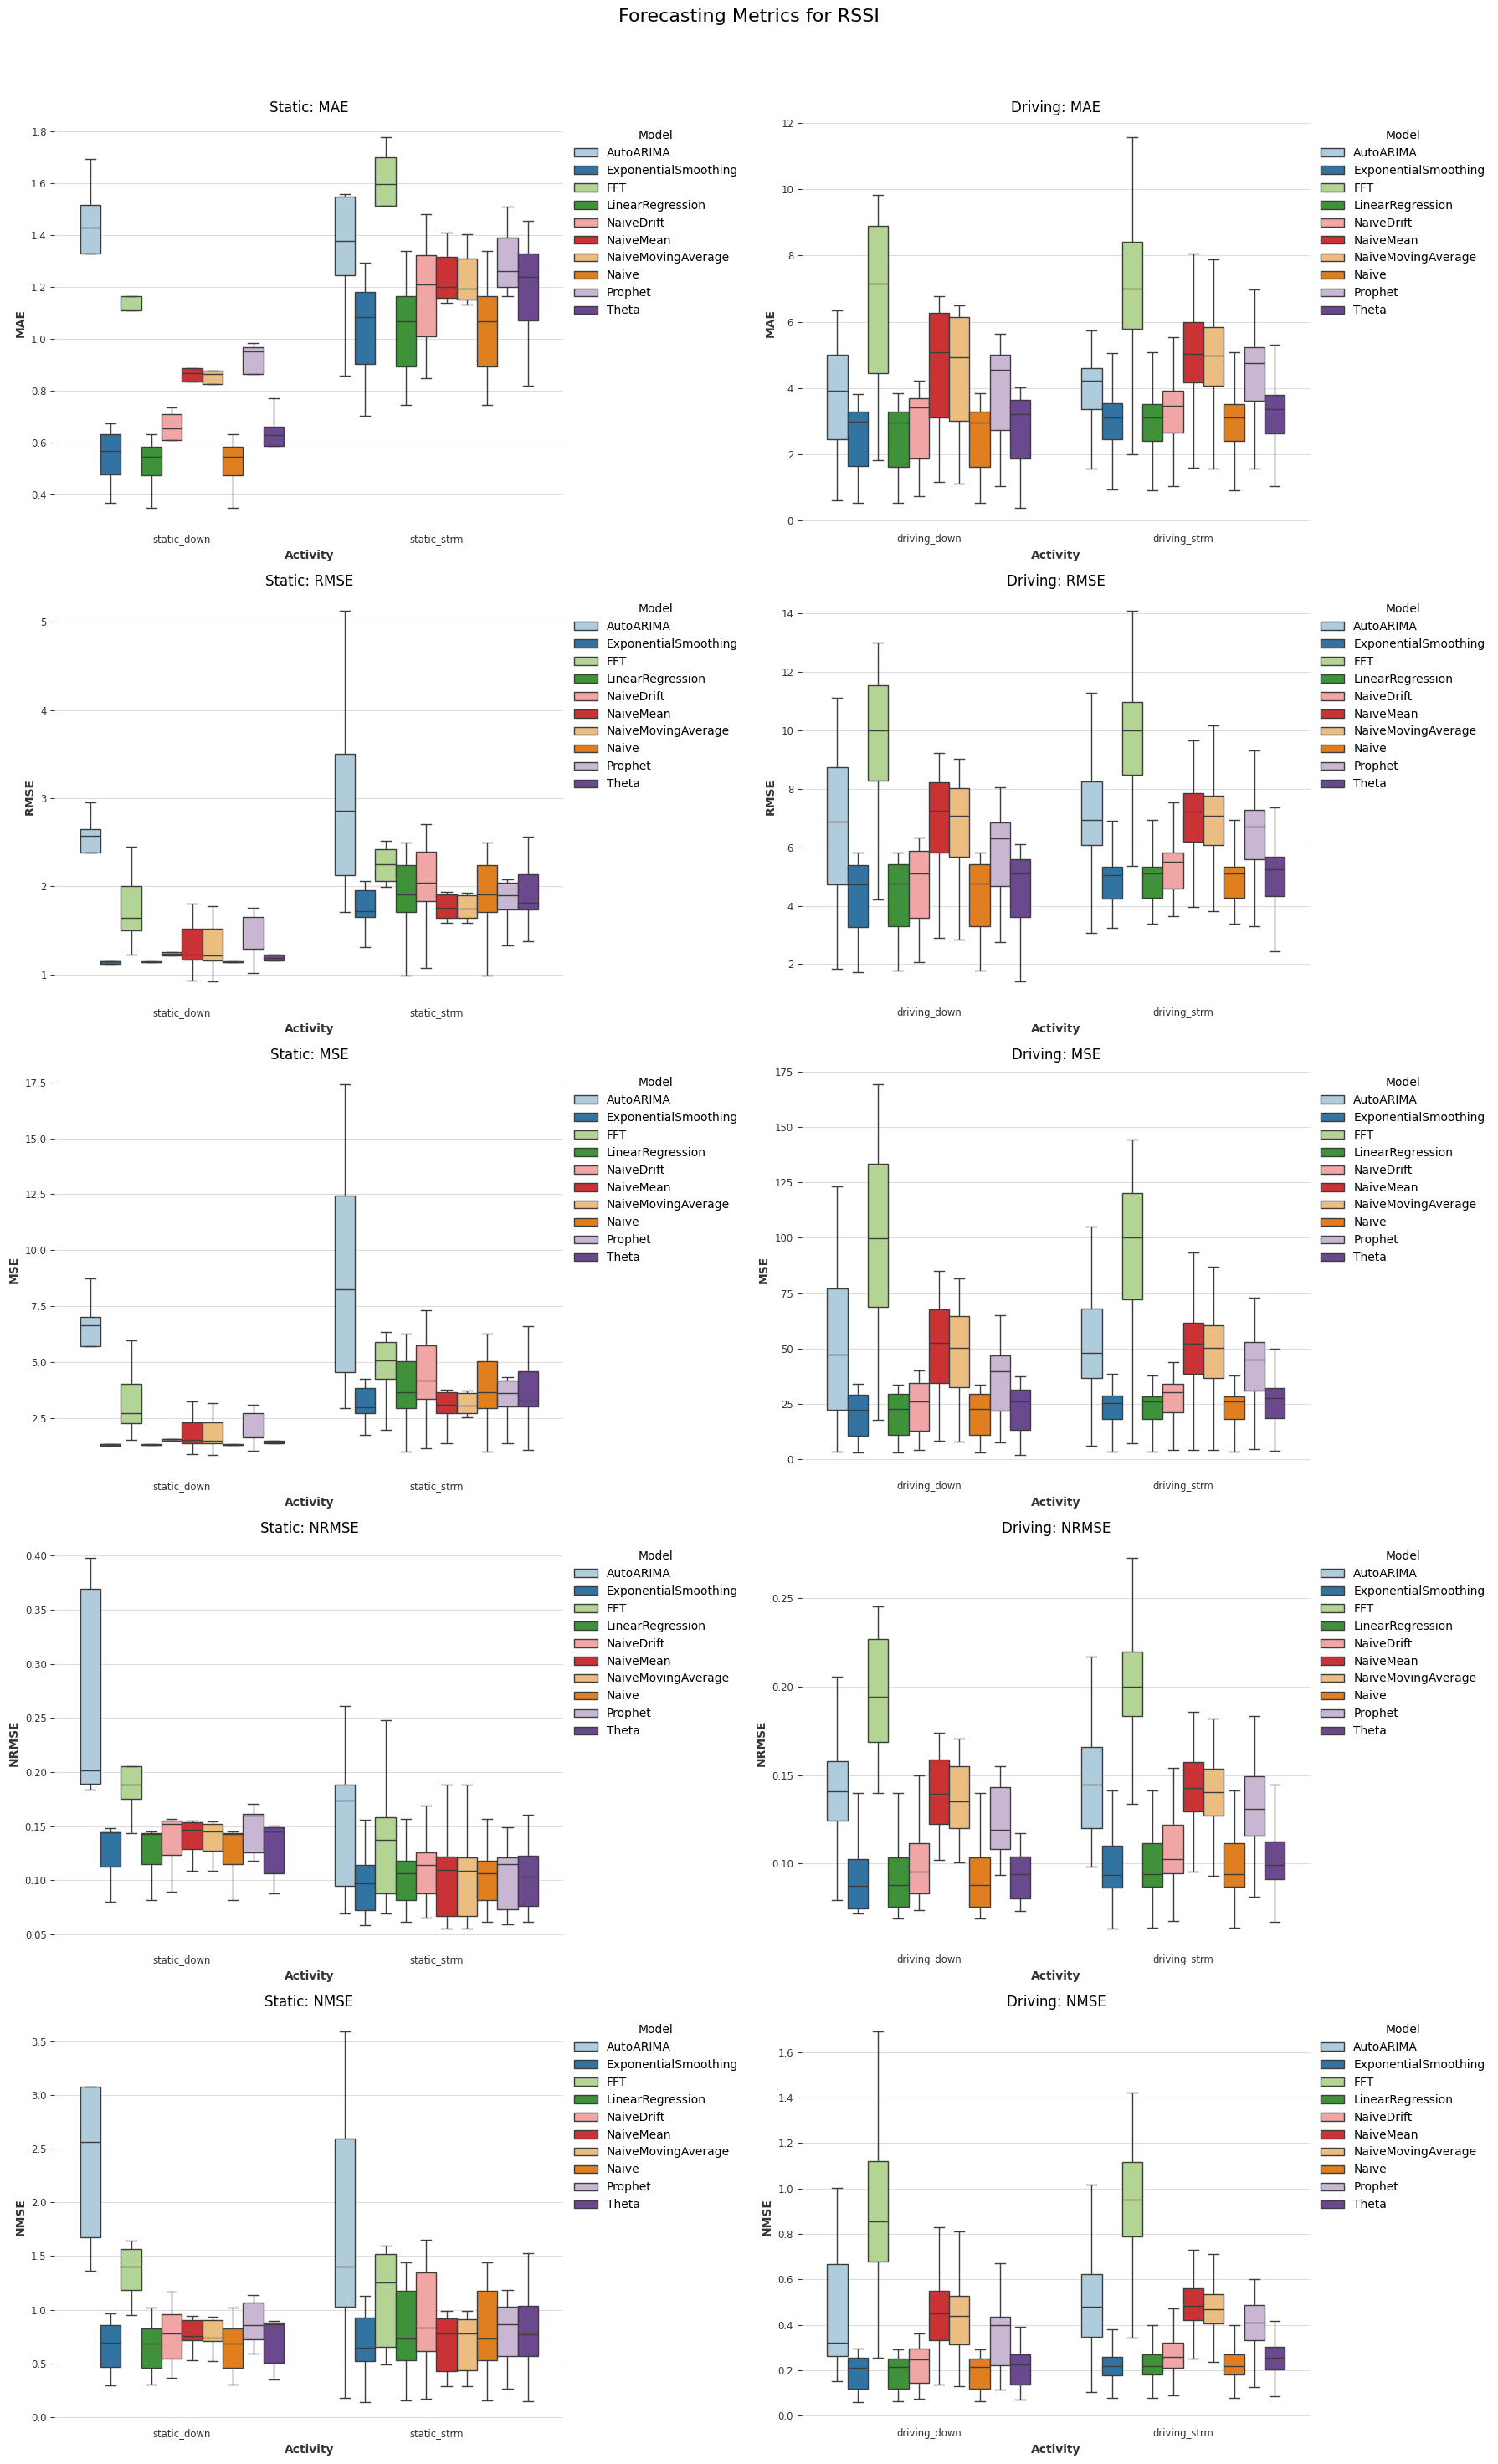

In [15]:
plot_boxplots_for_metrics_by_target(df_metrics, show_outliers=False)

# Lendo os resultados das métricas geradas por um modelo

In [16]:
def query_lowest_metric(df, metric):
    """
    Realiza uma query no DataFrame que retorna as linhas com o menor valor da métrica especificada para cada combinação de Model, target e Activity.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo as colunas 'Model', 'target', 'Activity' e as métricas.
    metric (str): Nome da métrica a ser avaliada ('MAE', 'RMSE' ou 'MSE').

    Retorna:
    pd.DataFrame: DataFrame contendo as linhas com o menor valor da métrica para cada grupo de Model, target e Activity.
    """

    # Verificar se a métrica especificada é válida
    if metric not in ["MAE", "RMSE", "MSE"]:
        raise ValueError(
            f"Métrica '{metric}' não é válida. Escolha entre 'MAE', 'RMSE' ou 'MSE'."
        )

    # Verificar se as colunas necessárias estão presentes no DataFrame
    required_columns = ["Model", "target", "Activity", metric]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Coluna {col} está ausente no DataFrame")

    # Obter os índices das linhas com o menor valor da métrica para cada combinação de Model, target e Activity
    idx = df.groupby(["Model", "target", "Activity"])[metric].idxmin()

    # Retornar as linhas correspondentes ao menor valor da métrica
    result = df.loc[idx]

    return result

In [17]:
lowest_mae = query_lowest_metric(df_metrics, "MAE")
lowest_rmse = query_lowest_metric(df_metrics, "RMSE")
lowest_mse = query_lowest_metric(df_metrics, "MSE")

In [18]:
lowest_mae

Time_Index      Model  \
65    [2020-02-14T12:59:07.000000000, 2020-02-14T12:...  AutoARIMA   
270   [2019-12-02T09:40:25.000000000, 2019-12-02T09:...  AutoARIMA   
315   [2019-12-16T13:40:54.000000000, 2019-12-16T13:...  AutoARIMA   
366   [2019-11-28T09:22:35.000000000, 2019-11-28T09:...  AutoARIMA   
37    [2020-02-13T13:04:14.000000000, 2020-02-13T13:...  AutoARIMA   
...                                                 ...        ...   
4112  [2019-12-23T10:31:25.000000000, 2019-12-23T10:...      Theta   
3785  [2020-02-27T17:31:05.000000000, 2020-02-27T17:...      Theta   
3980  [2019-12-02T09:40:25.000000000, 2019-12-02T09:...      Theta   
4020  [2020-01-16T10:44:24.000000000, 2020-01-16T10:...      Theta   
4045  [2020-01-06T09:56:24.000000000, 2020-01-06T09:...      Theta   

                                                Actuals  \
65    [14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 14.0, 14....   
270   [8.0, 8.0, 8.0, 8.0, 8.0, 13.999999999999998, ...   
315   [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   
366   [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   
37    [-99.0, -93.0, -93.0, -92.0, -92.0, -92.0, -90...   
...                                                 ...   
4112  [-85.0, -85.0, -85.5, -85.99999999999999, -86....   
3785  [-2.0, -2.0, 0.0, 0.0, -1.0, -1.0, -1.0, 1.0, ...   
3980  [7.0, 7.0, 10.0, 10.0, 9.0, 9.0, 5.0, 5.0, 5.0...   
4020  [-0.9999999999999993, -0.9999999999999993, -0....   
4045  [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....   

                                                  Preds  ElapsedTime target  \
65    [14.075388311546599, 13.661517967601764, 13.66...    20.652354    CQI   
270   [6.347234695332148, 3.717407522453008, 1.04052...    16.630062    CQI   
315   [11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11....   132.629273    CQI   
366   [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...   238.378127    CQI   
37    [-99.41720703139154, -99.52900129075675, -99.5...   176.826534   RSRP   
...                                                 ...          ...    ...   
4112  [-85.3750292370542, -85.3750292370542, -85.375...     8.600890   RSSI   
3785  [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....     0.771755    SNR   
3980  [7.500000007450581, 7.500000007450581, 7.50000...     0.932346    SNR   
4020  [0.5319570296101408, 0.7834068409076166, -2.07...     5.285993    SNR   
4045  [-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....     3.300214    SNR   

          Activity       MAE      RMSE        MSE     NRMSE      NMSE  
65    driving_down  1.068171  1.309548   1.714916  0.130955  0.747538  
270   driving_strm  0.581342  2.510187   6.301040  0.209182  1.266539  
315    static_down  1.539037  2.577102   6.641456  0.286345  1.832134  
366    static_strm  1.253523  2.323637   5.399290  0.211240  0.966396  
37    driving_down  2.673824  7.702151  59.323137  0.122256  0.347149  
...            ...       ...       ...        ...       ...       ...  
4112   static_strm  0.559861  1.033788   1.068719  0.103379  0.256333  
3785  driving_down  0.371456  1.205527   1.453296  0.075345  0.716014  
3980  driving_strm  0.541031  2.025322   4.101929  0.088057  0.272826  
4020   static_down  2.757058  3.638770  13.240645  0.165399  1.384144  
4045   static_strm  0.000000  0.000000   0.000000       NaN       NaN  

[200 rows x 12 columns]

## Um gráfico de comparação entre o resultado actual vs forescat em uma das sliding windows

In [19]:
def plot_actual_vs_preds(
    result_df: pd.DataFrame, model: str, target: str, activity: str
) -> None:
    """
    Plota as séries temporais reais versus as predições para uma combinação específica de Model, target e Activity.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals", "Preds", "Model", "target", "Activity".
        model (str): O modelo a ser filtrado.
        target (str): O alvo a ser filtrado.
        activity (str): A atividade a ser filtrada.
    """
    # Filtra o DataFrame com base nos parâmetros fornecidos
    filtered_df = result_df[
        (result_df["Model"] == model)
        & (result_df["target"] == target)
        & (result_df["Activity"] == activity)
    ]
    print(filtered_df[["MAE", "RMSE", "MSE"]])

    # Verifica se a filtragem resultou em algum dado
    if filtered_df.empty:
        raise ValueError("Nenhum dado encontrado para os parâmetros fornecidos.")

    # Obtém os dados da primeira linha do DataFrame filtrado
    time_index = pd.DatetimeIndex(filtered_df["Time_Index"].iloc[0])
    actuals = filtered_df["Actuals"].iloc[0]
    preds = filtered_df["Preds"].iloc[0]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(
        label="Predições", color="red", linestyle="--"
    )  # Linha tracejada para predições

    # Adiciona título, legendas e labels
    plt.title(
        f"Comparação entre Reais e Predições - Model: {model}, Target: {target}, Activity: {activity}"
    )
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

          MAE      RMSE       MSE
317  0.594476  1.182585  1.398508


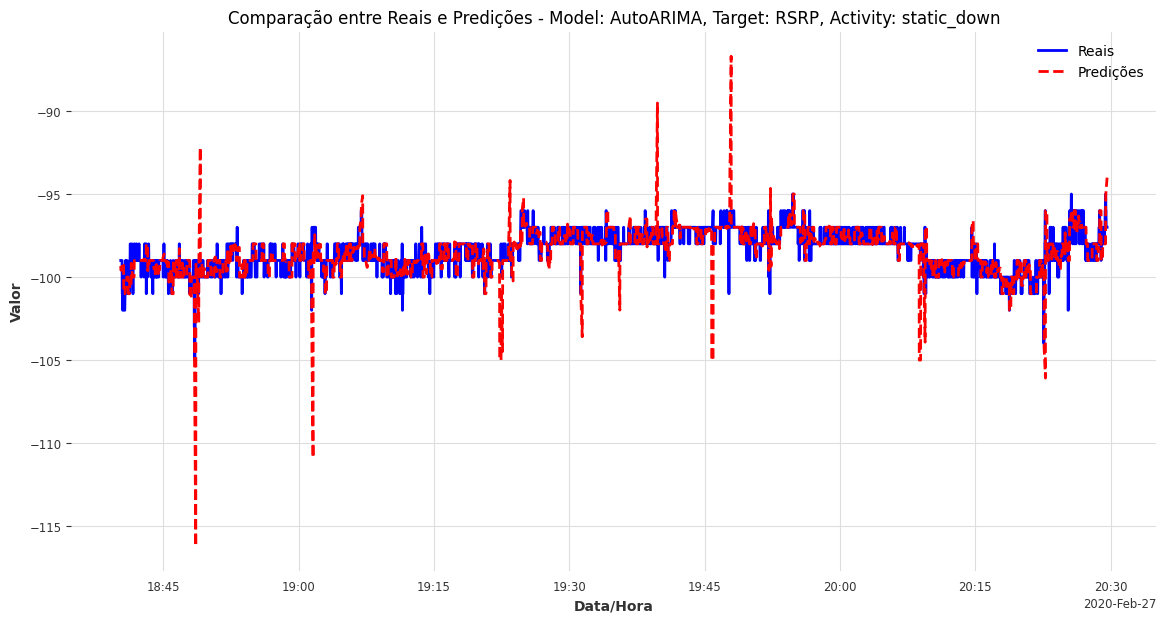

          MAE      RMSE       MSE
726  0.484425  0.809022  0.654517


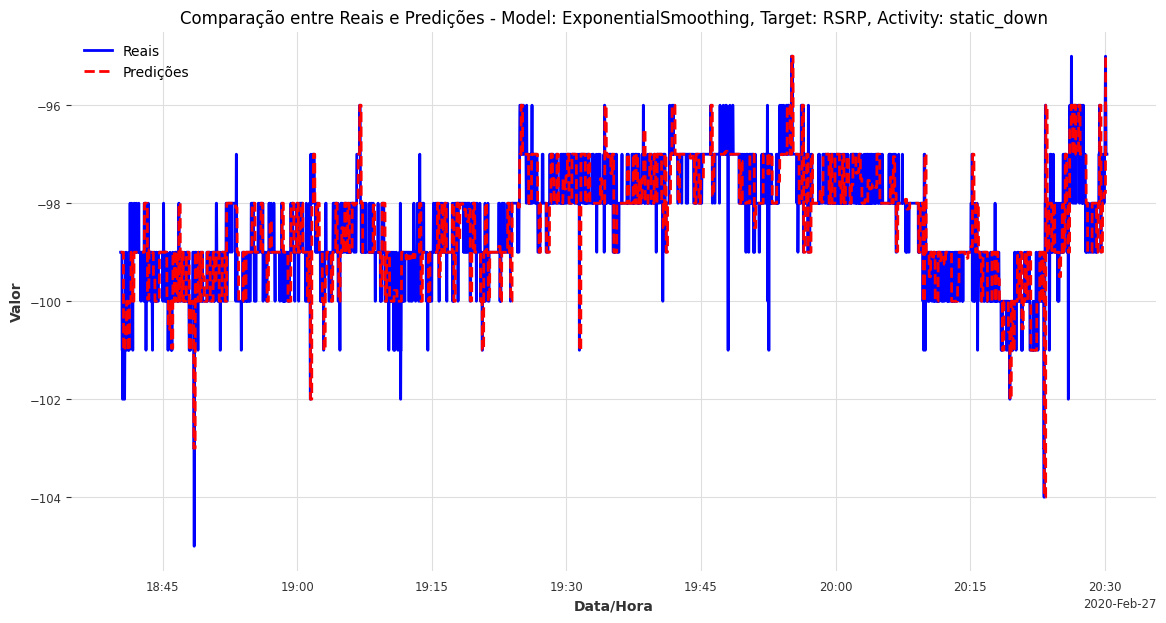

           MAE      RMSE       MSE
1141  0.708379  0.948465  0.899586


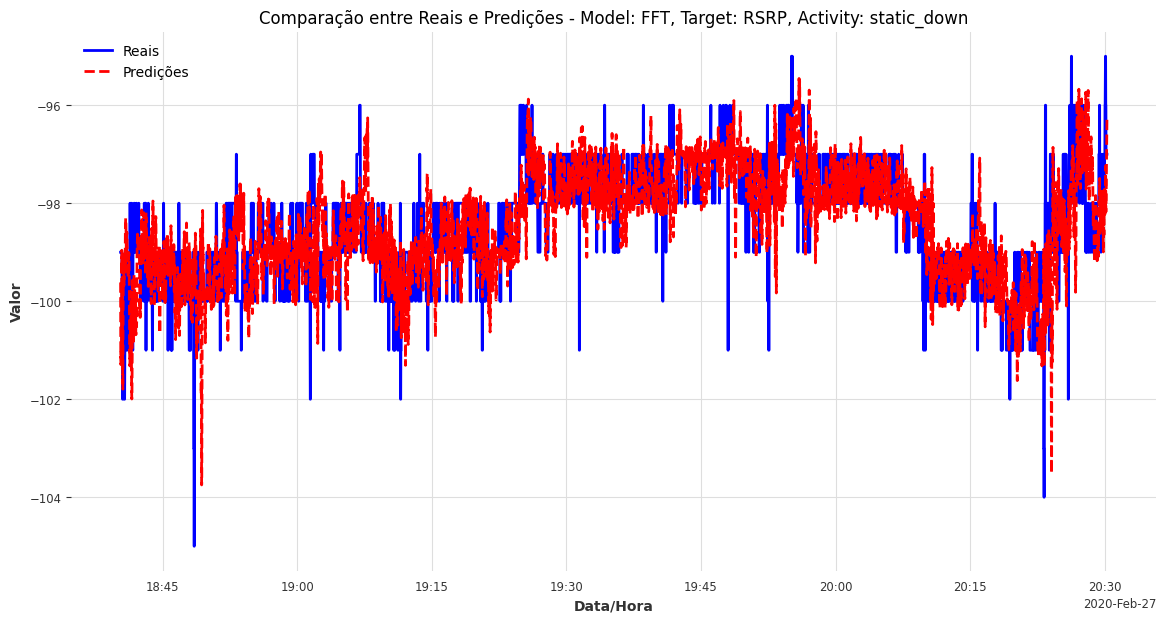

           MAE      RMSE      MSE
1553  0.480303  0.813517  0.66181


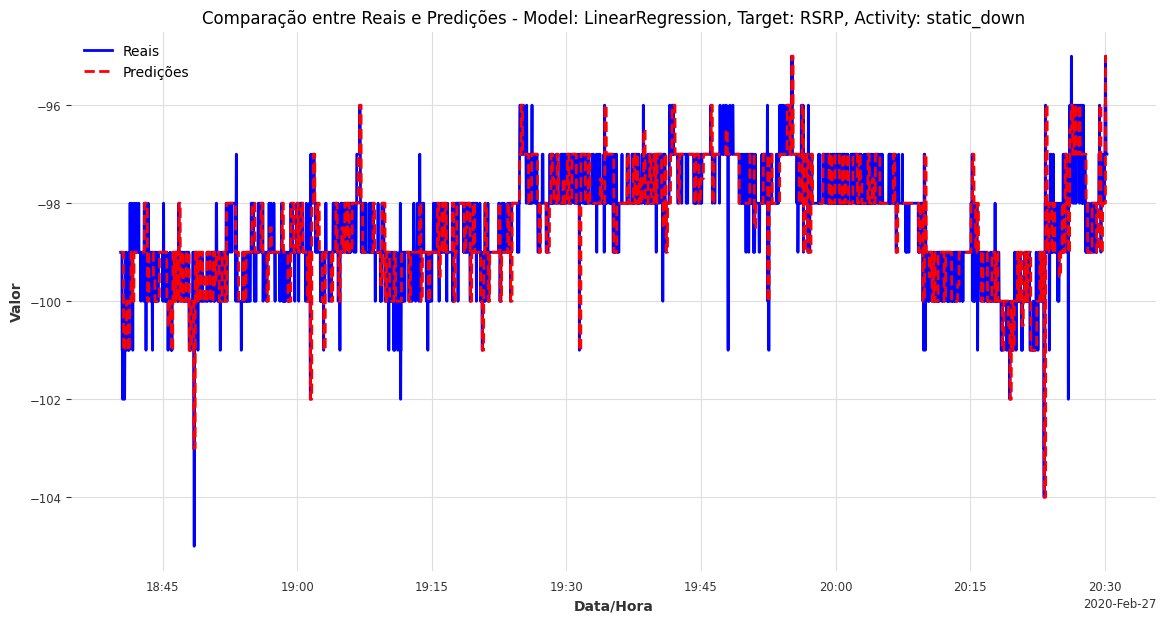

           MAE      RMSE      MSE
3207  0.480303  0.813517  0.66181


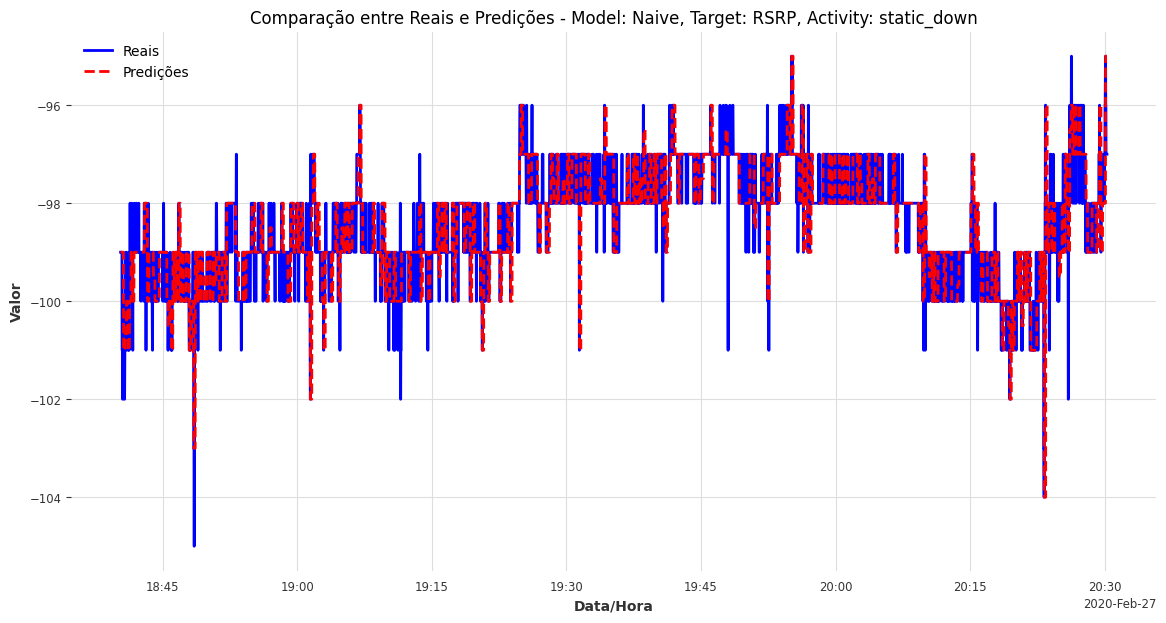

          MAE      RMSE       MSE
1962  0.54762  0.877425  0.769875


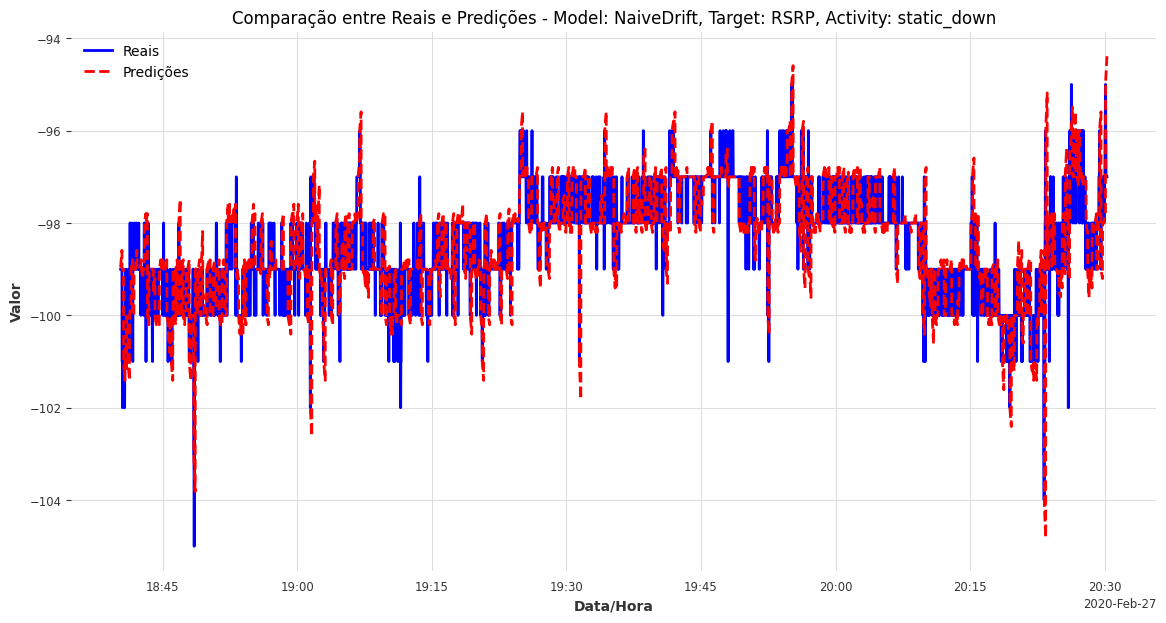

           MAE      RMSE       MSE
2377  0.543507  0.733154  0.537515


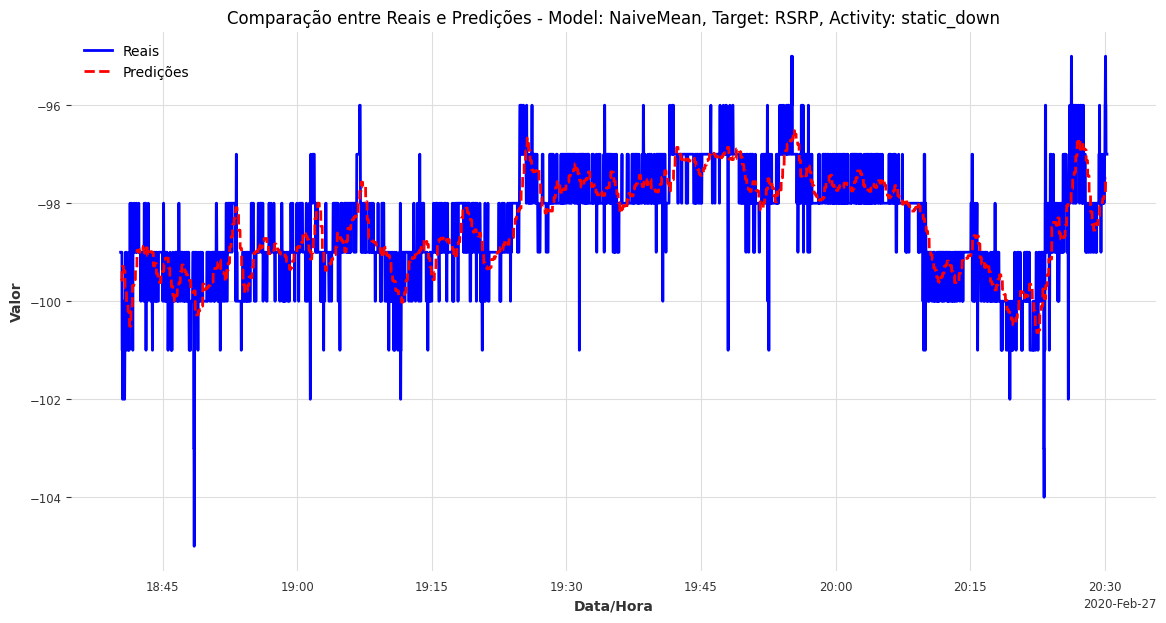

           MAE      RMSE       MSE
2792  0.539609  0.730292  0.533327


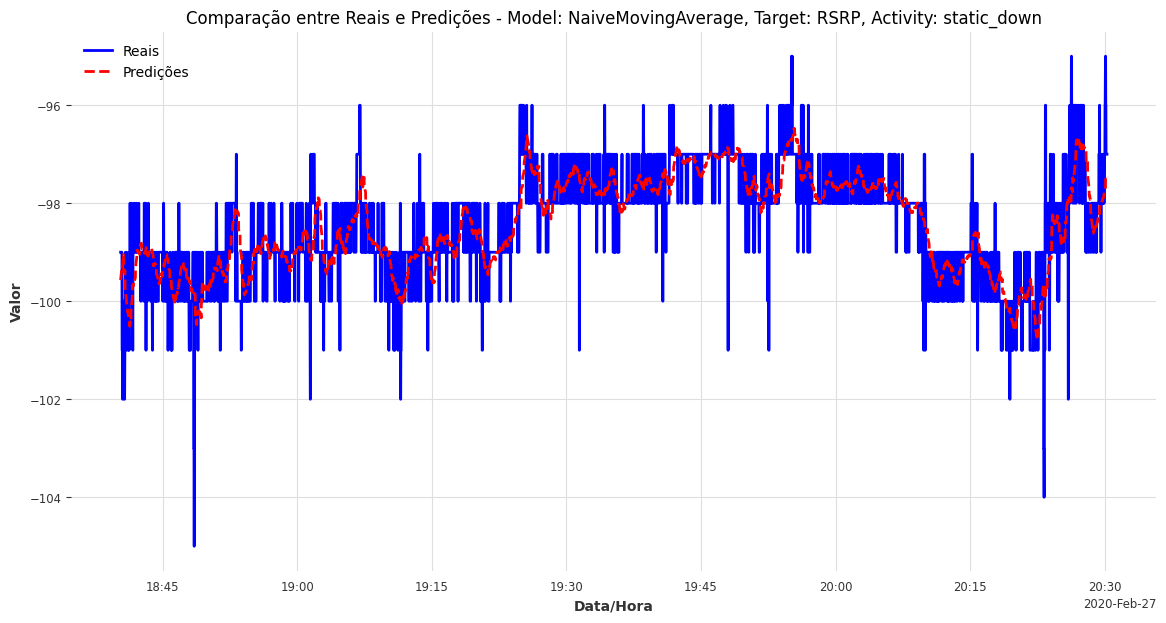

           MAE      RMSE       MSE
3619  0.570166  0.791823  0.626983


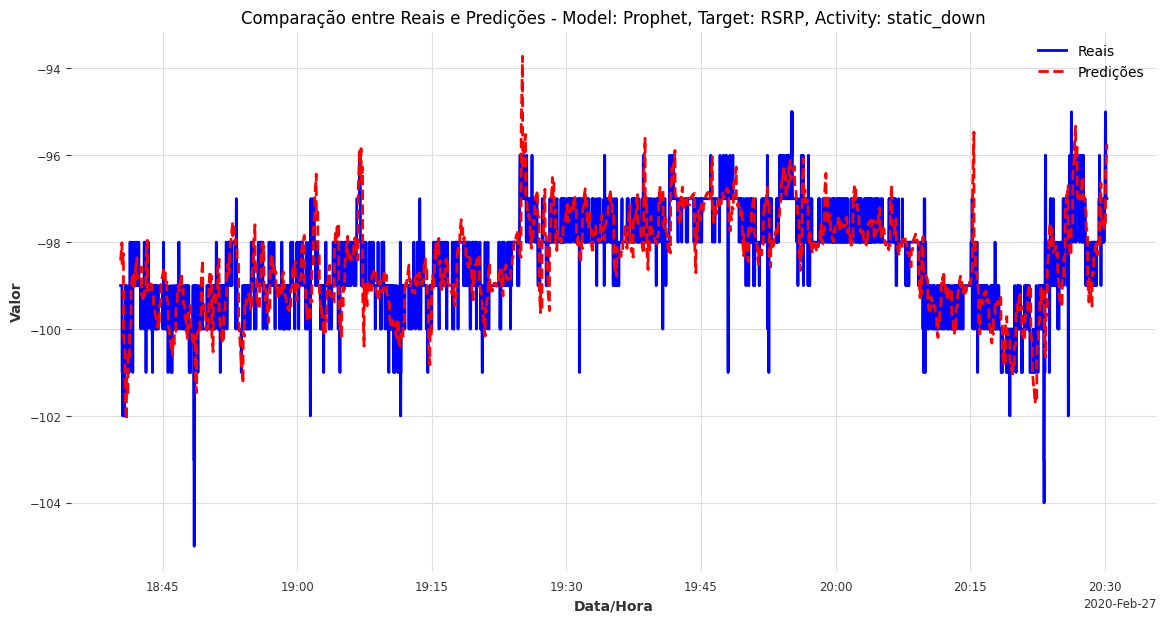

           MAE      RMSE       MSE
4028  0.578923  0.837179  0.700869


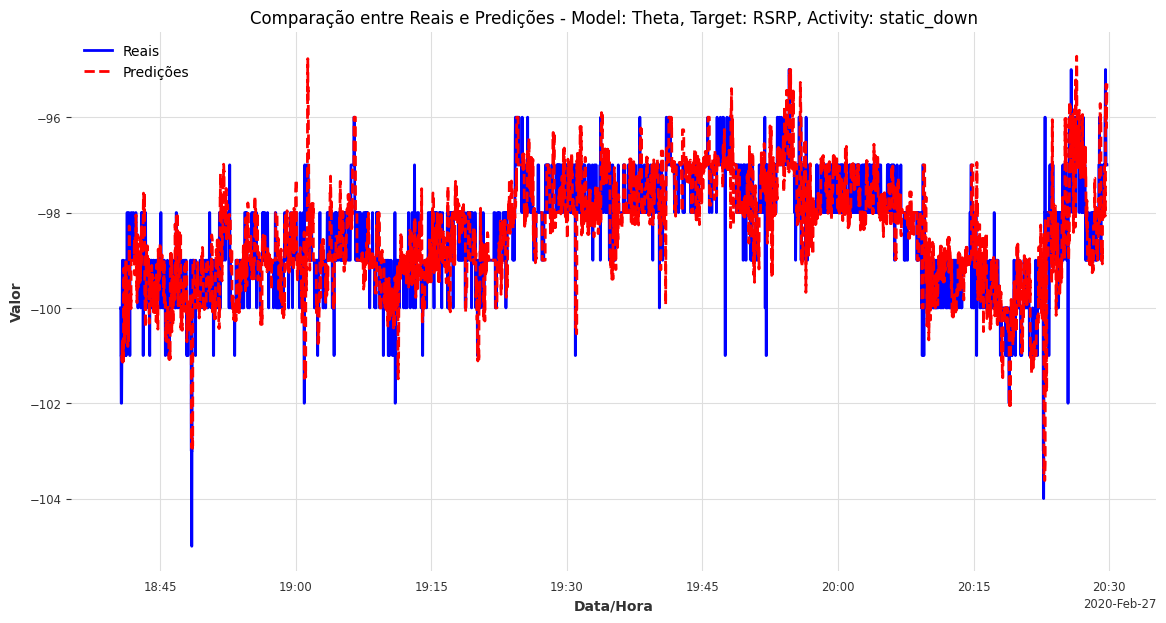

In [20]:
# Exemplo de uso
for model in lowest_mae["Model"].unique():
    plot_actual_vs_preds(
        lowest_rmse, model=model, target="RSRP", activity="static_down"
    )